In [1160]:
import numpy as np
import pandas as pd
import math

import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [1161]:
pd.set_option("display.max_columns", None)
plt.style.use('seaborn-v0_8')
plt.rcParams["font.weight"] = "bold"
plt.rcParams["axes.labelweight"] = "bold"
plt.rcParams["axes.titlesize"] = 25
plt.rcParams["axes.titleweight"] = 'bold'
plt.rcParams['xtick.labelsize']=15
plt.rcParams['ytick.labelsize']=15
plt.rcParams["axes.labelsize"] = 20
plt.rcParams["legend.fontsize"] = 15
plt.rcParams["legend.title_fontsize"] = 15

In [1162]:
data_path = r"D:\RideWise-Predicting-Bike-sharing-Demand\Data\day.csv"

In [1163]:
df = pd.read_csv(r"D:\RideWise-Predicting-Bike-sharing-Demand\Data\day.csv", encoding= 'unicode_escape')


## DATA INSPECTION

In [1164]:
print(f' The shape of dataset is {(df.shape)} \n Total Rows are : {(df.shape)[0]}\n Total Columns are : {(df.shape)[1]}')

 The shape of dataset is (731, 16) 
 Total Rows are : 731
 Total Columns are : 16


In [1165]:
# Check 1st Five rows
df.head()

instant      dteday  season  yr  mnth  holiday  weekday  workingday  \
0        1  2011-01-01       1   0     1        0        6           0   
1        2  2011-01-02       1   0     1        0        0           0   
2        3  2011-01-03       1   0     1        0        1           1   
3        4  2011-01-04       1   0     1        0        2           1   
4        5  2011-01-05       1   0     1        0        3           1   

   weathersit      temp     atemp       hum  windspeed  casual  registered  \
0           2  0.344167  0.363625  0.805833   0.160446     331         654   
1           2  0.363478  0.353739  0.696087   0.248539     131         670   
2           1  0.196364  0.189405  0.437273   0.248309     120        1229   
3           1  0.200000  0.212122  0.590435   0.160296     108        1454   
4           1  0.226957  0.229270  0.436957   0.186900      82        1518   

    cnt  
0   985  
1   801  
2  1349  
3  1562  
4  1600

In [1166]:
# Check last 5 rows
df.tail()

instant      dteday  season  yr  mnth  holiday  weekday  workingday  \
726      727  2012-12-27       1   1    12        0        4           1   
727      728  2012-12-28       1   1    12        0        5           1   
728      729  2012-12-29       1   1    12        0        6           0   
729      730  2012-12-30       1   1    12        0        0           0   
730      731  2012-12-31       1   1    12        0        1           1   

     weathersit      temp     atemp       hum  windspeed  casual  registered  \
726           2  0.254167  0.226642  0.652917   0.350133     247        1867   
727           2  0.253333  0.255046  0.590000   0.155471     644        2451   
728           2  0.253333  0.242400  0.752917   0.124383     159        1182   
729           1  0.255833  0.231700  0.483333   0.350754     364        1432   
730           2  0.215833  0.223487  0.577500   0.154846     439        2290   

      cnt  
726  2114  
727  3095  
728  1341  
729  1796  
730  2729

In [1167]:
# Check the info of dataset to know the data types of columns or variable
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB


In [1168]:
df.isnull().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

In [1169]:
df.describe(include = 'all')

instant      dteday      season          yr        mnth  \
count   731.000000         731  731.000000  731.000000  731.000000   
unique         NaN         731         NaN         NaN         NaN   
top            NaN  2011-01-01         NaN         NaN         NaN   
freq           NaN           1         NaN         NaN         NaN   
mean    366.000000         NaN    2.496580    0.500684    6.519836   
std     211.165812         NaN    1.110807    0.500342    3.451913   
min       1.000000         NaN    1.000000    0.000000    1.000000   
25%     183.500000         NaN    2.000000    0.000000    4.000000   
50%     366.000000         NaN    3.000000    1.000000    7.000000   
75%     548.500000         NaN    3.000000    1.000000   10.000000   
max     731.000000         NaN    4.000000    1.000000   12.000000   

           holiday     weekday  workingday  weathersit        temp  \
count   731.000000  731.000000  731.000000  731.000000  731.000000   
unique         NaN         NaN         NaN         NaN         NaN   
top            NaN         NaN         NaN         NaN         NaN   
freq           NaN         NaN         NaN         NaN         NaN   
mean      0.028728    2.997264    0.683995    1.395349    0.495385   
std       0.167155    2.004787    0.465233    0.544894    0.183051   
min       0.000000    0.000000    0.000000    1.000000    0.059130   
25%       0.000000    1.000000    0.000000    1.000000    0.337083   
50%       0.000000    3.000000    1.000000    1.000000    0.498333   
75%       0.000000    5.000000    1.000000    2.000000    0.655417   
max       1.000000    6.000000    1.000000    3.000000    0.861667   

             atemp         hum   windspeed       casual   registered  \
count   731.000000  731.000000  731.000000   731.000000   731.000000   
unique         NaN         NaN         NaN          NaN          NaN   
top            NaN         NaN         NaN          NaN          NaN   
freq           NaN         NaN         NaN          NaN          NaN   
mean      0.474354    0.627894    0.190486   848.176471  3656.172367   
std       0.162961    0.142429    0.077498   686.622488  1560.256377   
min       0.079070    0.000000    0.022392     2.000000    20.000000   
25%       0.337842    0.520000    0.134950   315.500000  2497.000000   
50%       0.486733    0.626667    0.180975   713.000000  3662.000000   
75%       0.608602    0.730209    0.233214  1096.000000  4776.500000   
max       0.840896    0.972500    0.507463  3410.000000  6946.000000   

                cnt  
count    731.000000  
unique          NaN  
top             NaN  
freq            NaN  
mean    4504.348837  
std     1937.211452  
min       22.000000  
25%     3152.000000  
50%     4548.000000  
75%     5956.000000  
max     8714.000000

In [1170]:
df.describe(include = "all").T

count unique         top freq         mean          std       min  \
instant     731.0    NaN         NaN  NaN        366.0   211.165812       1.0   
dteday        731    731  2011-01-01    1          NaN          NaN       NaN   
season      731.0    NaN         NaN  NaN      2.49658     1.110807       1.0   
yr          731.0    NaN         NaN  NaN     0.500684     0.500342       0.0   
mnth        731.0    NaN         NaN  NaN     6.519836     3.451913       1.0   
holiday     731.0    NaN         NaN  NaN     0.028728     0.167155       0.0   
weekday     731.0    NaN         NaN  NaN     2.997264     2.004787       0.0   
workingday  731.0    NaN         NaN  NaN     0.683995     0.465233       0.0   
weathersit  731.0    NaN         NaN  NaN     1.395349     0.544894       1.0   
temp        731.0    NaN         NaN  NaN     0.495385     0.183051   0.05913   
atemp       731.0    NaN         NaN  NaN     0.474354     0.162961   0.07907   
hum         731.0    NaN         NaN  NaN     0.627894     0.142429       0.0   
windspeed   731.0    NaN         NaN  NaN     0.190486     0.077498  0.022392   
casual      731.0    NaN         NaN  NaN   848.176471   686.622488       2.0   
registered  731.0    NaN         NaN  NaN  3656.172367  1560.256377      20.0   
cnt         731.0    NaN         NaN  NaN  4504.348837  1937.211452      22.0   

                 25%       50%       75%       max  
instant        183.5     366.0     548.5     731.0  
dteday           NaN       NaN       NaN       NaN  
season           2.0       3.0       3.0       4.0  
yr               0.0       1.0       1.0       1.0  
mnth             4.0       7.0      10.0      12.0  
holiday          0.0       0.0       0.0       1.0  
weekday          1.0       3.0       5.0       6.0  
workingday       0.0       1.0       1.0       1.0  
weathersit       1.0       1.0       2.0       3.0  
temp        0.337083  0.498333  0.655417  0.861667  
atemp       0.337842  0.486733  0.608602  0.840896  
hum             0.52  0.626667  0.730209    0.9725  
windspeed    0.13495  0.180975  0.233214  0.507463  
casual         315.5     713.0    1096.0    3410.0  
registered    2497.0    3662.0    4776.5    6946.0  
cnt           3152.0    4548.0    5956.0    8714.0

In [1171]:
df.columns

Index(['instant', 'dteday', 'season', 'yr', 'mnth', 'holiday', 'weekday',
       'workingday', 'weathersit', 'temp', 'atemp', 'hum', 'windspeed',
       'casual', 'registered', 'cnt'],
      dtype='object')

In [1172]:
# Check for duplicates
duplicates = df.duplicated().sum()
if duplicates > 0:
        print(f"Found {duplicates} duplicate rows. Removing them.")
        df = df.drop_duplicates()
else:
        print("No duplicate rows found.")

No duplicate rows found.


In [1173]:
# Check for missing values
missing_values = df.isnull().sum().sum()
if missing_values > 0:
    print(f"Found {missing_values} missing values. Handling them.")
    df = df.dropna()  # Drop rows with any missing values
else:
    print("No missing values found.")

No missing values found.


In [1174]:
df.head(2)

instant      dteday  season  yr  mnth  holiday  weekday  workingday  \
0        1  2011-01-01       1   0     1        0        6           0   
1        2  2011-01-02       1   0     1        0        0           0   

   weathersit      temp     atemp       hum  windspeed  casual  registered  \
0           2  0.344167  0.363625  0.805833   0.160446     331         654   
1           2  0.363478  0.353739  0.696087   0.248539     131         670   

   cnt  
0  985  
1  801

In [1175]:
df['season'].value_counts()

season
3    188
2    184
1    181
4    178
Name: count, dtype: int64

In [1176]:
df['holiday'].value_counts()

holiday
0    710
1     21
Name: count, dtype: int64

In [1177]:
df['workingday'].value_counts()

workingday
1    500
0    231
Name: count, dtype: int64

In [1178]:
df['mnth'].value_counts()

mnth
1     62
3     62
7     62
5     62
12    62
10    62
8     62
4     60
9     60
6     60
11    60
2     57
Name: count, dtype: int64

### Data Cleaning

In [1179]:
# Drop unwanted columns
columns_to_drop = ['instant', 'casual', 'registered','dteday','atemp']
df = df.drop(columns=columns_to_drop)
print(f"Unwanted columns are: {columns_to_drop}")

Unwanted columns are: ['instant', 'casual', 'registered', 'dteday', 'atemp']


In [1180]:
display(df.head())

season  yr  mnth  holiday  weekday  workingday  weathersit      temp  \
0       1   0     1        0        6           0           2  0.344167   
1       1   0     1        0        0           0           2  0.363478   
2       1   0     1        0        1           1           1  0.196364   
3       1   0     1        0        2           1           1  0.200000   
4       1   0     1        0        3           1           1  0.226957   

        hum  windspeed   cnt  
0  0.805833   0.160446   985  
1  0.696087   0.248539   801  
2  0.437273   0.248309  1349  
3  0.590435   0.160296  1562  
4  0.436957   0.186900  1600

In [1181]:
#Checking missing values
print(df.isna().sum())

season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
hum           0
windspeed     0
cnt           0
dtype: int64


In [1182]:
# Create weekend column (1 if weekend, 0 if not weekend)
df['weekend'] = ((df['weekday'] == 0) | (df['weekday'] == 6)).astype(int)
print("Created weekend column (1 for weekend, 0 for weekday)")

Created weekend column (1 for weekend, 0 for weekday)


In [1183]:
df['weekend'].value_counts()

weekend
0    521
1    210
Name: count, dtype: int64

In [1184]:
numeric_cols = df.select_dtypes(include=[np.number]).columns.tolist()
predictor_numeric = [c for c in numeric_cols if c != 'cnt']
if df[predictor_numeric].isna().sum().sum() > 0:
    for col in predictor_numeric:
        if df[col].isna().sum() > 0:
            df[col].fillna(df[col].median(), inplace=True)

In [1185]:
# categorical vs numeric Columns

candidate_cat = ['season', 'yr', 'holiday', 'weekday', 'workingday', 'weathersit',
                 'year', 'mnth', 'weekend']
#Filter valid categorical columns from dataframe
categorical_cols = [c for c in candidate_cat if c in df.columns and df[c].dtype != 'float64']

#Verify categorical nature based on unique values
categorical_cols = [c for c in categorical_cols if df[c].nunique() <= 20]

# Numeric features: all numeric predictors excluding target and categorical cols
numeric_cols = [c for c in predictor_numeric if c not in categorical_cols]

print("Categorical columns:", categorical_cols)
print("Numeric columns:", numeric_cols)

Categorical columns: ['season', 'yr', 'holiday', 'weekday', 'workingday', 'weathersit', 'mnth', 'weekend']
Numeric columns: ['temp', 'hum', 'windspeed']


In [1186]:
df.describe()

season          yr        mnth     holiday     weekday  workingday  \
count  731.000000  731.000000  731.000000  731.000000  731.000000  731.000000   
mean     2.496580    0.500684    6.519836    0.028728    2.997264    0.683995   
std      1.110807    0.500342    3.451913    0.167155    2.004787    0.465233   
min      1.000000    0.000000    1.000000    0.000000    0.000000    0.000000   
25%      2.000000    0.000000    4.000000    0.000000    1.000000    0.000000   
50%      3.000000    1.000000    7.000000    0.000000    3.000000    1.000000   
75%      3.000000    1.000000   10.000000    0.000000    5.000000    1.000000   
max      4.000000    1.000000   12.000000    1.000000    6.000000    1.000000   

       weathersit        temp         hum   windspeed          cnt     weekend  
count  731.000000  731.000000  731.000000  731.000000   731.000000  731.000000  
mean     1.395349    0.495385    0.627894    0.190486  4504.348837    0.287278  
std      0.544894    0.183051    0.142429    0.077498  1937.211452    0.452802  
min      1.000000    0.059130    0.000000    0.022392    22.000000    0.000000  
25%      1.000000    0.337083    0.520000    0.134950  3152.000000    0.000000  
50%      1.000000    0.498333    0.626667    0.180975  4548.000000    0.000000  
75%      2.000000    0.655417    0.730209    0.233214  5956.000000    1.000000  
max      3.000000    0.861667    0.972500    0.507463  8714.000000    1.000000

## Exploratory Data Analysis


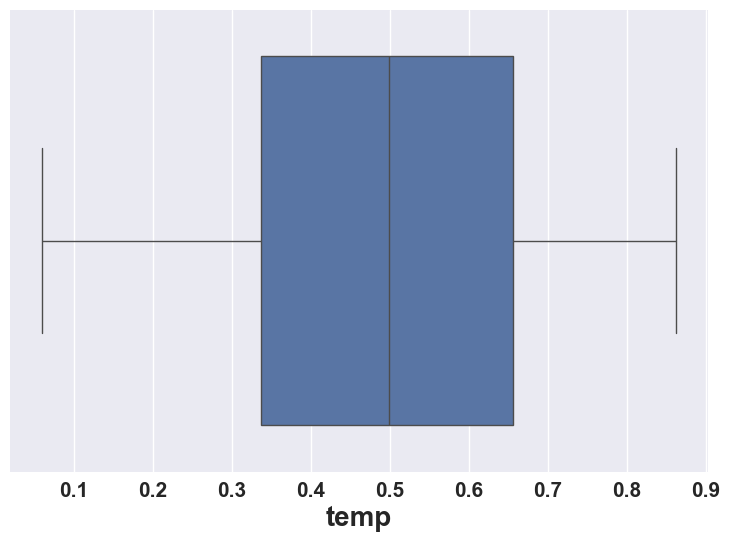

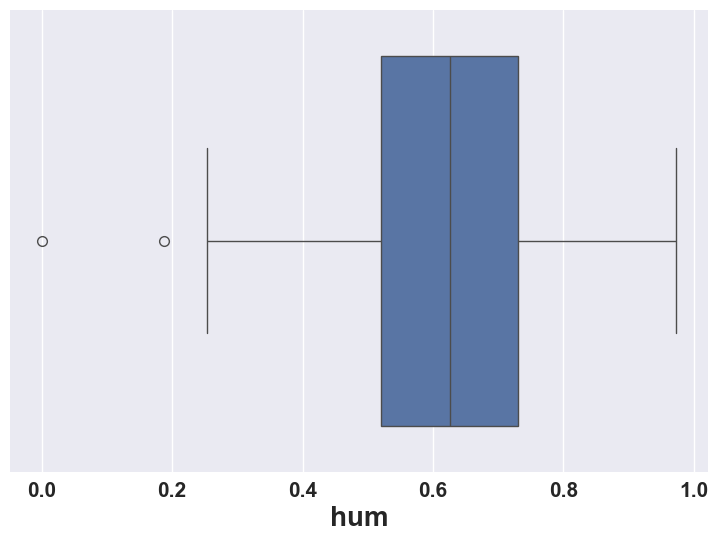

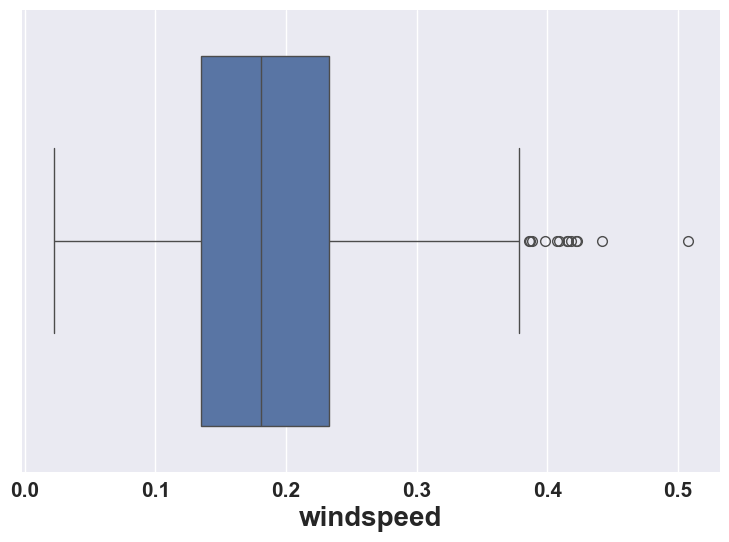

In [1187]:
# plotting box plot of numeric columns to check oultliers
for col in numeric_cols:
  fig = plt.figure(figsize = (9,6))
  ax = fig.gca()
  sns.boxplot(x = df[col])

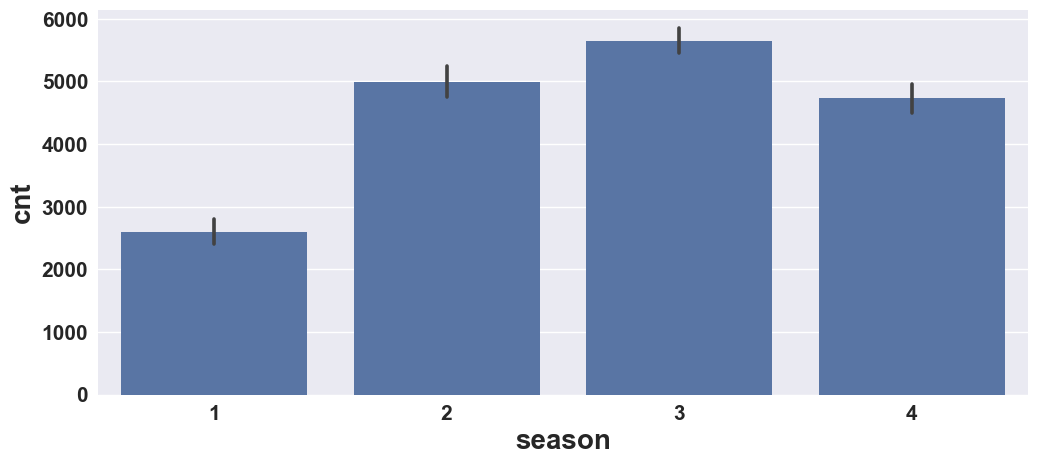

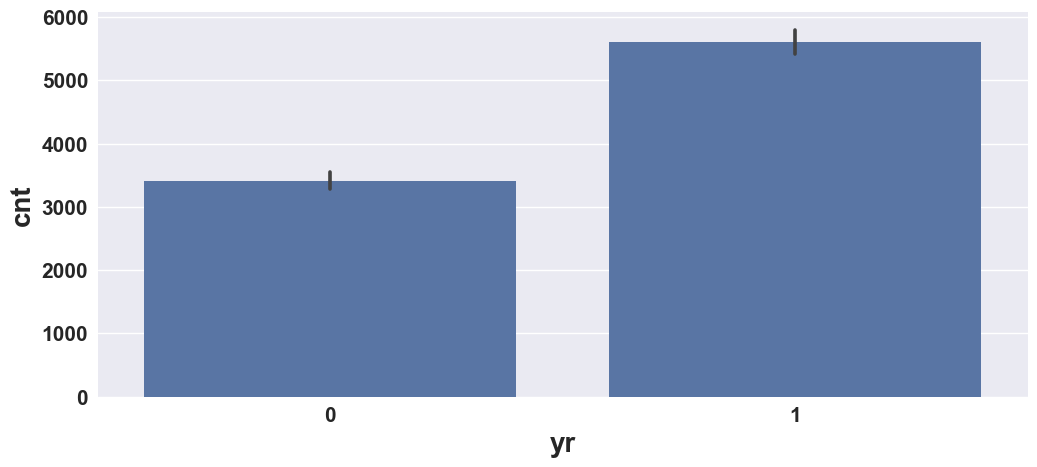

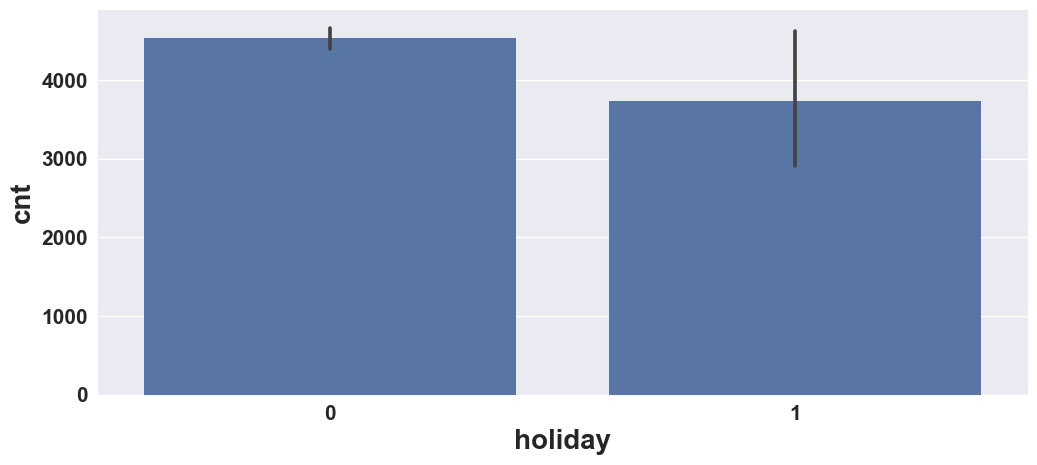

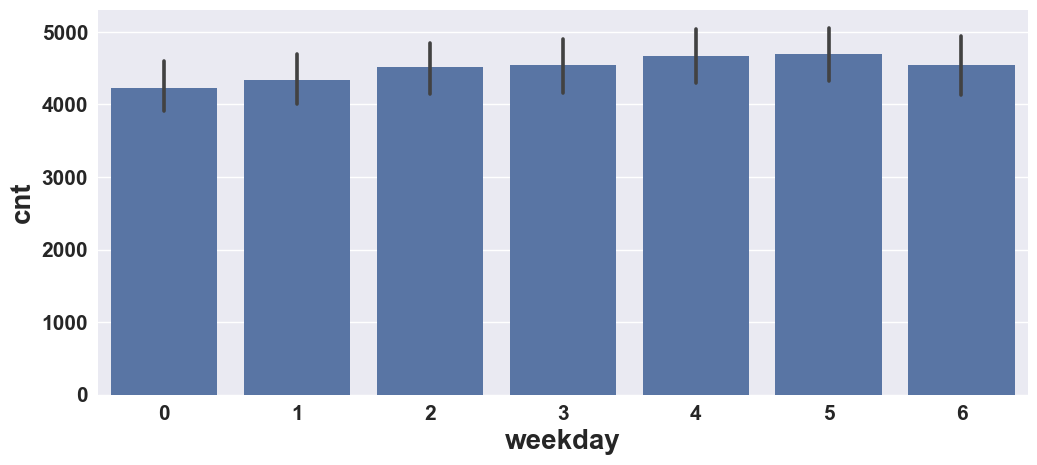

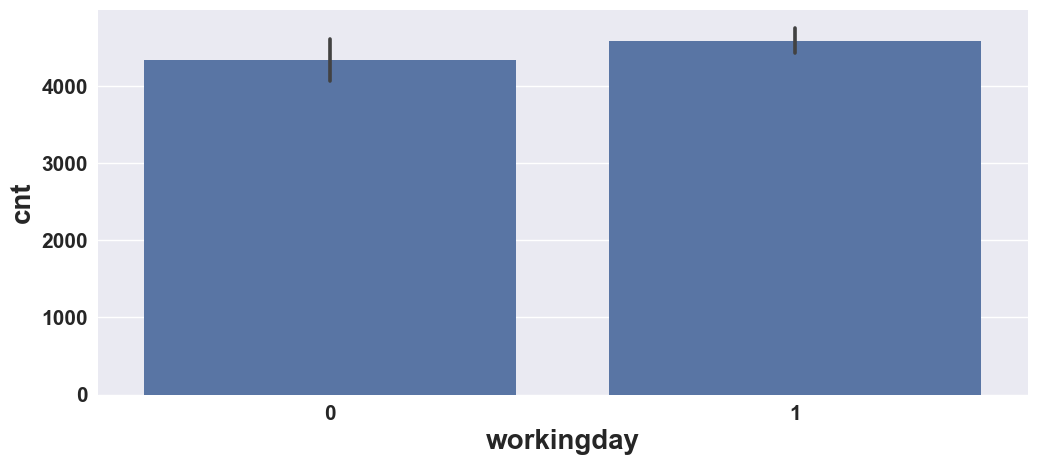

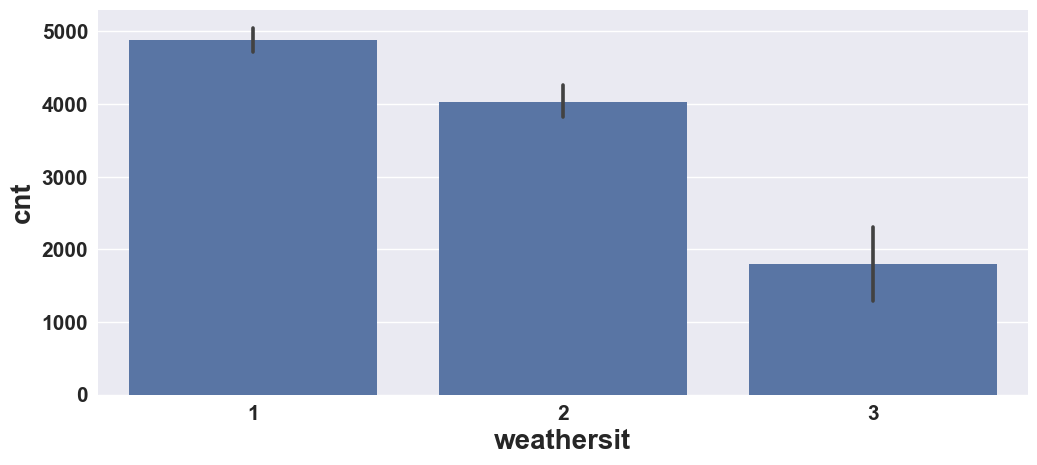

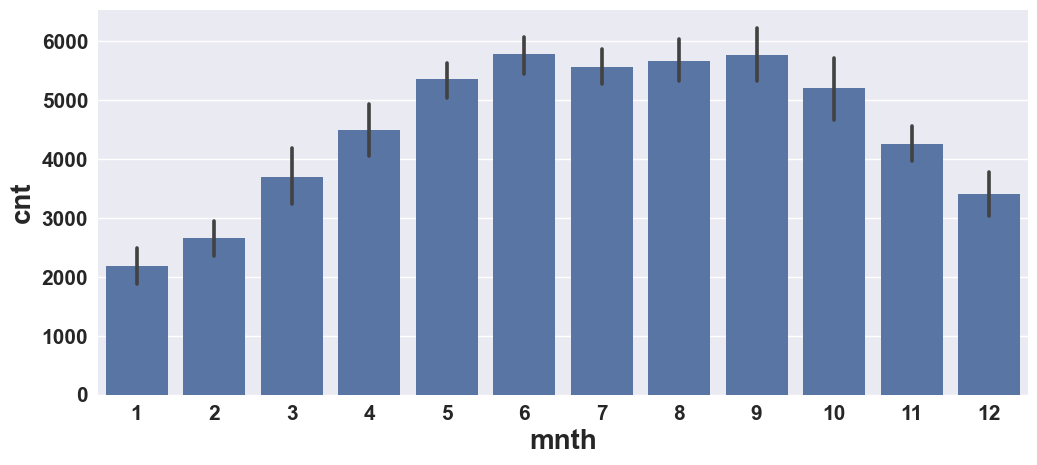

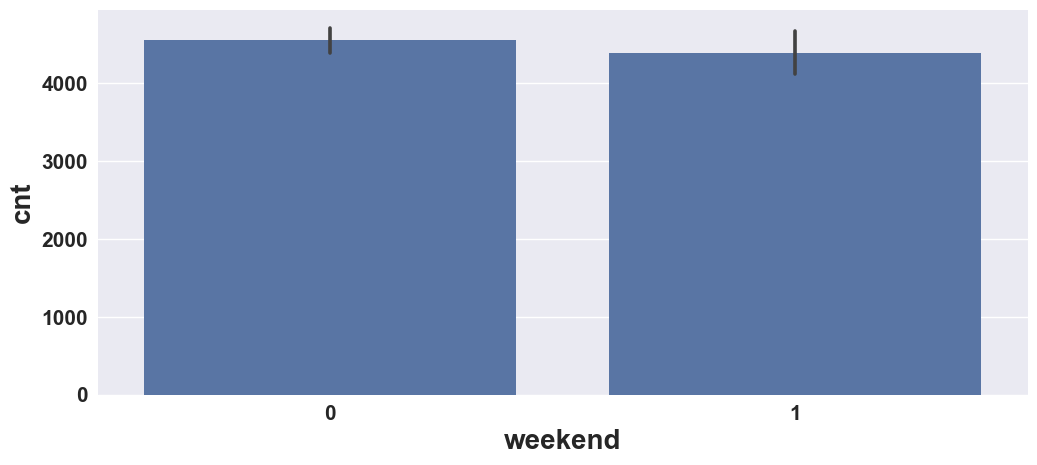

In [1188]:
# plot barchart plot for each categorical columns with respect to target variable to get insights
for col in categorical_cols:
    fig = plt.figure(figsize=(12, 5))
    ax = fig.gca()
    sns.barplot(x = df[col],y = df['cnt'])

## Observations from Above Charts :-

1. Season vs Count
* Demand is lowest in Season 1 (winter).
* Peaks in Season 3 (summer).
* Season has a strong impact on bike rentals

2. Year vs Count
* Year 1 shows much higher demand than Year 0.
* Indicates growth in overall bike usage.

3. Holiday vs Count
* Fewer bikes are rented on holidays.
* People use bikes more on regular days.

4. Weekday vs Count
* Counts are fairly similar across weekdays.
* No major weekday effect — usage is consistent.

5. Workingday vs Count
* Slightly higher demand on working days vs non-working days.
* Suggests commuting usage.

6. Weather Situation vs Count
* Demand is highest in clear weather (1).
* Drops in cloudy/mist (2).
* Very low when weather is bad (3).

7. Month vs Count
* Low in winter (Jan–Feb).
* Rises from spring, peaks around June–September.
* Drops again after October.

8. Weekend vs Count
* Weekend rentals slightly lower than weekdays.
* Users mainly ride for work-related travel.

## Dependent Variable (Bike Rent Count) Vs Categorical Columns

Text(0.5, 1.0, 'Bike Rental Trend according to Day on Holiday / No Holiday')

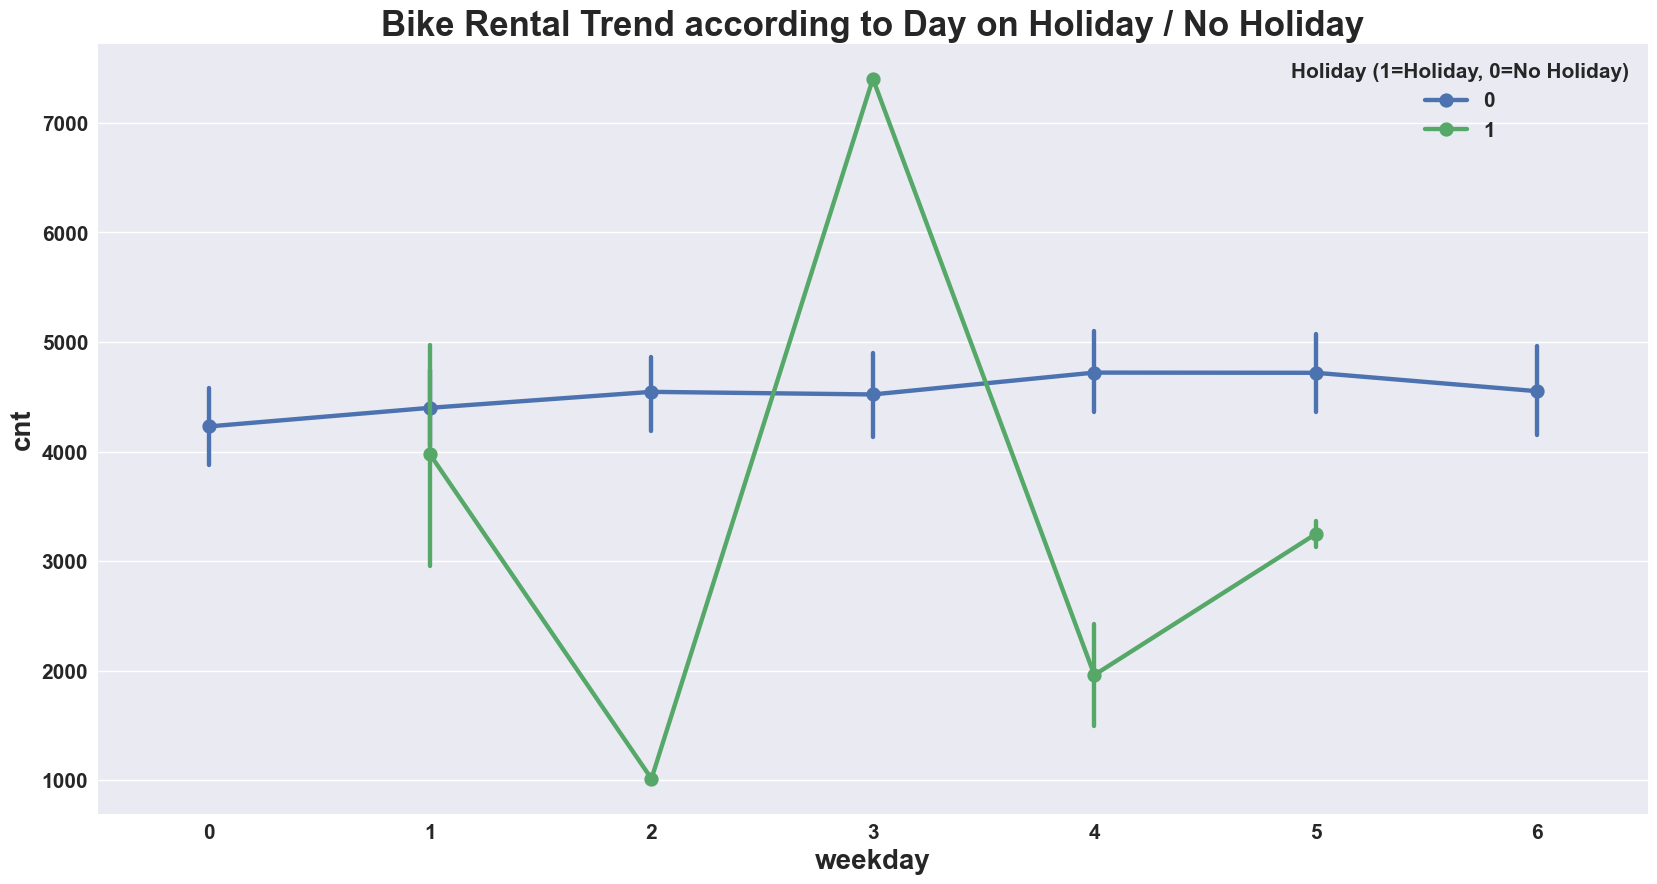

In [1189]:
plt.figure(figsize=(20,10))
sns.pointplot(x = df['weekday'],y = df['cnt'],hue = df['holiday'])
plt.legend(title="Holiday (1=Holiday, 0=No Holiday)")
plt.title("Bike Rental Trend according to Day on Holiday / No Holiday")

### Observations :-
*  On non-holidays, bike rentals remain steady throughout the week — likely due to regular office or college commuters.
*  On holidays, rentals fluctuate sharply, showing less consistent usage — probably because people travel for leisure or special plans rather than routine.
*  There’s a huge spike on weekday 3 (holiday = 1) — could be due to a special event or mid-week holiday, leading to higher recreational rides.
*  On most other holidays, rentals are lower than normal weekdays, indicating less commuting activity.
*  Overall, non-holidays show stable patterns, while holidays show unpredictable spikes and drops in bike usage.

Text(0.5, 1.0, 'Bike Rental Trend according to day on Working day / No Working day')

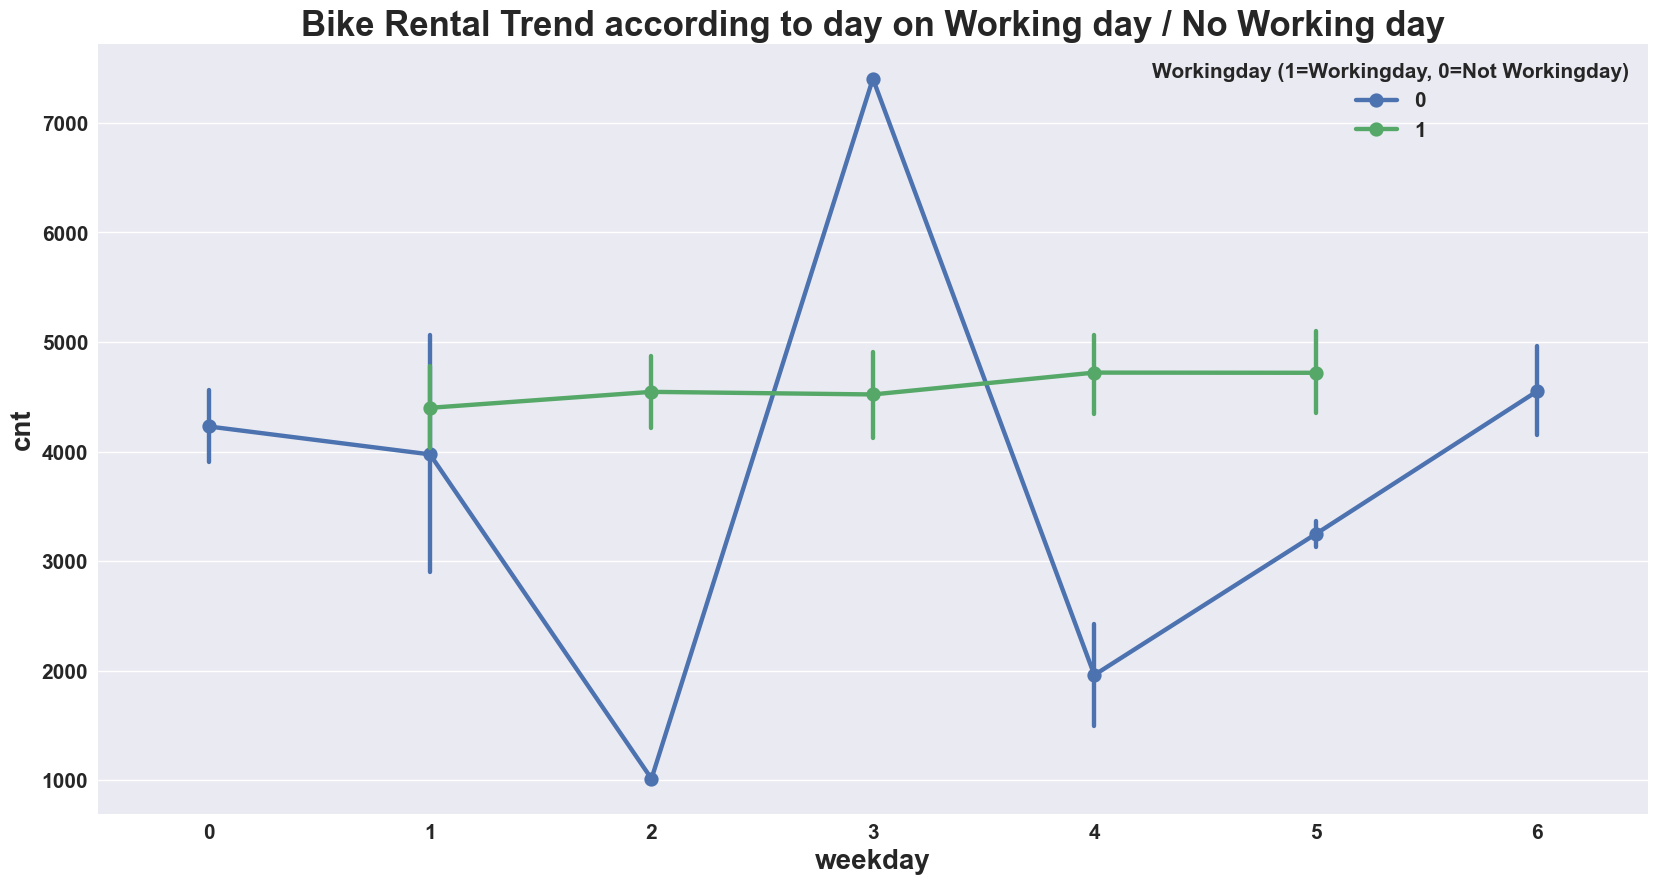

In [1190]:
# Bike Rental trend with respect to day on working day.
plt.figure(figsize=(20,10))
sns.pointplot(x = df['weekday'],y = df['cnt'],hue = df['workingday'])
plt.legend(title="Workingday (1=Workingday, 0=Not Workingday)")
plt.title("Bike Rental Trend according to day on Working day / No Working day")

### Observations :-
*  On working days (green line = 1), the number of bike rentals stays fairly consistent throughout the week, showing that people use bikes regularly for office or college commutes.
*  On non-working days (blue line = 0), the rental trend is highly variable — some days have very low counts, while others show sharp spikes.
*  A significant peak appears around weekday 3 (non-working day) — this could be due to weekend outings or special events leading to more leisure rides.
*  Rentals drop sharply on weekday 2 and weekday 4 (non-working days), suggesting less outdoor activity or unfavorable conditions on those days.
*  Overall, working days show stable, moderate rentals, while non-working days show unpredictable patterns — indicating that commuting drives steady demand, whereas leisure usage varies by day.

Text(0.5, 1.0, 'Bike Rental Trend according to Seasons on days')

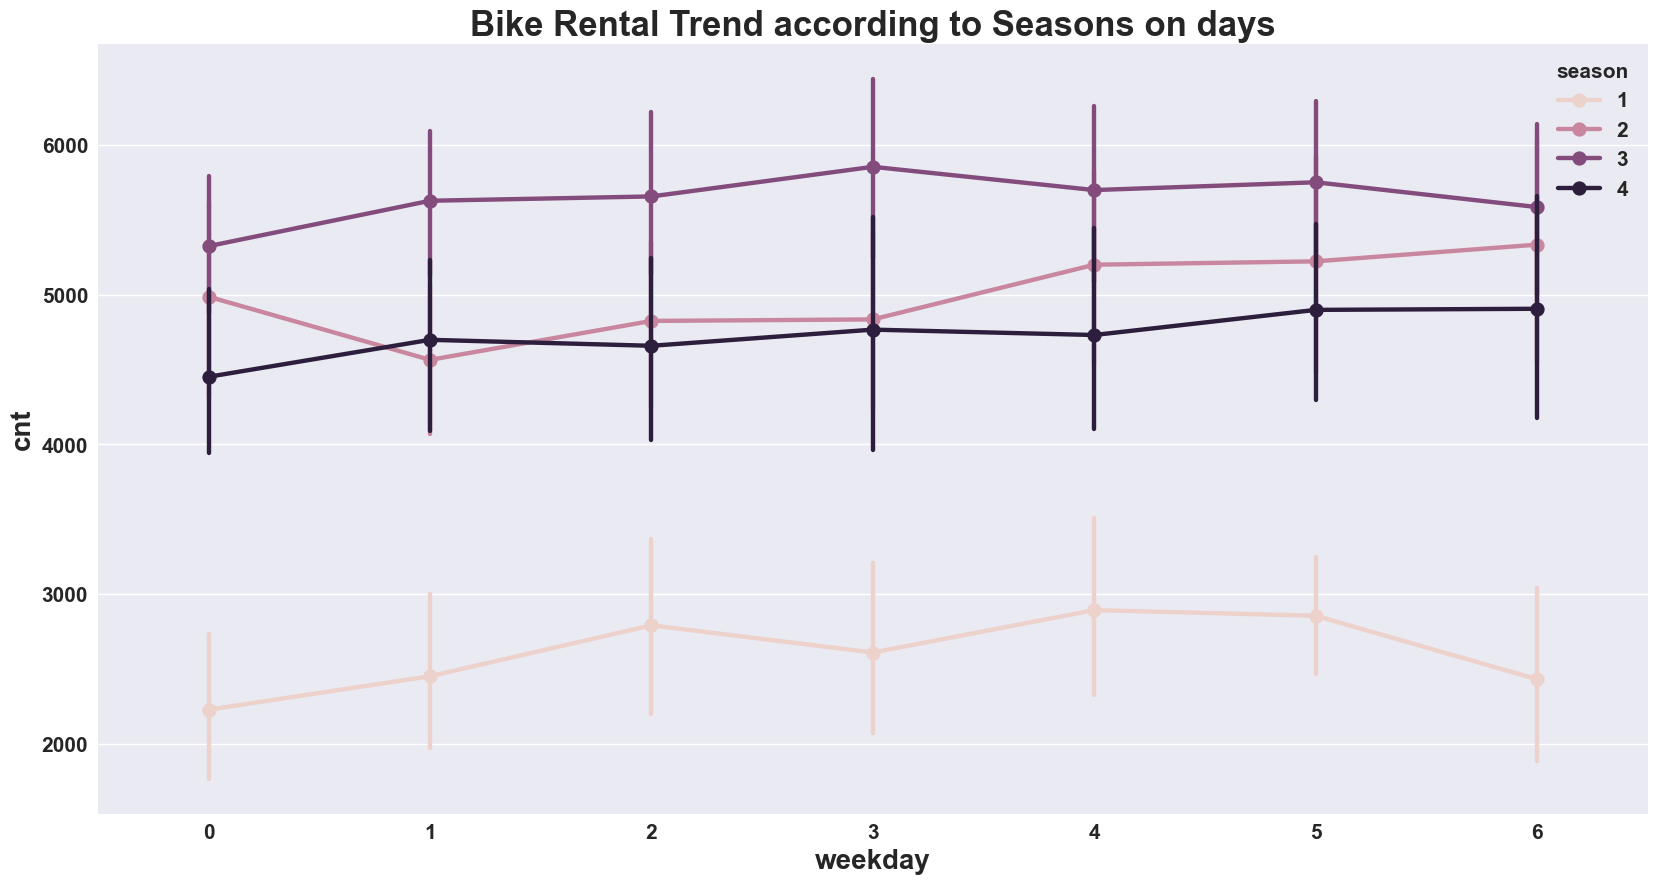

In [1191]:
plt.figure(figsize=(20,10))
sns.pointplot(x = df['weekday'],y = df['cnt'],hue = df['season'])
plt.title("Bike Rental Trend according to Seasons on days")

### Observations:-
*  Season 3 (Fall season) shows the highest number of rentals throughout the week (purple line) , when weather is pleasant and ideal for biking.
*  Season 1 (Spring season) has the lowest rentals (light cream line), likely due to cold or harsh weather conditions reducing bike usage.
*  Seasons 2(Summer) and 4(Winter) show moderate and steady rental activity, with values between 4500–5200, indicating balanced riding conditions.
*  Across all seasons, the weekday pattern remains fairly consistent, suggesting that seasonal changes impact rentals more than weekday differences.
*  The variation between days is small, implying people ride bikes regularly across the week regardless of the specific weekday, but overall volume depends heavily on the season.

Text(0.5, 1.0, 'Bike Rental Trend according to Seasons on Months')

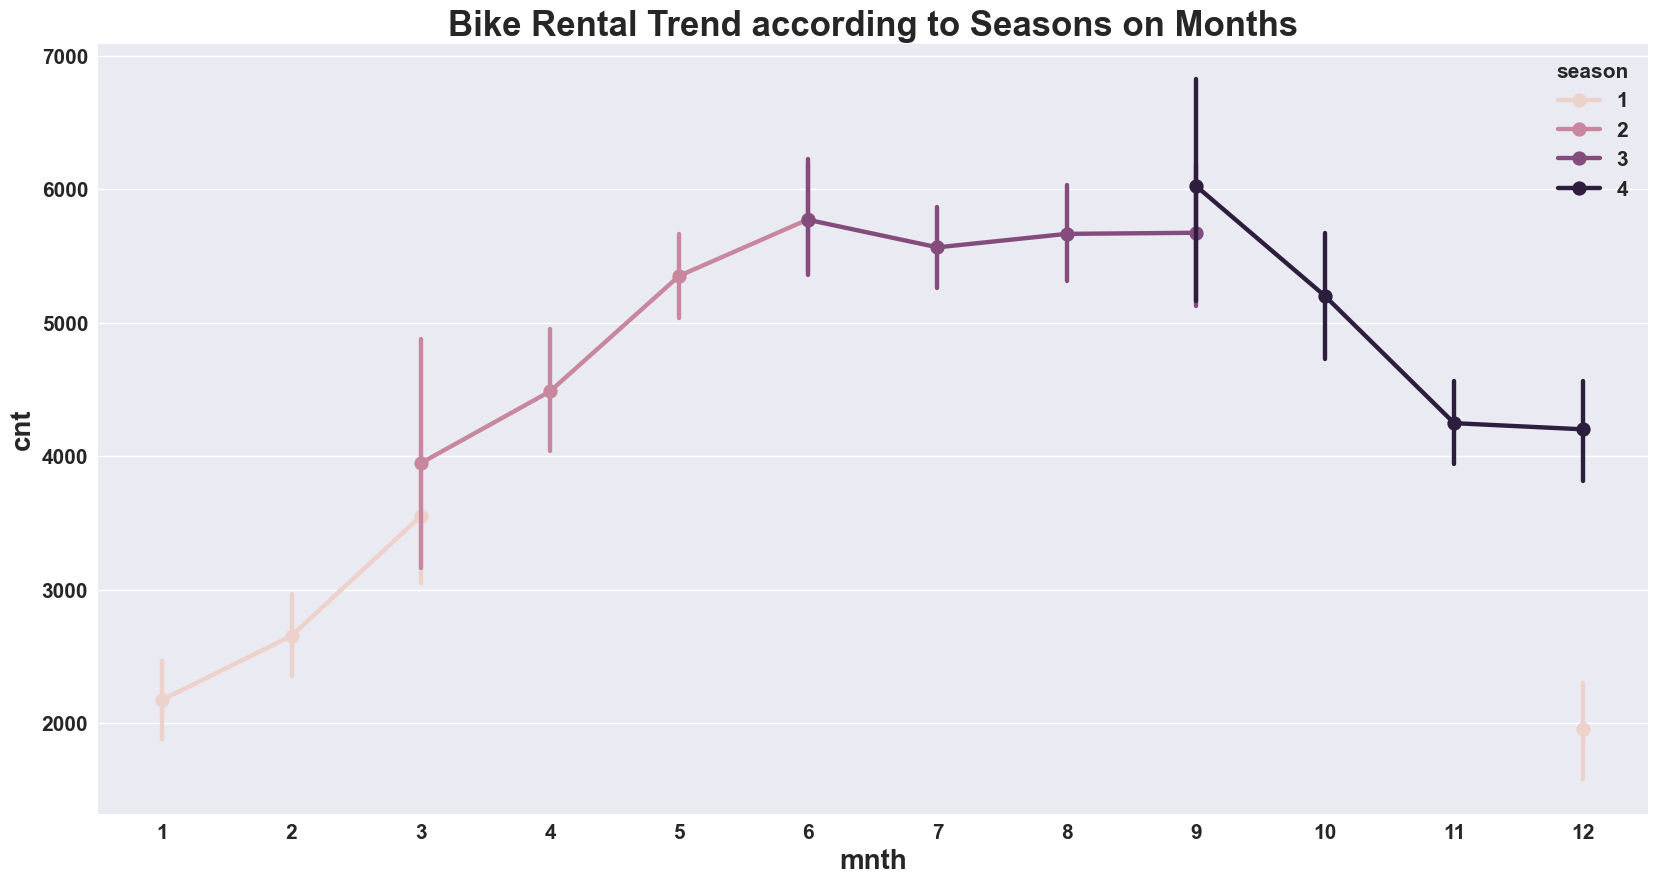

In [1192]:
plt.figure(figsize=(20,10))
sns.pointplot(x = df['mnth'],y = df['cnt'],hue = df['season'])
plt.title("Bike Rental Trend according to Seasons on Months")

### Observations:-
*  Rentals rise continuously from winter to summer.
*  Months Jan–Mar show the lowest usage, especially January.Rentals gradually increase from Jan → Mar but stay below other seasons.
*  Months Apr–Jun see a sharp rise in usage.Bike rentals jump significantly from March to June.
*  Months Jul–Sep show the maximum bike demand.Rentals remain consistently high throughout these months.
*  Rentals stay high in October, then drop sharply in November and December.December marks the beginning of low winter usage again.
* Clear and logical pattern where weather/temperature influences demand: Cold → fewer rentals , Warm → more rentals

## Distribution of Target Variable

<Axes: xlabel='cnt'>

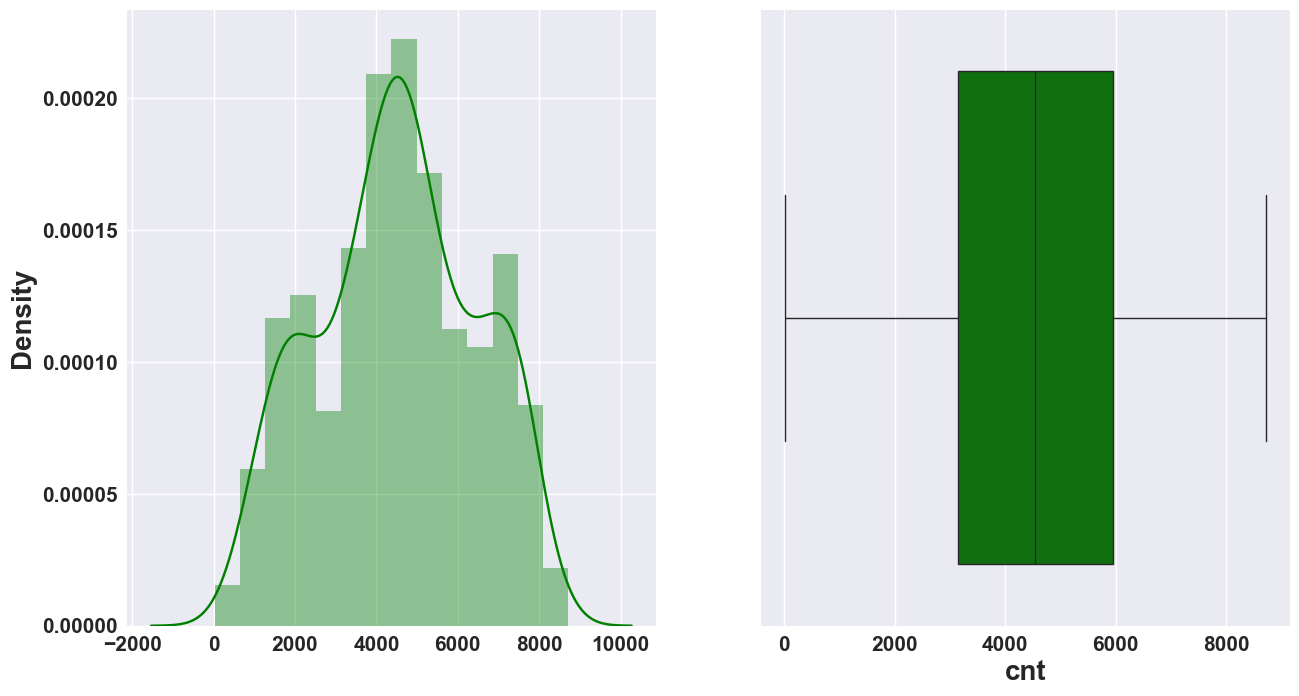

In [1193]:
f, axes = plt.subplots(1, 2,figsize=(15,8))
sns.distplot(x= df['cnt'],color='g',ax=axes[0])
sns.boxplot(x = df['cnt'],color='g',ax=axes[1])


* No significant outliers are visible in the box plot — most observations fall within a normal range.

### Univariate Analysis

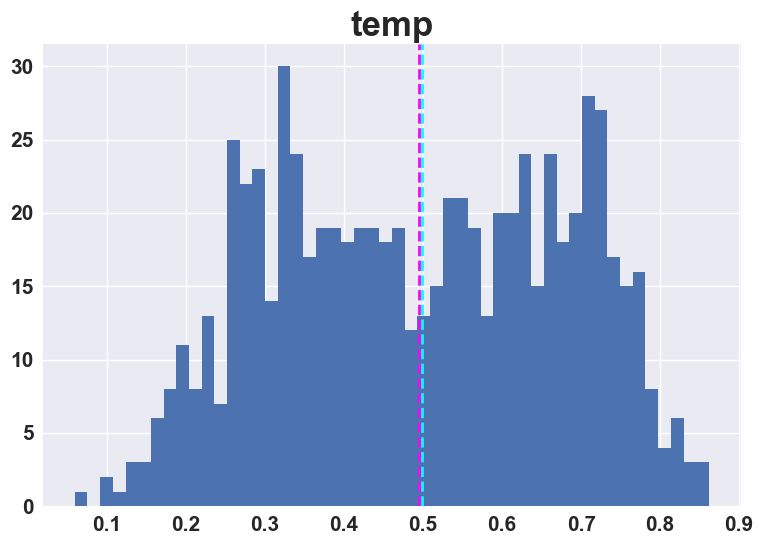

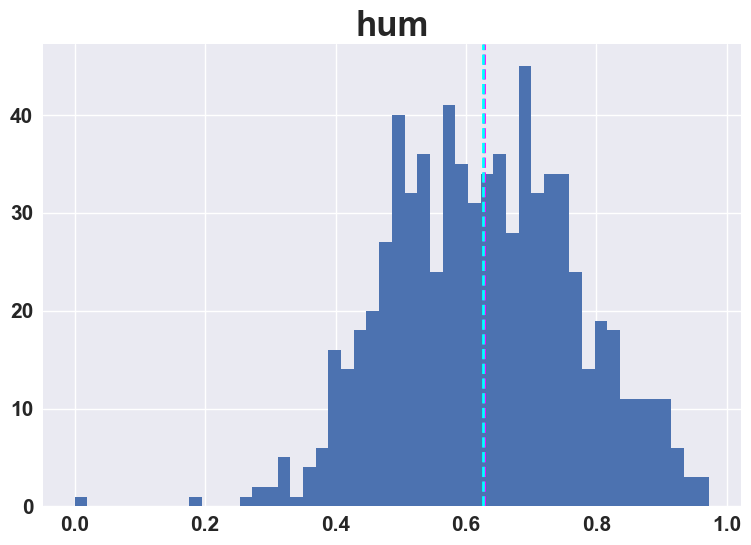

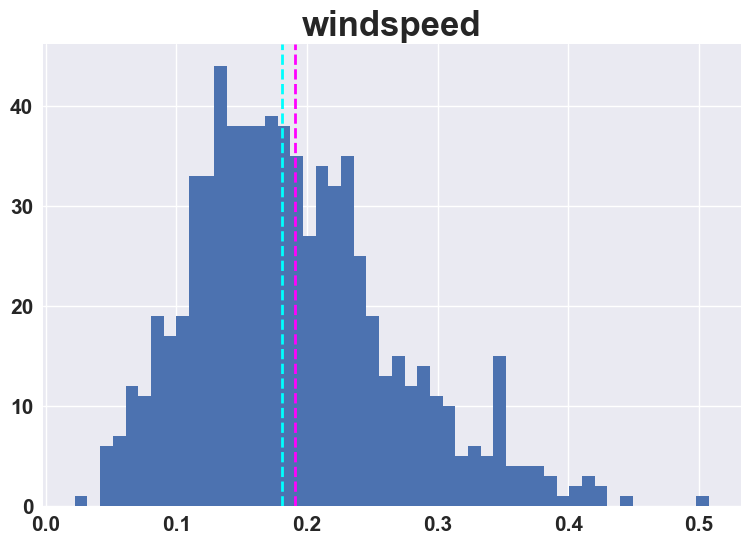

In [1194]:
for col in numeric_cols:
    fig = plt.figure(figsize=(9, 6))
    ax = fig.gca()
    feature = df[col]
    feature.hist(bins = 50, ax = ax)
    ax.axvline(feature.mean(), color='magenta', linestyle='dashed', linewidth=2)
    ax.axvline(feature.median(), color='cyan', linestyle='dashed', linewidth=2)    
    plt.title(col)
plt.show()

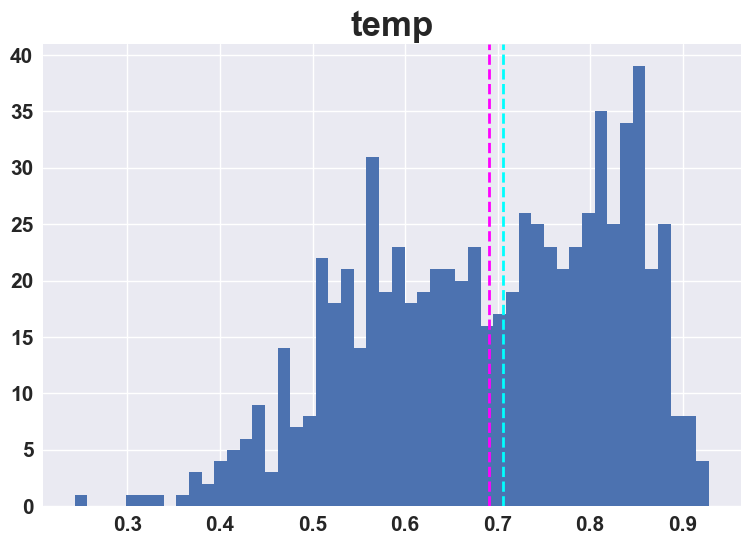

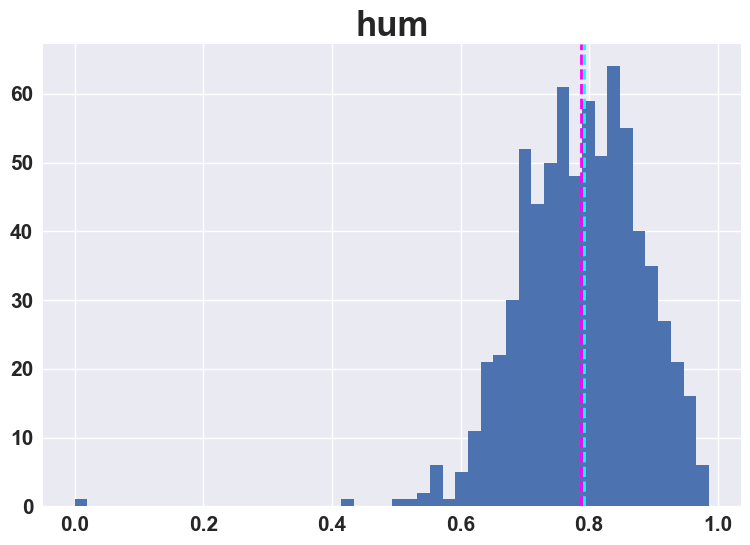

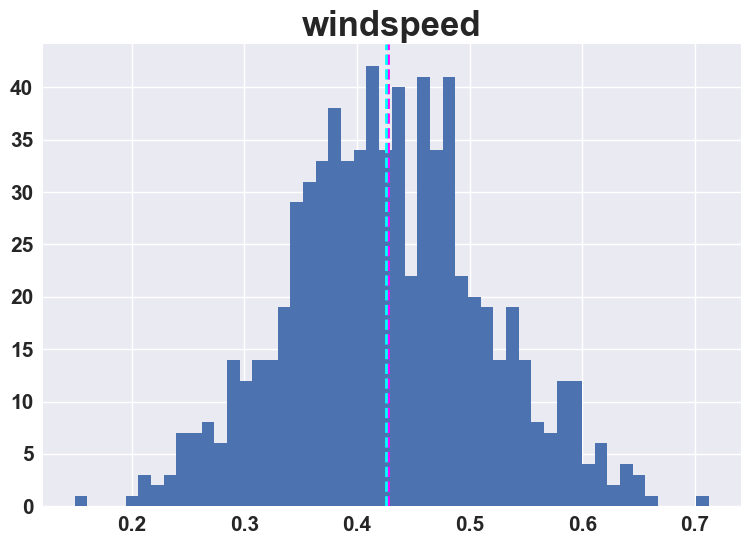

In [1195]:
# Normalizing The variables using squre root method.
for col in numeric_cols:
    fig = plt.figure(figsize=(9, 6))
    ax = fig.gca()
    feature = np.sqrt(df[col])
    feature.hist(bins=50, ax = ax)
    ax.axvline(feature.mean(), color='magenta', linestyle='dashed', linewidth=2)
    ax.axvline(feature.median(), color='cyan', linestyle='dashed', linewidth=2)    
    ax.set_title(col)
plt.show()

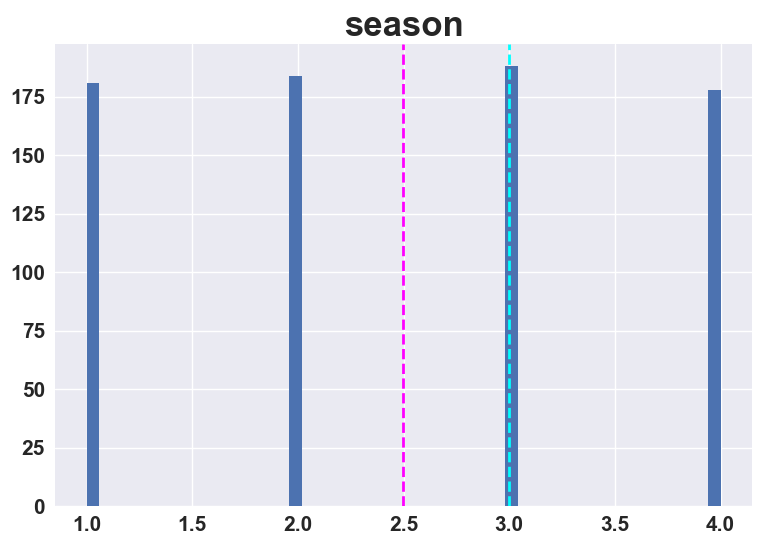

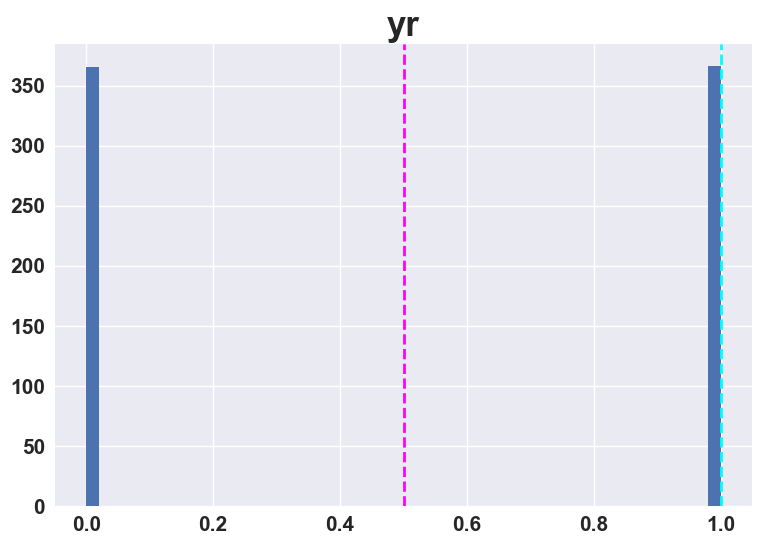

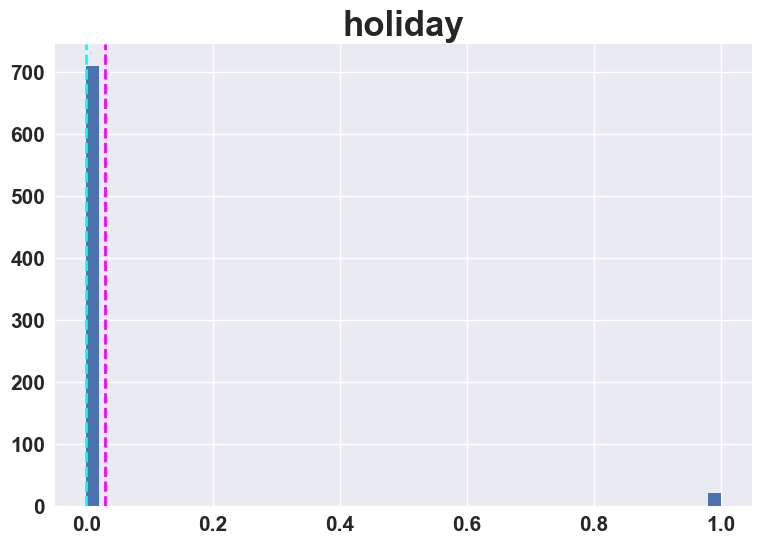

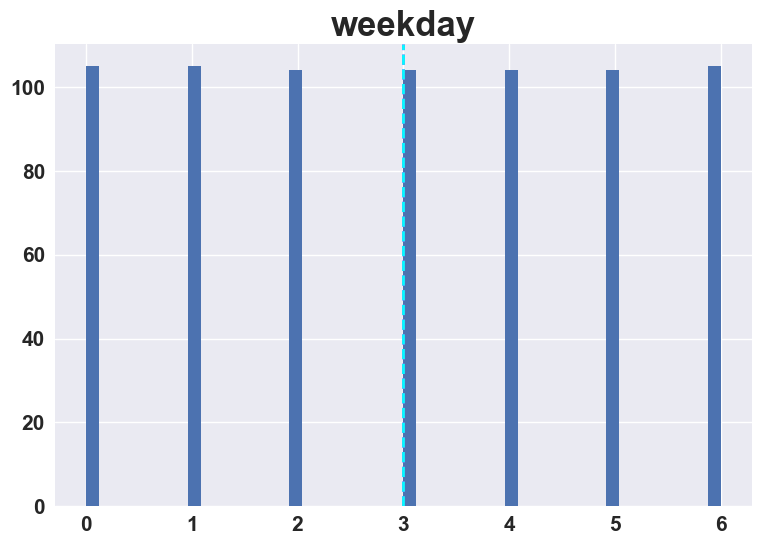

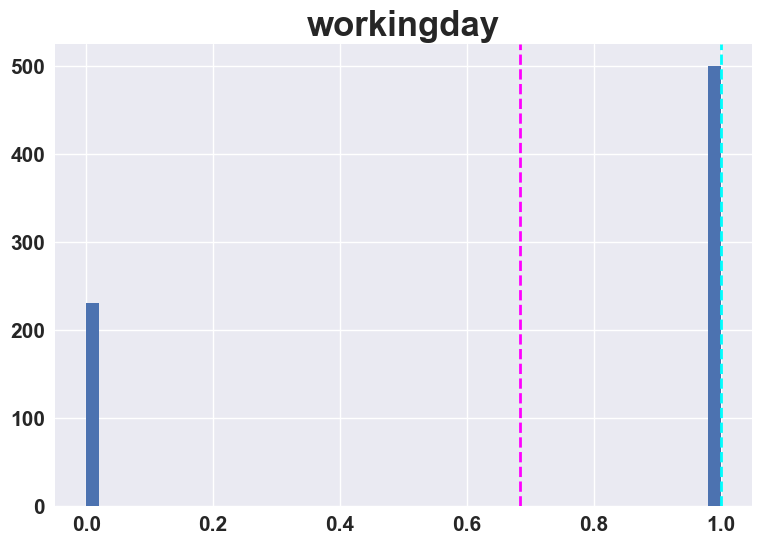

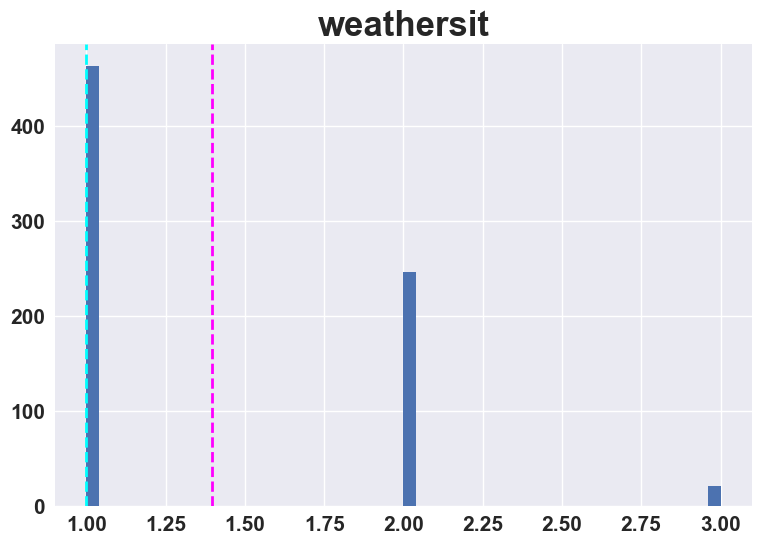

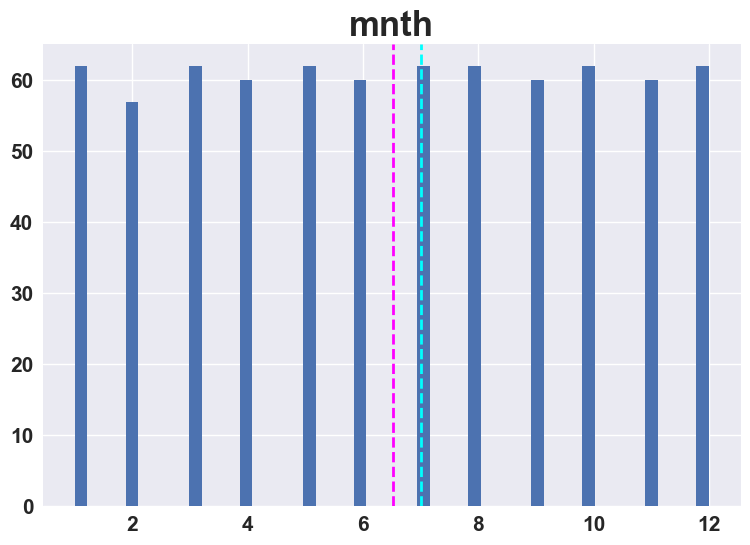

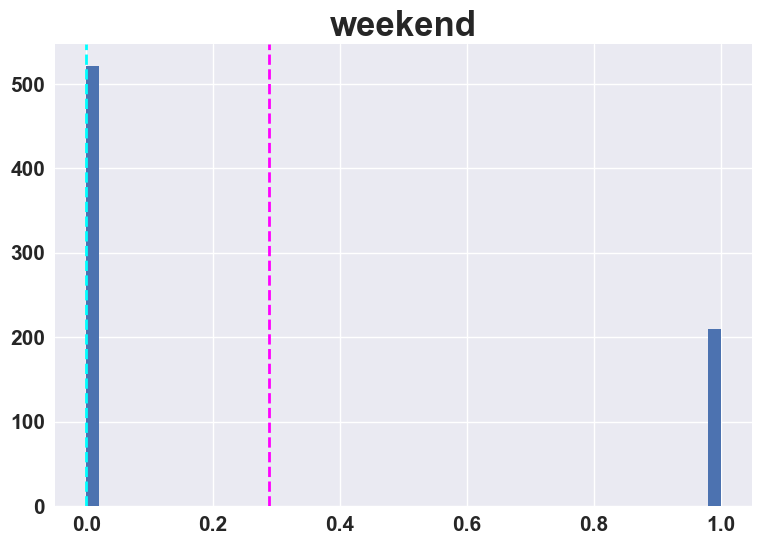

In [1196]:
for col in categorical_cols:
    fig = plt.figure(figsize=(9, 6))
    ax = fig.gca()
    feature = df[col]
    feature.hist(bins = 50, ax = ax)
    ax.axvline(feature.mean(), color='magenta', linestyle='dashed', linewidth=2)
    ax.axvline(feature.median(), color='cyan', linestyle='dashed', linewidth=2)    
    plt.title(col)
plt.show()

### Bivariate Analysis

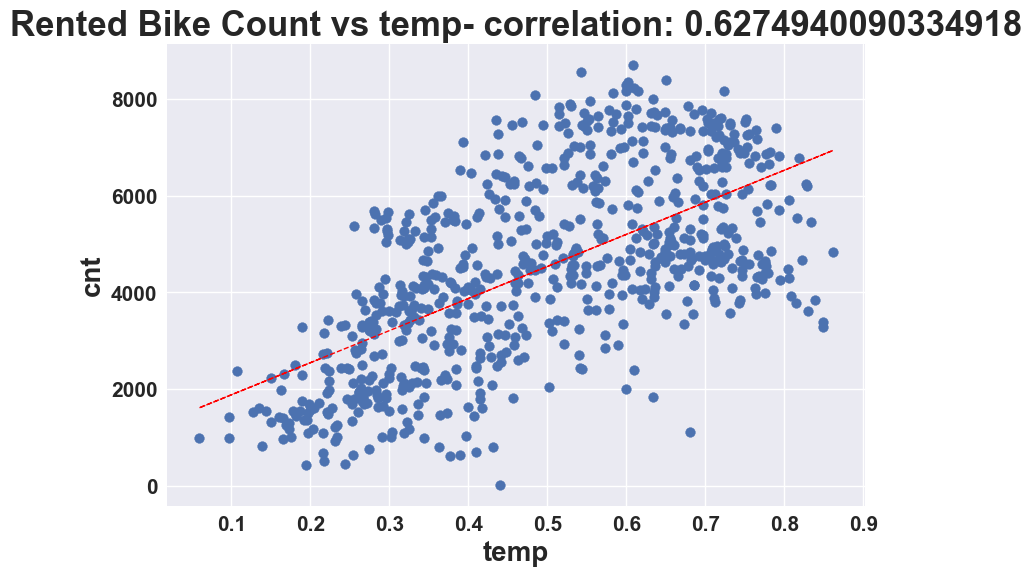

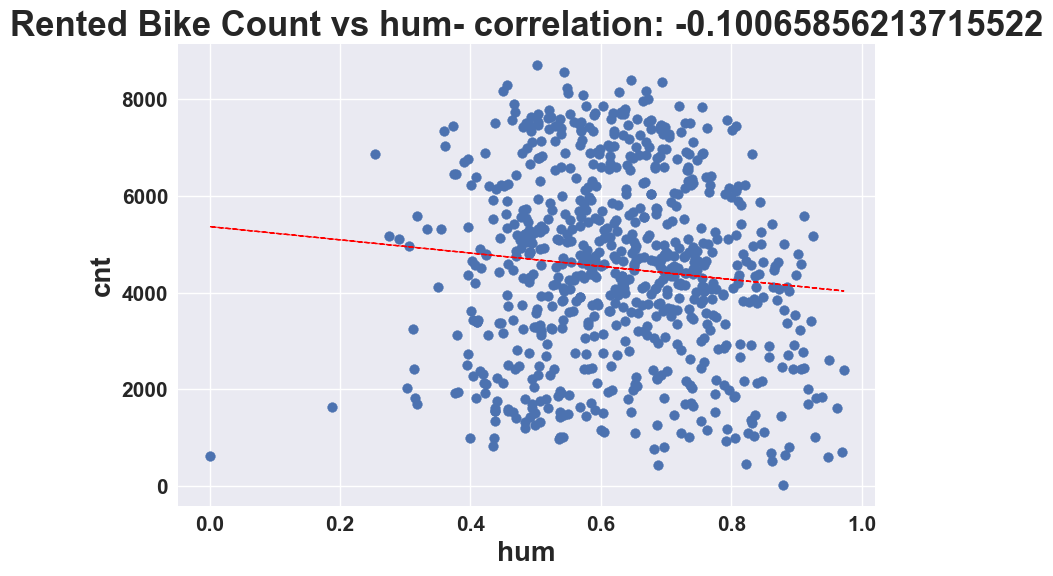

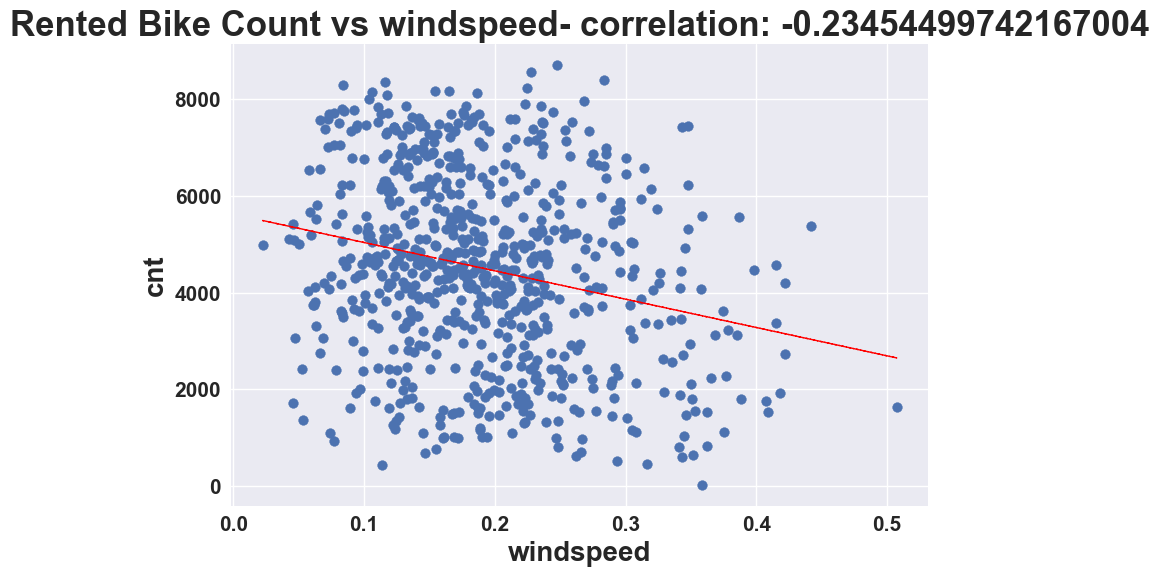

In [1197]:
for col in numeric_cols:
    fig = plt.figure(figsize=(9, 6))
    ax = fig.gca()
    feature = df[col]
    label = df['cnt']
    correlation = feature.corr(label)
    plt.scatter(x=feature, y=label)
    plt.xlabel(col)
    plt.ylabel('cnt')
    ax.set_title('Rented Bike Count vs ' + col + '- correlation: ' + str(correlation))
    z = np.polyfit(df[col], df['cnt'], 1)
    y_hat = np.poly1d(z)(df[col])

    plt.plot(df[col], y_hat, "r--", lw=1)

plt.show()

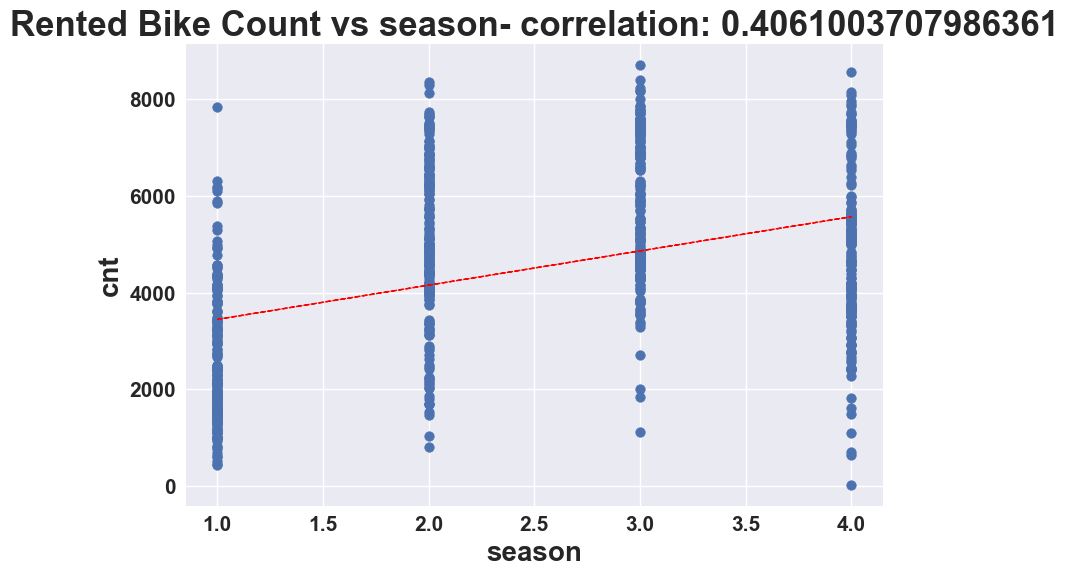

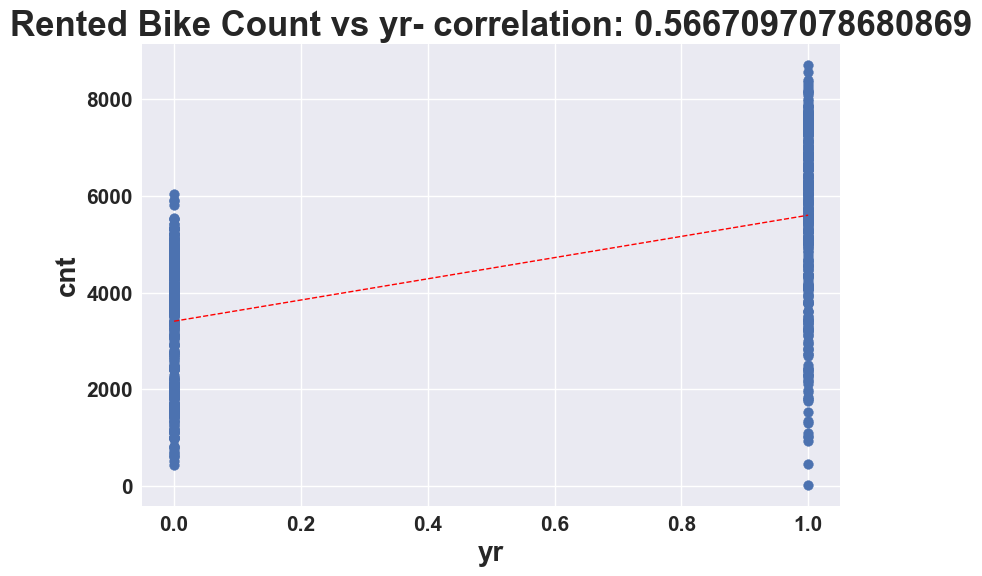

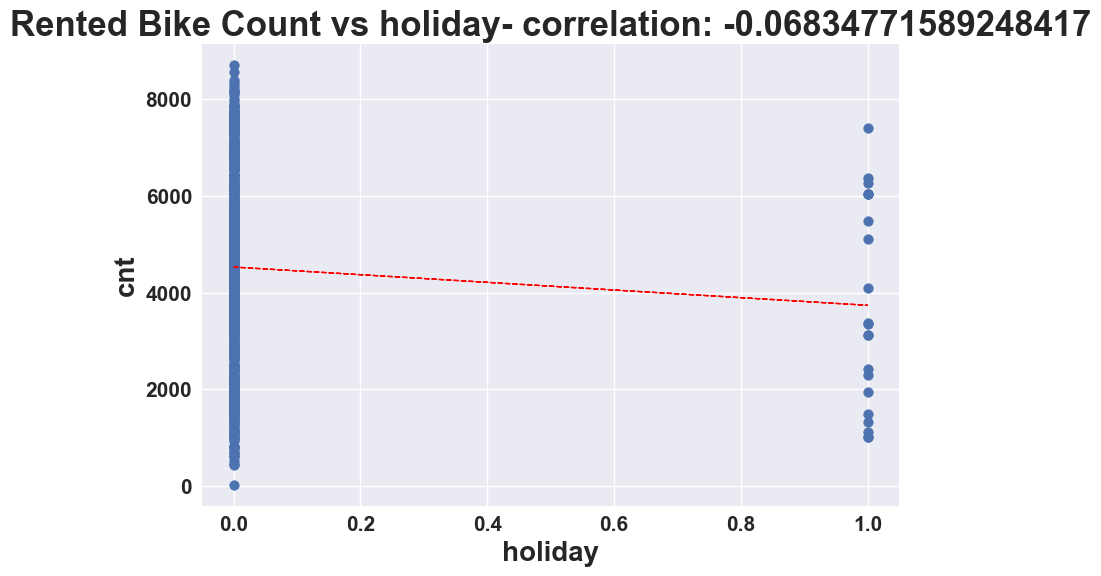

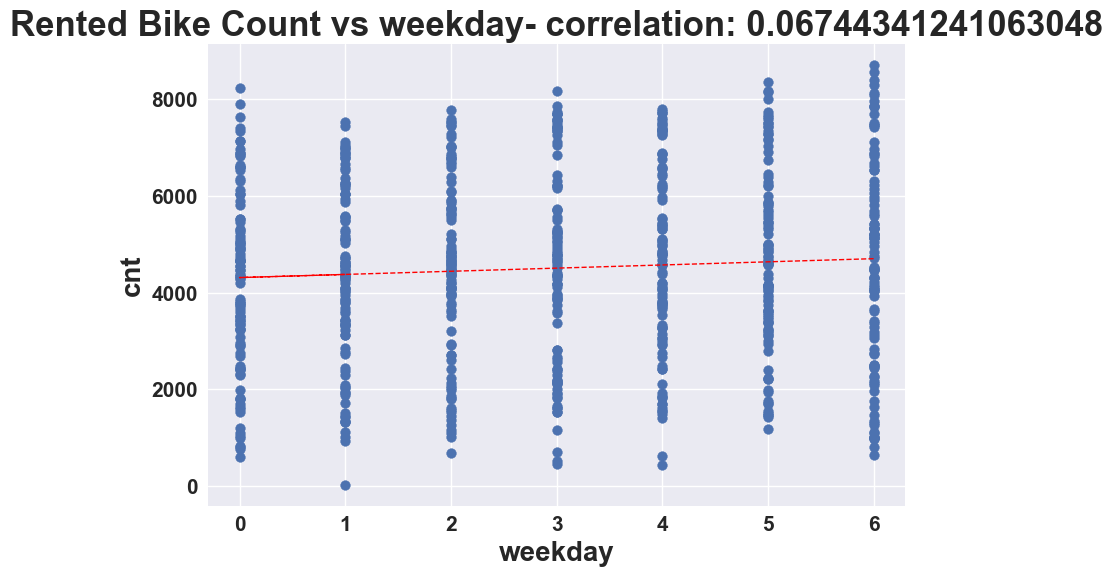

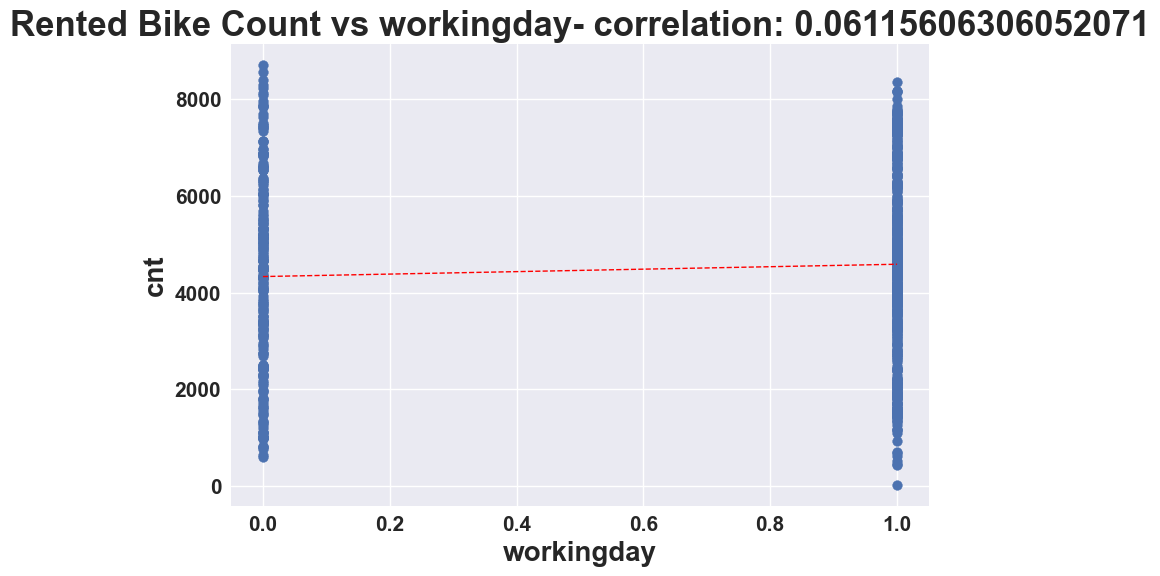

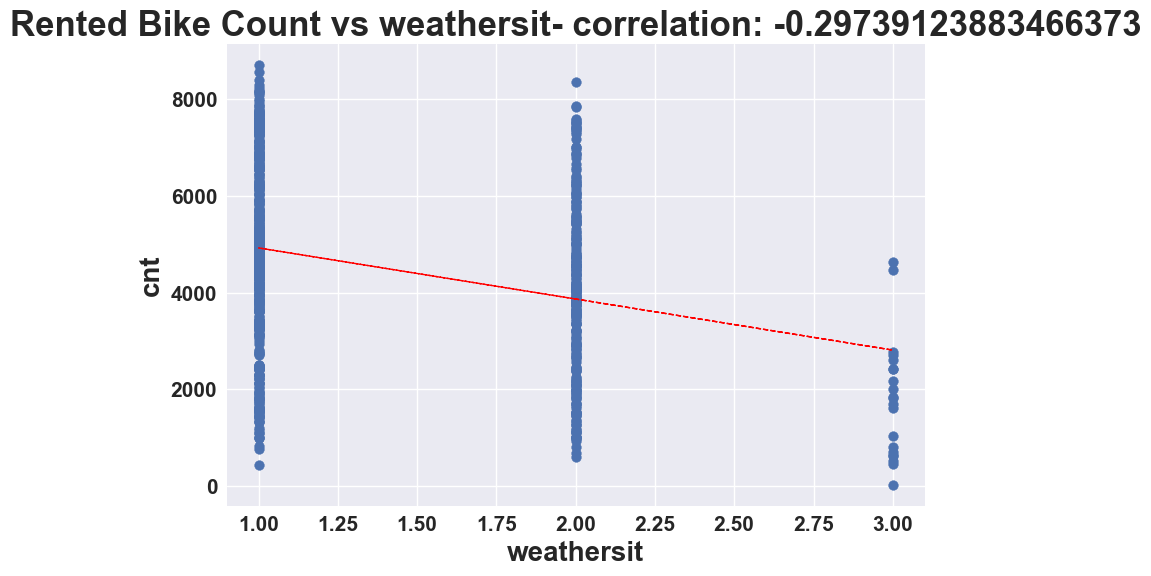

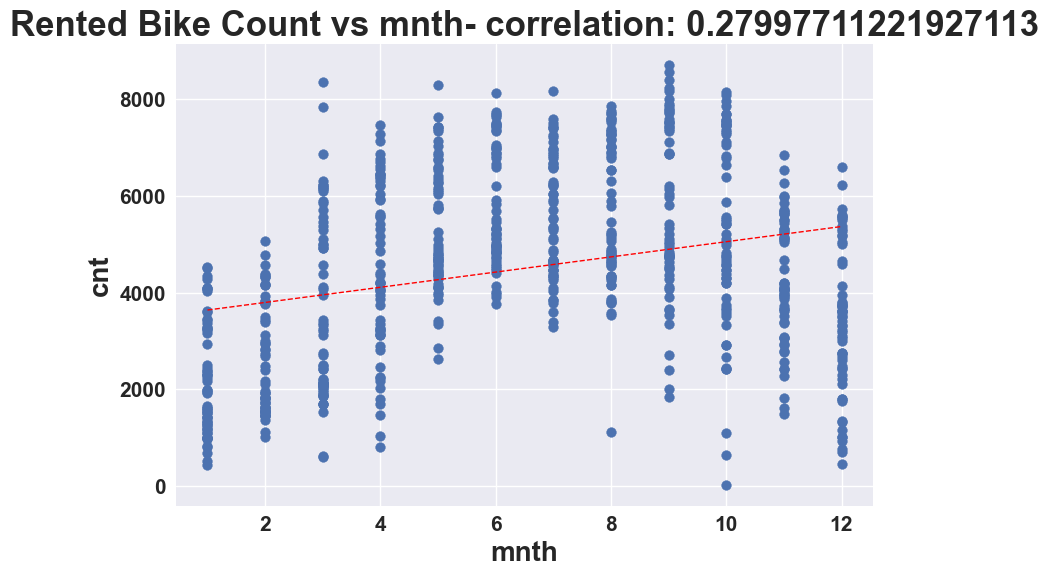

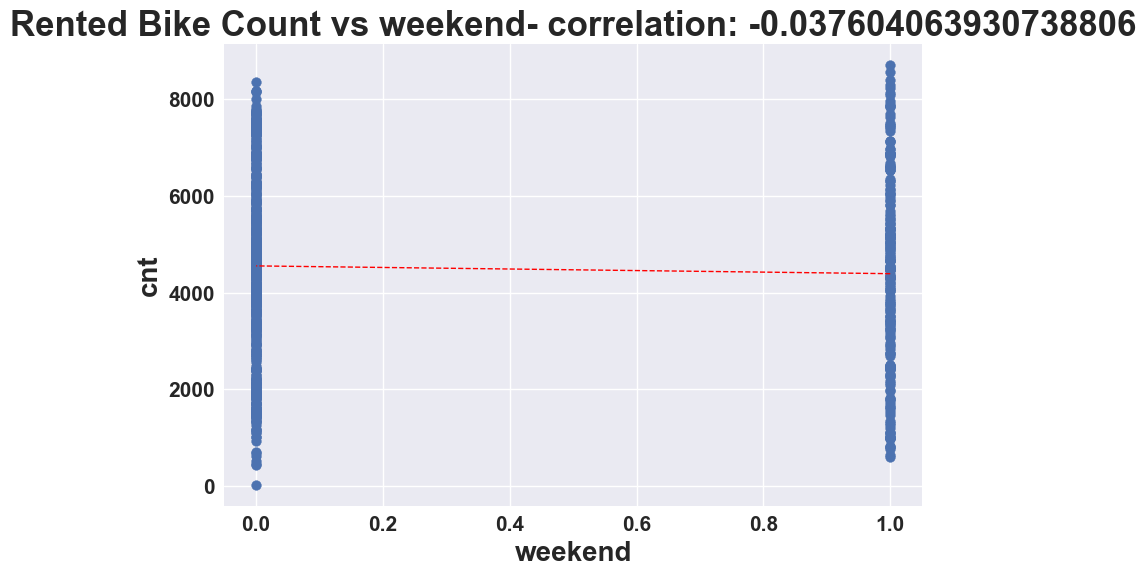

In [1198]:
for col in categorical_cols:
    fig = plt.figure(figsize=(9, 6))
    ax = fig.gca()
    feature = df[col]
    label = df['cnt']
    correlation = feature.corr(label)
    plt.scatter(x=feature, y=label)
    plt.xlabel(col)
    plt.ylabel('cnt')
    ax.set_title('Rented Bike Count vs ' + col + '- correlation: ' + str(correlation))
    z = np.polyfit(df[col], df['cnt'], 1)
    y_hat = np.poly1d(z)(df[col])

    plt.plot(df[col], y_hat, "r--", lw=1)

plt.show()

# Observations:-

## Numeric Columns :-

### 1. Temperature vs Count (corr = +0.62)
Strong positive correlation.
As temperature increases, bike rentals increase significantly.
Warm weather encourages more bike usage.

### 2. Humidity vs Count (corr = –0.10)
Very weak negative correlation.
Higher humidity slightly reduces rentals, but the effect is minimal.
Rentals mostly unaffected by humidity.

### 3. Windspeed vs Count (corr = –0.23)
Moderate negative correlation.
Higher windspeed tends to reduce bike rentals.
Strong winds are less comfortable for riding.

## Categorical Columns:-

### 4. Season vs Count (corr = +0.40)
Moderate positive correlation.
Rentals increase across seasons from winter → summer.
Season strongly influences user behavior.

### 5. Year vs Count (corr = +0.56)
Strong positive correlation.
Rentals are much higher in the second year (1) than the first year (0).
Indicates an overall growth trend in bike usage.

### 6. Holiday vs Count (corr = –0.06)
Very weak negative correlation.
Rentals slightly lower on holidays, but the impact is negligible.

### 7 Workingday vs Count (corr = +0.06)
Very weak positive correlation.
Slightly higher rentals on working days, but overall impact is minimal.

### 8. Weekday vs Count (corr = +0.06)
No meaningful correlation.
Rentals remain fairly constant across all days of the week.
Weekday has almost no effect on bike usage.

### 9 Weekend (corr = –0.03)
Minimal negative correlation.
Rentals on weekends are nearly similar to weekdays.

### 10. Weather Situation vs Count (corr = –0.29)
Moderate negative correlation.
Worse weather (e.g., mist, rain) significantly reduces rentals.
Clear weather shows the highest usage.

### 11. Month vs Count (corr = +0.28)
Moderate positive correlation.
Rentals tend to increase from early months to mid-year then decline.
Shows the seasonal influence across months.

<Axes: >

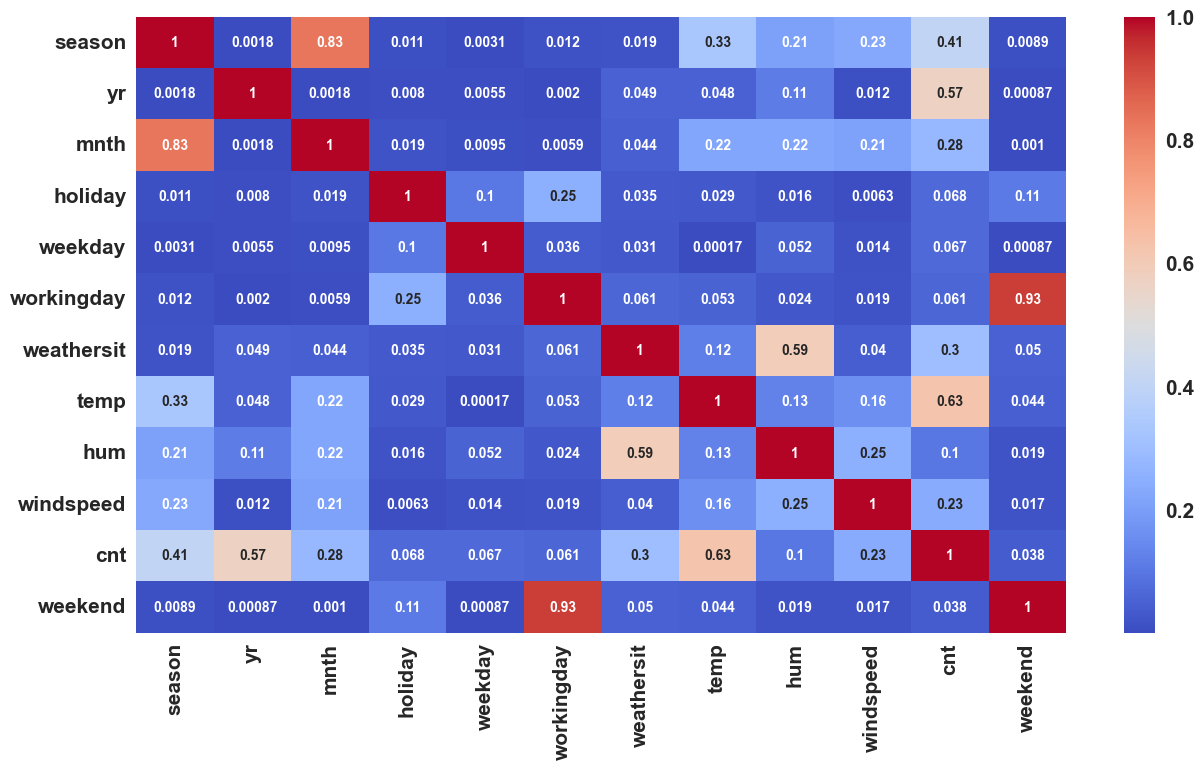

In [1199]:
plt.figure(figsize=(15,8))
correlation = df.corr()
sns.heatmap(abs(correlation), annot=True, cmap='coolwarm')

In [1200]:
# Make copy of dataset
df = df.copy()

### Modeling

In [1201]:
df.head()

season  yr  mnth  holiday  weekday  workingday  weathersit      temp  \
0       1   0     1        0        6           0           2  0.344167   
1       1   0     1        0        0           0           2  0.363478   
2       1   0     1        0        1           1           1  0.196364   
3       1   0     1        0        2           1           1  0.200000   
4       1   0     1        0        3           1           1  0.226957   

        hum  windspeed   cnt  weekend  
0  0.805833   0.160446   985        1  
1  0.696087   0.248539   801        1  
2  0.437273   0.248309  1349        0  
3  0.590435   0.160296  1562        0  
4  0.436957   0.186900  1600        0

In [1202]:
# Multicollinearity
from statsmodels.stats.outliers_influence import variance_inflation_factor
def Calculate_vif(X):
    '''
    Calculating VIF
    '''
    # Calculating VIF
    vif = pd.DataFrame()
    vif["variables"] = X.columns
    vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

    return(vif)

In [1203]:
Calculate_vif(df[[i for i in df.describe().columns if i not in ['cnt']]])

variables        VIF
0       season   3.541429
1           yr   1.020251
2         mnth   3.332130
3      holiday   2.284029
4      weekday   1.021463
5   workingday  33.713895
6   weathersit   1.741541
7         temp   1.215589
8          hum   1.905040
9    windspeed   1.165206
10     weekend  14.574050

In [1204]:
df = df.drop(columns=['weekend'])
df = df.drop(columns=['season'])


In [1205]:
Calculate_vif(df[[i for i in df.describe().columns if i not in ['cnt']]])

variables        VIF
0          yr   1.946112
1        mnth   5.016516
2     holiday   1.098640
3     weekday   3.099372
4  workingday   3.263813
5  weathersit  13.069985
6        temp   8.593278
7         hum  25.447801
8   windspeed   5.296236

In [1206]:
df = df.drop(columns=['hum'])


In [1207]:
Calculate_vif(df[[i for i in df.describe().columns if i not in ['cnt']]])

variables       VIF
0          yr  1.946053
1        mnth  4.573376
2     holiday  1.092664
3     weekday  3.085268
4  workingday  3.221616
5  weathersit  6.123932
6        temp  6.701484
7   windspeed  5.251681

In [1208]:
df['holiday'].value_counts()

holiday
0    710
1     21
Name: count, dtype: int64

In [1225]:
df['holiday'] = (df['workingday'] == 0) & (~df['weekday'].isin([0,6]))
df['holiday'] = df['holiday'].astype(int)


In [1209]:
df['holiday'] = df['holiday'].map({'No Holiday':0, 'Holiday':1})

In [1210]:
df['workingday'].value_counts()

workingday
1    500
0    231
Name: count, dtype: int64

In [1228]:
df.head()

yr  mnth  holiday  weekday  workingday  weathersit      temp  windspeed  \
0   0     1        0        6           0           2  0.344167   0.160446   
1   0     1        0        0           0           2  0.363478   0.248539   
2   0     1        0        1           1           1  0.196364   0.248309   
3   0     1        0        2           1           1  0.200000   0.160296   
4   0     1        0        3           1           1  0.226957   0.186900   

    cnt  
0   985  
1   801  
2  1349  
3  1562  
4  1600

In [1229]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   yr          731 non-null    int64  
 1   mnth        731 non-null    int64  
 2   holiday     731 non-null    int64  
 3   weekday     731 non-null    int64  
 4   workingday  731 non-null    int64  
 5   weathersit  731 non-null    int64  
 6   temp        731 non-null    float64
 7   windspeed   731 non-null    float64
 8   cnt         731 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 51.5 KB


### Linear Regression

In [1230]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV 
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge
from sklearn.linear_model import ElasticNet
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor

In [1261]:
# Creating a dependent variable for rented bike count
dependent_variable = 'cnt'

In [1262]:
# Create a list of independent variables
independent_variables = list(set(df.columns.tolist()) - {dependent_variable})
independent_variables

['weathersit',
 'workingday',
 'temp',
 'mnth',
 'holiday',
 'weekday',
 'yr',
 'windspeed']

In [1263]:
# Create the dependent variable data
y = np.sqrt(df['cnt'])

# Create the data of independent variables
X = df.drop('cnt',axis=1)

In [1264]:
# Splitting the dataset into the Training set and Test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [1265]:
X_train[0:10]

yr  mnth  holiday  weekday  workingday  weathersit      temp  windspeed
97    0     4        0        5           1           2  0.335833   0.226992
503   1     5        0        5           1           1  0.564167   0.136817
642   1    10        0        4           1           2  0.657500   0.117546
498   1     5        0        0           0           1  0.612500   0.225117
303   0    10        0        1           1           1  0.340000   0.106350
570   1     7        0        2           1           1  0.750833   0.211454
250   0     9        0        4           1           3  0.633913   0.192748
17    0     1        0        2           1           2  0.216667   0.146775
595   1     8        0        6           0           1  0.678333   0.177867
240   0     8        0        1           1           1  0.636667   0.159825

In [1266]:
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [1267]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(584, 8)
(584,)
(147, 8)
(147,)


In [1268]:
X_train[0:10]

array([[0.        , 0.27272727, 0.        , 0.83333333, 1.        ,
        0.5       , 0.35024023, 0.48605788],
       [1.        , 0.36363636, 0.        , 0.83333333, 1.        ,
        0.        , 0.63925722, 0.24873701],
       [1.        , 0.81818182, 0.        , 0.66666667, 1.        ,
        0.5       , 0.75739478, 0.19801995],
       [1.        , 0.36363636, 0.        , 0.        , 0.        ,
        0.        , 0.7004354 , 0.48112329],
       [0.        , 0.81818182, 0.        , 0.16666667, 1.        ,
        0.        , 0.35551467, 0.16855453],
       [1.        , 0.54545455, 0.        , 0.33333333, 1.        ,
        0.        , 0.87553235, 0.44516526],
       [0.        , 0.72727273, 0.        , 0.66666667, 1.        ,
        1.        , 0.72753921, 0.39593516],
       [0.        , 0.        , 0.        , 0.33333333, 1.        ,
        0.5       , 0.19940418, 0.27494429],
       [1.        , 0.63636364, 0.        , 1.        , 0.        ,
        0.        , 0.783764

In [1270]:
regressor = LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression()

In [1271]:
regressor.coef_

array([ 15.04260128,   8.29933707,  -3.77313451,   3.0030927 ,
         1.07263707, -12.74702208,  35.99967589,  -8.46219177])

In [1272]:
pd.DataFrame(regressor.coef_,X.columns, columns=['Coefficient'])

Coefficient
yr            15.042601
mnth           8.299337
holiday       -3.773135
weekday        3.003093
workingday     1.072637
weathersit   -12.747022
temp          35.999676
windspeed     -8.462192

In [1273]:
regressor.intercept_

np.float64(37.49175169903237)

In [1274]:
regressor.score(X_train,y_train)

0.7527486446695919

In [1275]:
y_pred_train = regressor.predict(X_train)
y_pred = regressor.predict(X_test)

In [1276]:
MAE = mean_absolute_error(y_test,y_pred)
print(f"The Mean Absolute Error (MAE) is {MAE}.")

MSE = mean_squared_error(y_test,y_pred)
print(f"The Mean Squred Error(MSE) is {MSE}.")

RMSE = np.sqrt(MSE)
print(f"The Root Mean Squared Error(RMSE) is {RMSE}.")

R2 = r2_score(y_test,y_pred)
print(f"The R2 Score is {R2}.")

adj_r2 = 1-(1-r2_score(y_test,y_pred))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1))
print(f"Adjusted R2 is {adj_r2}.")

The Mean Absolute Error (MAE) is 6.036141189603937.
The Mean Squred Error(MSE) is 65.03509469763652.
The Root Mean Squared Error(RMSE) is 8.064433935350733.
The R2 Score is 0.7710484012073313.
Adjusted R2 is 0.7577758447555825.


In [1277]:
#Saving train data set results in dataframe.
test_dict = {'Model':"Linear Regression",
              'MAE':round(MAE,4),
              'MSE':round(MSE,4),
              'RMSE':round(RMSE,4),
              'R2_score':round(R2,4),
              'Adjusted_R2':round(adj_r2,4)}

In [1278]:
test_results_df = pd.DataFrame(test_dict,index=[0])
test_results_df

Model     MAE      MSE    RMSE  R2_score  Adjusted_R2
0  Linear Regression  6.0361  65.0351  8.0644     0.771       0.7578

In [1280]:
def plot_Pred_vs_actual(y_pred_test,y_test):
  ''' 
  Visualize predicted values with actual values.
  '''
  plt.figure(figsize=(20,8))
  plt.plot(y_pred_test)
  plt.plot(np.array(y_test))
  plt.legend(["Predicted","Actual"],)
  plt.title("Predicted V/S Actual")
  plt.show()

In [1281]:
def plot_scatter(y_pred_test,y_test):
  '''
  Plot scatter plot for y_test values and y_test values. To check how close we are to regresson line
  '''
  plt.figure(figsize=(16,5))
  sns.regplot(x = y_test,y = y_pred_test, line_kws={'color':'red'})
  plt.xlabel('Actual')
  plt.ylabel("Predicted")
  plt.title("Actual v/s Predicted")

In [1282]:
def Residual_distPlot(y_pred_test,y_test):  
  '''
  Checks the distribution of residals
  '''        
                                                    
  plt.figure(figsize=(10,5))
  sns.distplot(x = y_test-y_pred_test)
  plt.title("Residual Distribution")

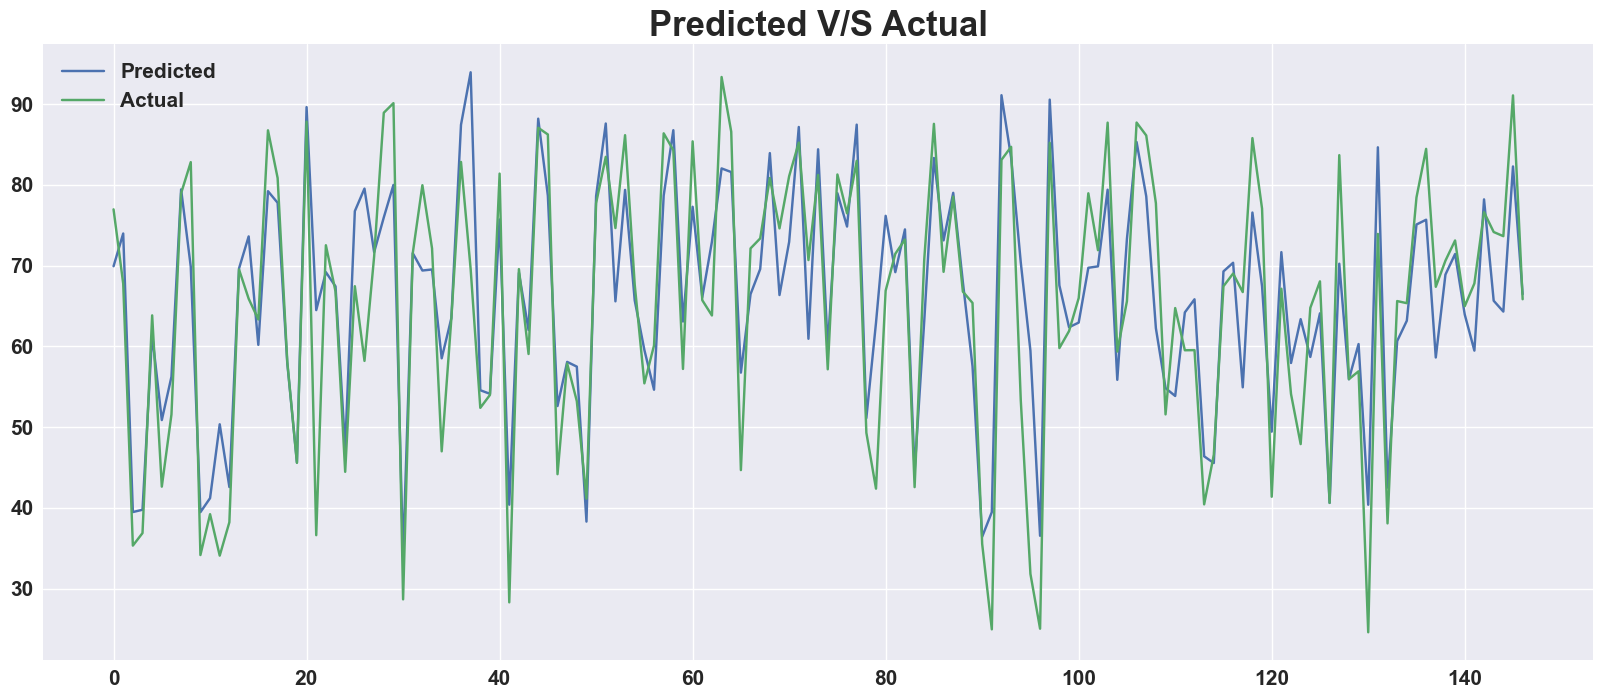

In [1283]:
plot_Pred_vs_actual(y_pred,y_test)

Text(0.5, 0, 'y_predicted')

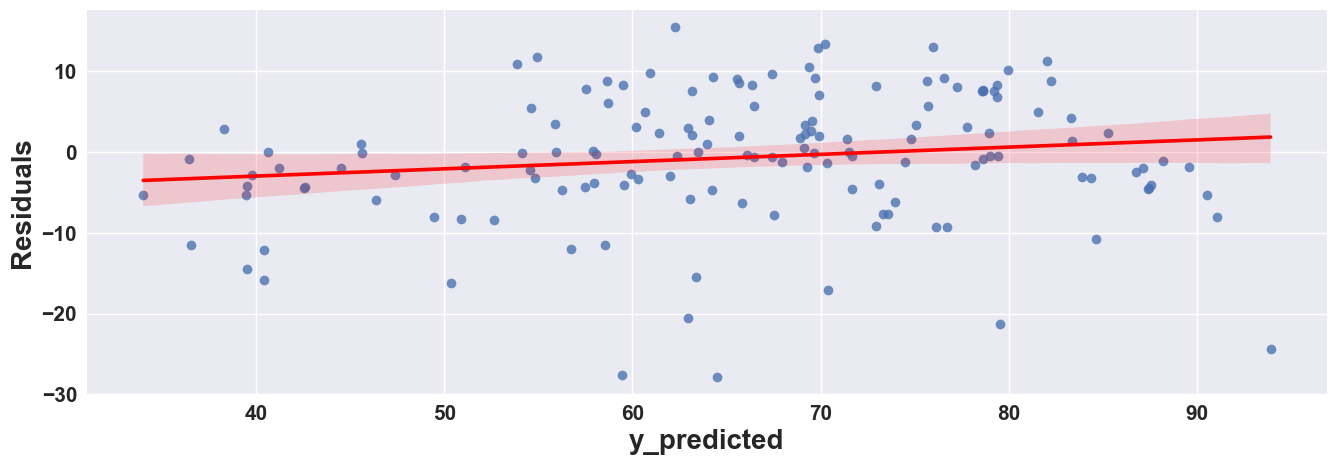

In [1284]:
plt.figure(figsize=(16,5))
sns.regplot(x = y_pred, y = y_test-y_pred,line_kws={'color':'red'})
plt.ylabel('Residuals')
plt.xlabel('y_predicted')

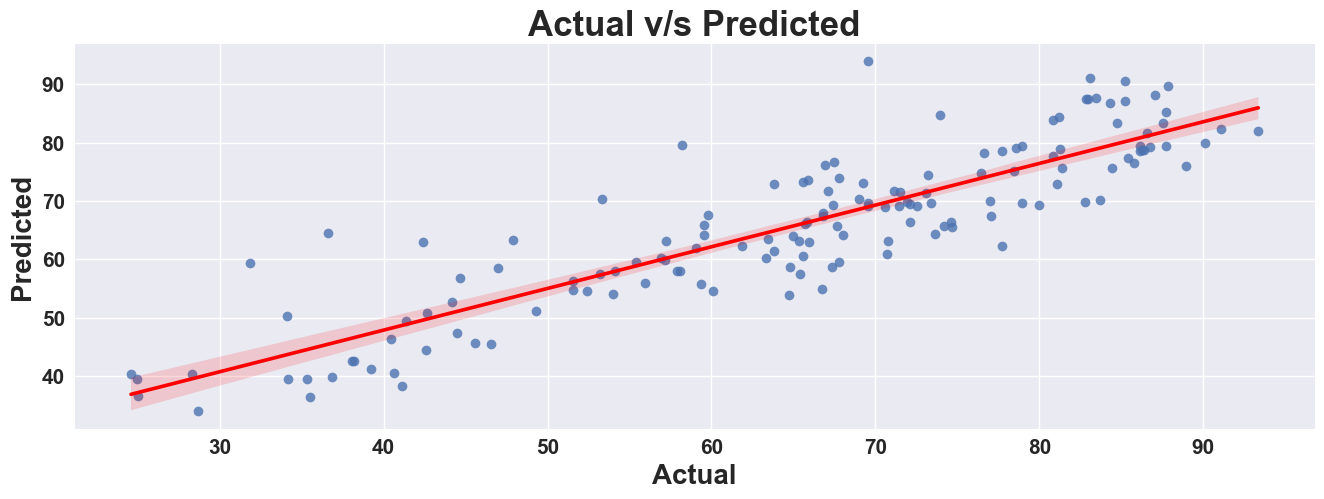

In [1285]:
plot_scatter(y_pred,y_test)

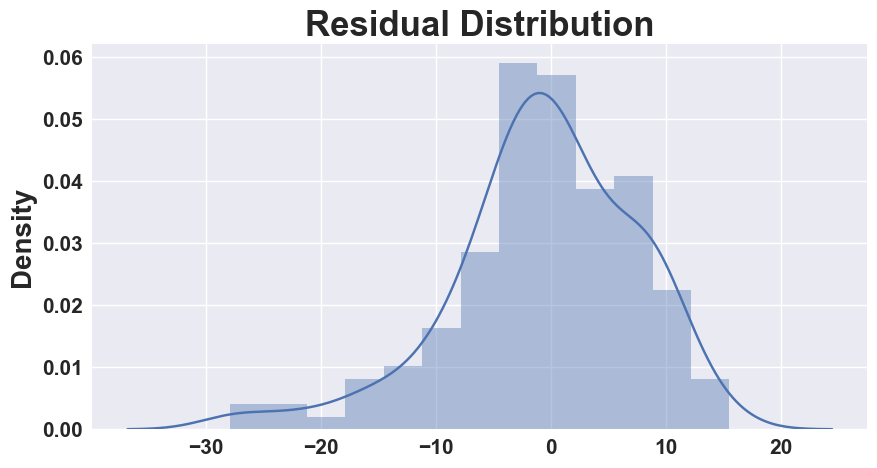

In [1286]:
Residual_distPlot(y_pred,y_test)

### Lasso

In [1287]:
lasso_reg = Lasso(alpha = 0.01)

In [1288]:
lasso_reg.fit(X_train,y_train)

Lasso(alpha=0.01)

In [1289]:
lasso_reg.coef_

array([ 15.01231359,   8.23074962,  -3.41323327,   2.91938392,
         1.0527383 , -12.60769965,  35.88423816,  -8.26093269])

In [1290]:
pd.DataFrame(lasso_reg.coef_,X.columns,columns=['Coeficients'])

Coeficients
yr            15.012314
mnth           8.230750
holiday       -3.413233
weekday        2.919384
workingday     1.052738
weathersit   -12.607700
temp          35.884238
windspeed     -8.260933

In [1291]:
lasso_reg.intercept_

np.float64(37.54539772620754)

In [1292]:
lasso_reg.score(X_train,y_train)

0.7527060037086467

In [1293]:
y_pred_train = lasso_reg.predict(X_train)
y_pred = lasso_reg.predict(X_test)

In [1294]:
MAE= mean_absolute_error(y_test,y_pred)
print(f" The Mean Absolute Error (MAE) is {MAE}.")

MSE=mean_squared_error(y_test,y_pred)
print(f" The Mean Squred Error(MSE) is {MSE}.")

RMSE=np.sqrt(MSE)
print(f"The Root Mean Squared Error(RMSE) is {RMSE}.")

R2=r2_score(y_test,y_pred)
print(f"The R2 Score is {R2}.")

adj_r2 = 1-(1-r2_score(y_test,y_pred))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1))
print(f"Adjusted R2 is {adj_r2}.")

 The Mean Absolute Error (MAE) is 6.057124349013211.
 The Mean Squred Error(MSE) is 65.35255893507409.
The Root Mean Squared Error(RMSE) is 8.084092956855091.
The R2 Score is 0.769930790091998.
Adjusted R2 is 0.7565934445900848.


In [1295]:
test_dict = {'Model':"Lasso",
              'MAE':round(MAE,4),
              'MSE':round(MSE,4),
              'RMSE':round(RMSE,4),
              'R2_score':round(R2,4),
              'Adjusted_R2':round(adj_r2,4)}

In [1296]:
import pandas as pd
test_results_df = pd.concat([test_results_df, pd.DataFrame([test_dict])], ignore_index=True)
test_results_df

Model     MAE      MSE    RMSE  R2_score  Adjusted_R2
0  Linear Regression  6.0361  65.0351  8.0644    0.7710       0.7578
1              Lasso  6.0571  65.3526  8.0841    0.7699       0.7566

In [1298]:
lasso_rg = Ridge()

alphas = {'alpha': [1e-15,1e-13,1e-10,1e-8,1e-5,1e-4,1e-3,1e-2,1e-1,1,5,10,20,30,40,45,50,55,60,100]}

lasso_linear_reg = GridSearchCV(lasso_rg, alphas, scoring='neg_mean_squared_error', cv=4)
 
lasso_linear_reg.fit(X_train, y_train)

GridSearchCV(cv=4, estimator=Ridge(),
             param_grid={'alpha': [1e-15, 1e-13, 1e-10, 1e-08, 1e-05, 0.0001,
                                   0.001, 0.01, 0.1, 1, 5, 10, 20, 30, 40, 45,
                                   50, 55, 60, 100]},
             scoring='neg_mean_squared_error')

In [1299]:
print(f'The best alpha value is {lasso_linear_reg.best_params_}')
print(f'The best negative mean squred error value is {lasso_linear_reg.best_score_}')

The best alpha value is {'alpha': 0.1}
The best negative mean squred error value is -63.54871673192977


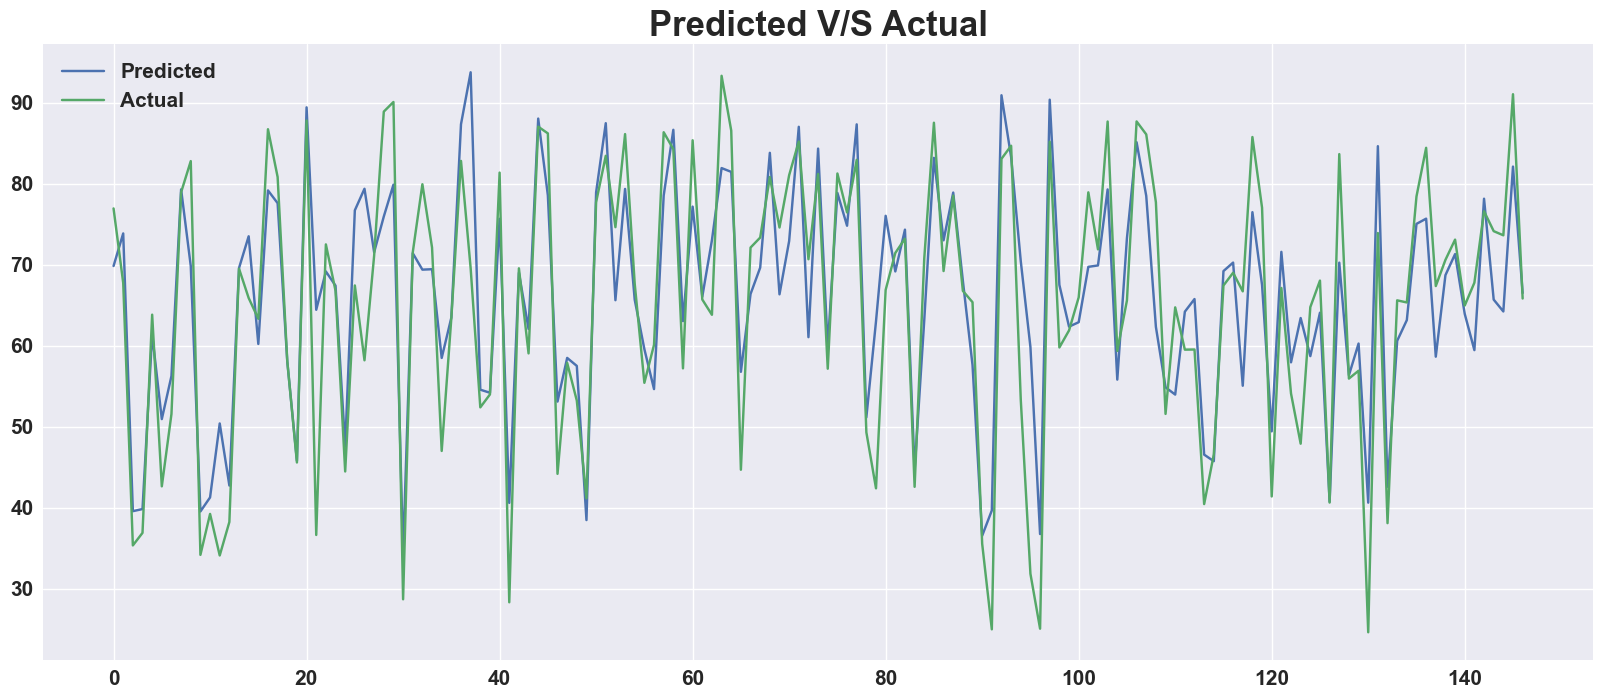

In [1300]:
plot_Pred_vs_actual(y_pred,y_test)

Text(0.5, 0, 'y_predicted')

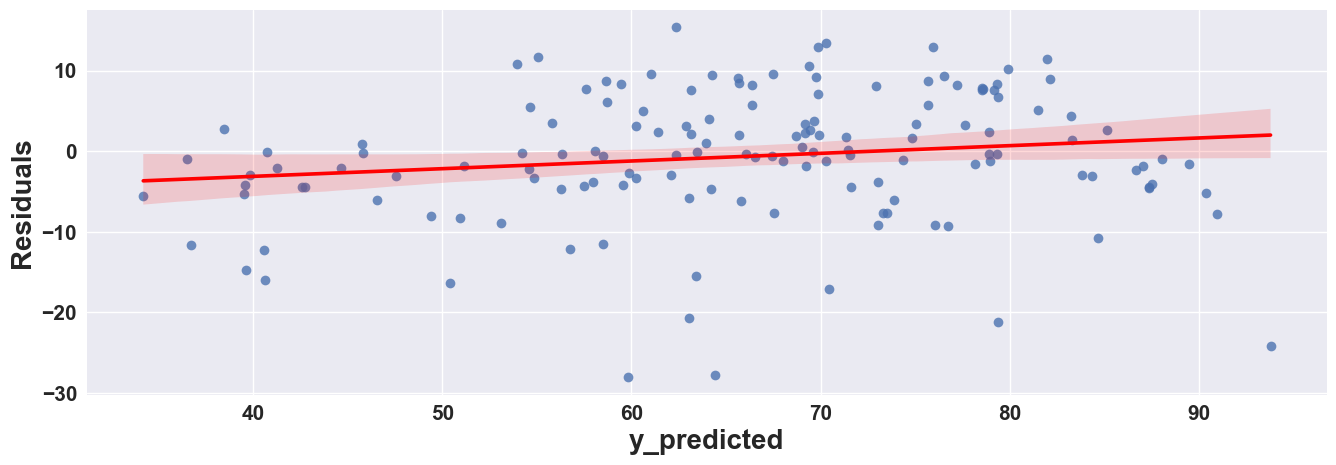

In [1301]:
plt.figure(figsize=(16,5))
sns.regplot(x = y_pred,y = y_test-y_pred,line_kws={'color':'red'})
plt.ylabel('Residuals')
plt.xlabel('y_predicted')

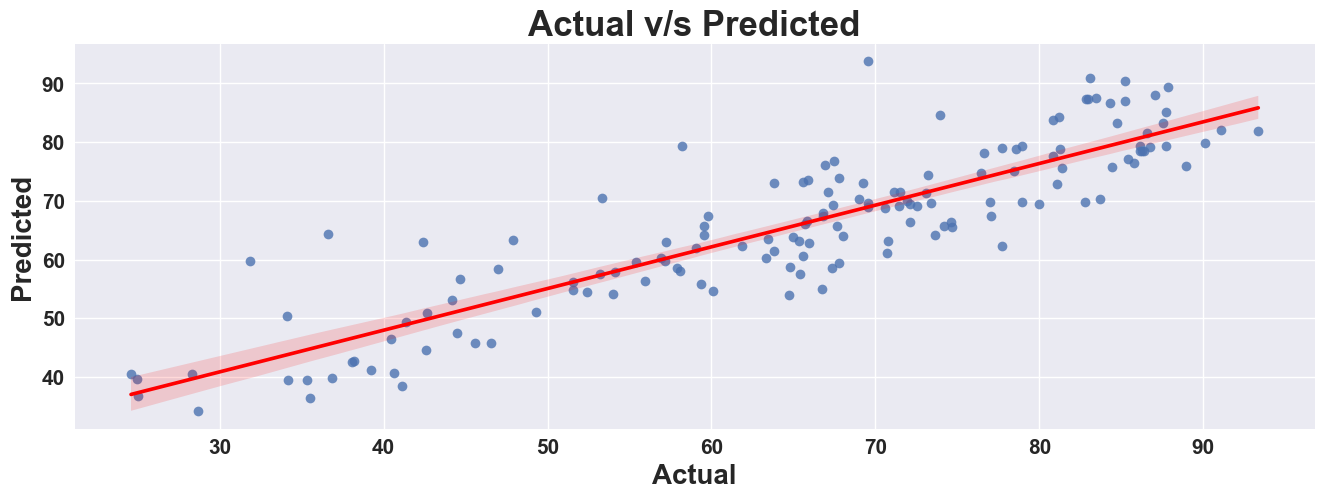

In [1302]:
plot_scatter(y_pred,y_test)

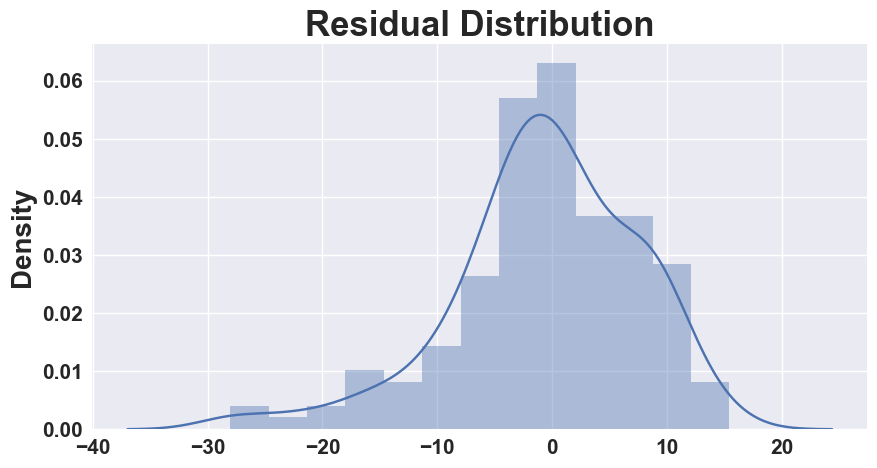

In [1304]:
Residual_distPlot(y_pred,y_test)

### Ridge

In [1305]:
ridge_reg = Ridge(alpha = 0.01)

In [1306]:
ridge_reg.fit(X_train,y_train)

Ridge(alpha=0.01)

In [1307]:
ridge_reg.coef_

array([ 15.0419158 ,   8.29963746,  -3.77082669,   3.00242917,
         1.07288877, -12.74499147,  35.98877427,  -8.46061418])

In [1308]:
pd.DataFrame(ridge_reg.coef_,X.columns,columns=['Coeficients'])

Coeficients
yr            15.041916
mnth           8.299637
holiday       -3.770827
weekday        3.002429
workingday     1.072889
weathersit   -12.744991
temp          35.988774
windspeed     -8.460614

In [1309]:
ridge_reg.intercept_

np.float64(37.4969968876004)

In [1310]:
ridge_reg.score(X_train,y_train)

0.752748612424166

In [1311]:
y_pred_train = ridge_reg.predict(X_train)
y_pred = ridge_reg.predict(X_test)


In [1312]:
MAE = mean_absolute_error(y_test,y_pred)
print(f" The Mean Absolute Error (MAE) is {MAE}.")

MSE = mean_squared_error(y_test,y_pred)
print(f" The Mean Squred Error(MSE) is {MSE}.")

RMSE = np.sqrt(MSE)
print(f"The Root Mean Squared Error(RMSE) is {RMSE}.")

R2 = r2_score(y_test,y_pred)
print(f"The R2 Score is {R2}.")

adj_r2 = 1-(1-r2_score(y_test,y_pred))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1))
print(f"Adjusted R2 is {adj_r2}.")

 The Mean Absolute Error (MAE) is 6.036160371555786.
 The Mean Squred Error(MSE) is 65.03942765662028.
The Root Mean Squared Error(RMSE) is 8.064702577071289.
The R2 Score is 0.7710331473218492.
Adjusted R2 is 0.757759706586884.


In [1313]:
test_dict = {'Model':"Ridge(GridsearchCv Tunned)",
              'MAE':round(MAE,4),
              'MSE':round(MSE,4),
              'RMSE':round(RMSE,4),
              'R2_score':round(R2,4),
              'Adjusted_R2':round(adj_r2,4)}

In [1314]:
import pandas as pd

test_results_df = pd.concat([test_results_df, pd.DataFrame([test_dict])], ignore_index=True)

test_results_df

Model     MAE      MSE    RMSE  R2_score  Adjusted_R2
0           Linear Regression  6.0361  65.0351  8.0644    0.7710       0.7578
1                       Lasso  6.0571  65.3526  8.0841    0.7699       0.7566
2  Ridge(GridsearchCv Tunned)  6.0362  65.0394  8.0647    0.7710       0.7578

In [1315]:
ridge_rg = Ridge()

alphas = {'alpha': [1e-15,1e-13,1e-10,1e-8,1e-5,1e-4,1e-3,1e-2,1e-1,1,5,10,20,30,40,45,50,55,60,100]}

ridge_linear_reg = GridSearchCV(ridge_rg, alphas, scoring='neg_mean_squared_error', cv=4)

ridge_linear_reg.fit(X_train, y_train)

GridSearchCV(cv=4, estimator=Ridge(),
             param_grid={'alpha': [1e-15, 1e-13, 1e-10, 1e-08, 1e-05, 0.0001,
                                   0.001, 0.01, 0.1, 1, 5, 10, 20, 30, 40, 45,
                                   50, 55, 60, 100]},
             scoring='neg_mean_squared_error')

In [1316]:
print(f'The best alpha value is {ridge_linear_reg.best_params_}')
print(f'The best negative mean squred error value is {ridge_linear_reg.best_score_}')

The best alpha value is {'alpha': 0.1}
The best negative mean squred error value is -63.54871673192977


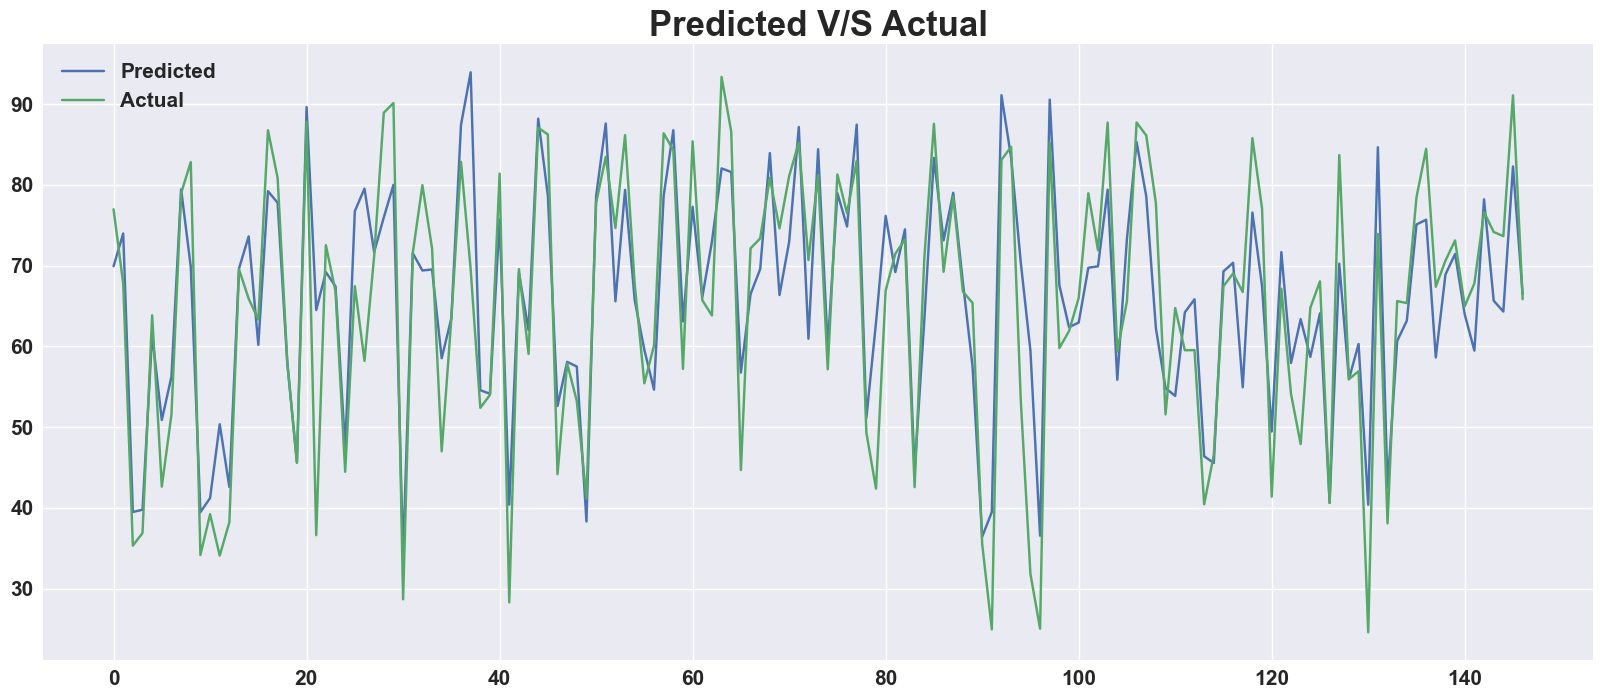

In [1317]:
plot_Pred_vs_actual(y_pred,y_test)

Text(0.5, 0, 'y_predicted')

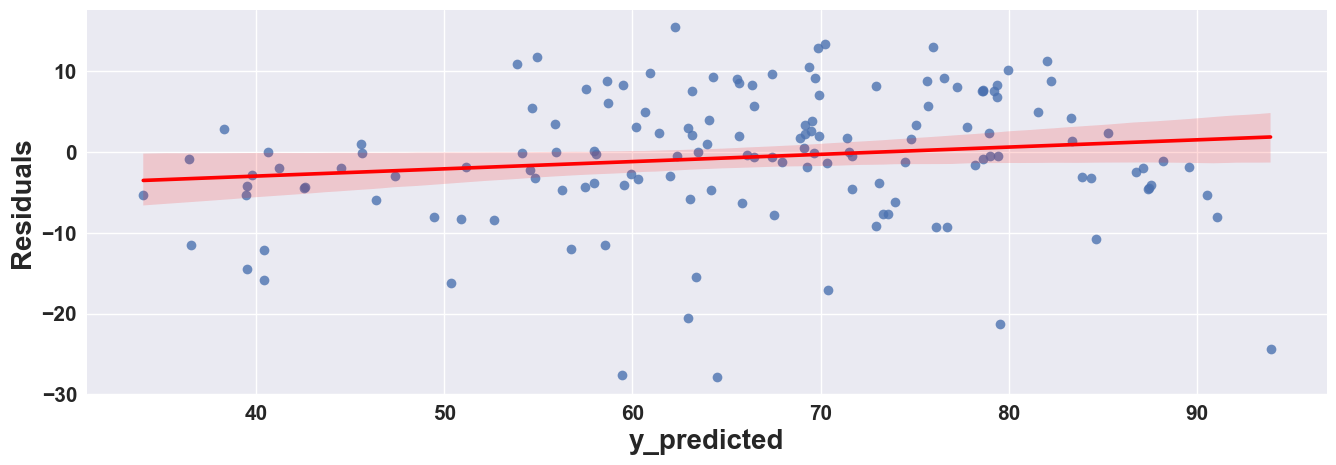

In [1318]:
plt.figure(figsize=(16,5))
sns.regplot(x=y_pred,y=y_test-y_pred,line_kws={'color':'red'})
plt.ylabel('Residuals')
plt.xlabel('y_predicted')

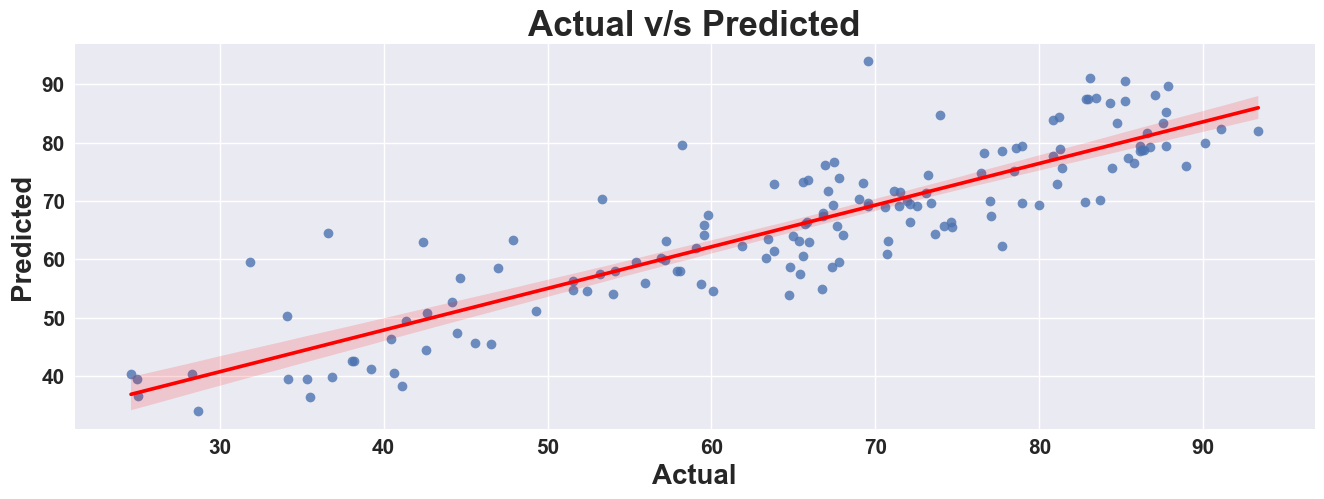

In [1319]:
plot_scatter(y_pred,y_test)

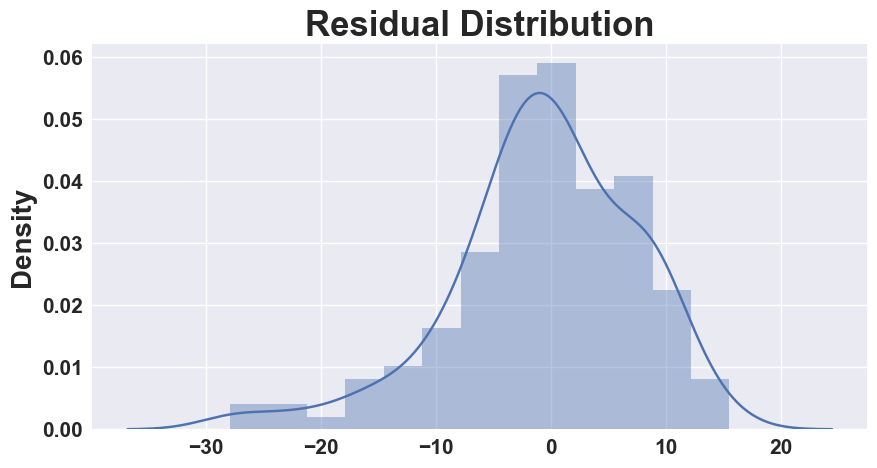

In [1320]:
Residual_distPlot(y_pred,y_test)

### Elastic Net

In [1321]:
elastic_net_reg = ElasticNet(alpha = 1e-05,l1_ratio = 0.3)
elastic_net_reg.fit(X_train,y_train)

ElasticNet(alpha=1e-05, l1_ratio=0.3)

In [1322]:
elastic_net_reg.score(X_test,y_test)

0.7710418524479541

In [1323]:
y_pred_train = elastic_net_reg.predict(X_train)
y_pred = elastic_net_reg.predict(X_test)

In [1324]:
# check score on test data
elastic_net_reg.score(X_test,y_test)

0.7710418524479541

In [1325]:
# Evaluation of Test data set

#Calculate Mean Absolute Error.
MAE= mean_absolute_error(y_test,y_pred)
print(f"The Mean Absolute Error (MAE) is {MAE}.")

#Calculate  Mean Squared Error
MSE=mean_squared_error(y_test,y_pred)
print(f"The Mean Squred Error(MSE) is {MSE}.")

#Calculate Root Mean Squared Error
RMSE=np.sqrt(MSE)
print(f"The Root Mean Squared Error(RMSE) is {RMSE}.")

#Calculate R2 Score
R2=r2_score(y_test,y_pred)
print(f"The R2 Score is {R2}.")

#Calculate adjusted R2 Score
adj_r2 = 1-(1-r2_score(y_test,y_pred))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1))
print(f"Adjusted R2 is {adj_r2}.")

The Mean Absolute Error (MAE) is 6.036152799097848.
The Mean Squred Error(MSE) is 65.03695491258367.
The Root Mean Squared Error(RMSE) is 8.064549269028225.
The R2 Score is 0.7710418524479541.
Adjusted R2 is 0.7577689163579804.


In [1326]:
test_dict = {'Model':"ElasticNet(GridSearchCV-Tunned)",
              'MAE':round(MAE,4),
              'MSE':round(MSE,4),
              'RMSE':round(RMSE,4),
              'R2_score':round(R2,4),
              'Adjusted_R2':round(adj_r2,4)}

In [1327]:
import pandas as pd

test_results_df = pd.concat([test_results_df, pd.DataFrame([test_dict])], ignore_index=True)

test_results_df

Model     MAE      MSE    RMSE  R2_score  \
0                Linear Regression  6.0361  65.0351  8.0644    0.7710   
1                            Lasso  6.0571  65.3526  8.0841    0.7699   
2       Ridge(GridsearchCv Tunned)  6.0362  65.0394  8.0647    0.7710   
3  ElasticNet(GridSearchCV-Tunned)  6.0362  65.0370  8.0645    0.7710   

   Adjusted_R2  
0       0.7578  
1       0.7566  
2       0.7578  
3       0.7578

In [1328]:
elastic = ElasticNet()
alpha_l1 = {'alpha': [1e-15,1e-13,1e-10,1e-8,1e-5,1e-4,1e-3,1e-2,1e-1,1,5,10,20,30,40,45,50,55,60,100],'l1_ratio':[0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]}
elastic_regressor = GridSearchCV(elastic, alpha_l1, scoring='neg_mean_squared_error',cv=4)
elastic_regressor.fit(X_train, y_train)

GridSearchCV(cv=4, estimator=ElasticNet(),
             param_grid={'alpha': [1e-15, 1e-13, 1e-10, 1e-08, 1e-05, 0.0001,
                                   0.001, 0.01, 0.1, 1, 5, 10, 20, 30, 40, 45,
                                   50, 55, 60, 100],
                         'l1_ratio': [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8,
                                      0.9]},
             scoring='neg_mean_squared_error')

In [1329]:
print(f'The best alpha value is {elastic_regressor.best_params_}')
print(f'The best negative mean squred error value is {elastic_regressor.best_score_}')

The best alpha value is {'alpha': 0.001, 'l1_ratio': 0.1}
The best negative mean squred error value is -63.531232071120066


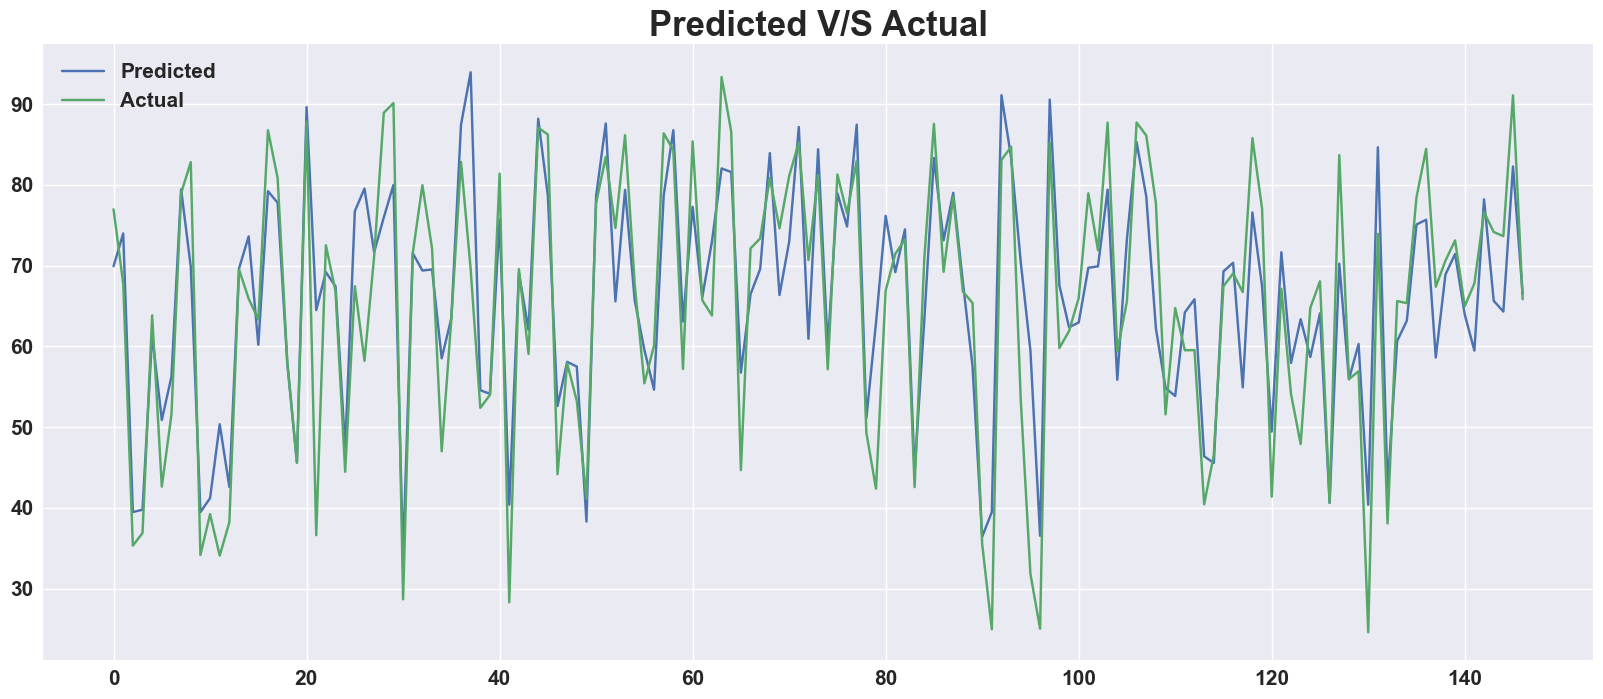

In [1330]:
plot_Pred_vs_actual(y_pred,y_test)

Text(0.5, 0, 'y_predicted')

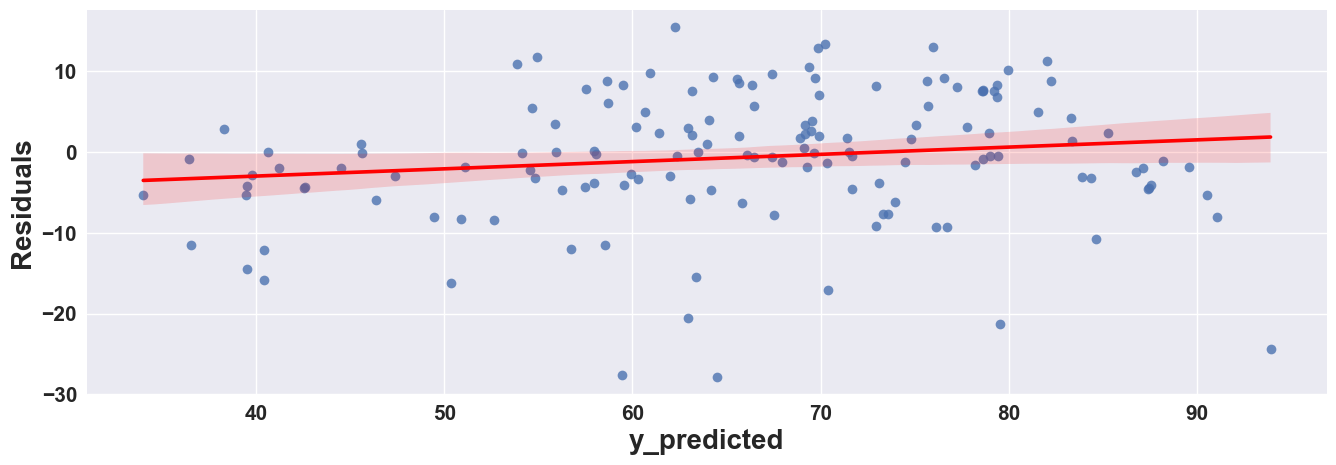

In [1331]:
plt.figure(figsize=(16,5))
sns.regplot(x=y_pred,y=y_test-y_pred,line_kws={'color':'red'})
plt.ylabel('Residuals')
plt.xlabel('y_predicted')

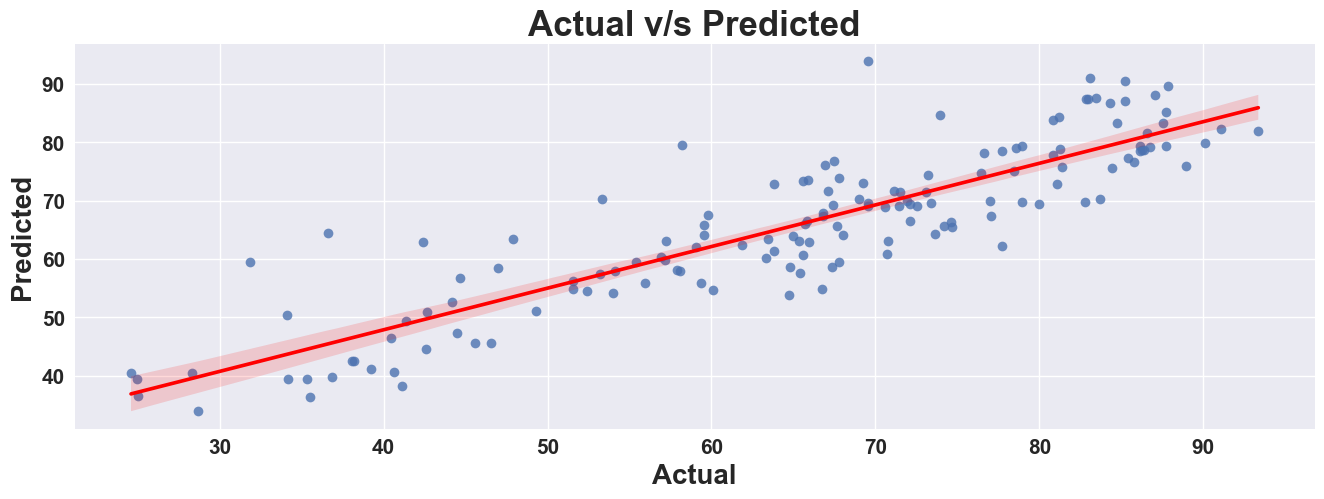

In [1332]:
plot_scatter(y_pred,y_test)

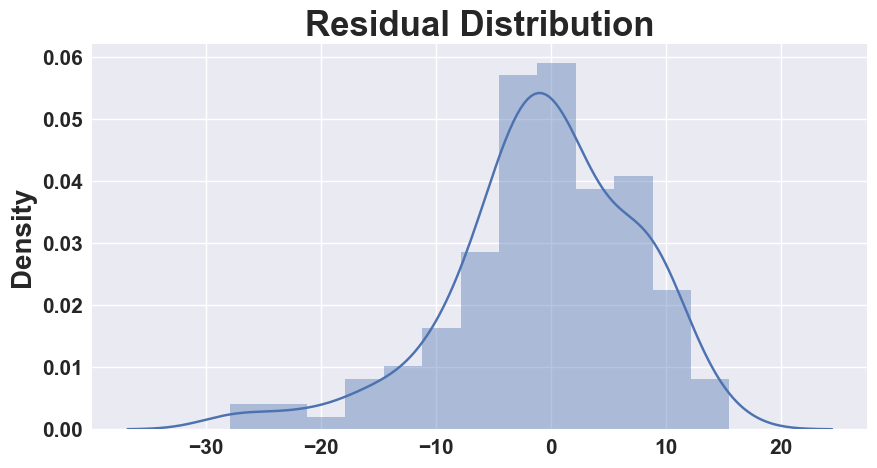

In [1333]:
Residual_distPlot(y_pred,y_test)

### Decision Tree Regressor


In [1334]:
from sklearn.tree import DecisionTreeRegressor

D_tree = DecisionTreeRegressor(max_depth=9, splitter='best', max_features=None)

D_tree.fit(X_train,y_train)

DecisionTreeRegressor(max_depth=9)

In [1335]:
D_tree.score(X_test,y_test)

0.8052489093618075

In [1336]:
y_pred_train = D_tree.predict(X_train)
y_pred = D_tree.predict(X_test)

In [1337]:
MAE = mean_absolute_error(y_test,y_pred)
print(f"The Mean Absolute Error (MAE) is {MAE}.")

MSE = mean_squared_error(y_test,y_pred)
print(f"The Mean Squred Error(MSE) is {MSE}.")

RMSE = np.sqrt(MSE)
print(f"The Root Mean Squared Error(RMSE) is {RMSE}.")

R2 = r2_score(y_test,y_pred)
print(f"The R2 Score is {R2}.")

adj_r2 = 1-(1-r2_score(y_test,y_pred))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1))
print(f"Adjusted R2 is {adj_r2}.")

The Mean Absolute Error (MAE) is 5.141325509464622.
The Mean Squred Error(MSE) is 55.32023226268211.
The Root Mean Squared Error(RMSE) is 7.437757206489206.
The R2 Score is 0.8052489093618075.
Adjusted R2 is 0.7939589910639413.


In [1338]:
test_dict = {'Model':"Decision Tree Regressor(GridsearchCV)",
              'MAE':round(MAE,4),
              'MSE':round(MSE,4),
              'RMSE':round(RMSE,4),
              'R2_score':round(R2,4),
              'Adjusted_R2':round(adj_r2,4)}

In [1339]:
import pandas as pd

test_results_df = pd.concat([test_results_df, pd.DataFrame([test_dict])], ignore_index=True)

test_results_df

Model     MAE      MSE    RMSE  R2_score  \
0                      Linear Regression  6.0361  65.0351  8.0644    0.7710   
1                                  Lasso  6.0571  65.3526  8.0841    0.7699   
2             Ridge(GridsearchCv Tunned)  6.0362  65.0394  8.0647    0.7710   
3        ElasticNet(GridSearchCV-Tunned)  6.0362  65.0370  8.0645    0.7710   
4  Decision Tree Regressor(GridsearchCV)  5.1413  55.3202  7.4378    0.8052   

   Adjusted_R2  
0       0.7578  
1       0.7566  
2       0.7578  
3       0.7578  
4       0.7940

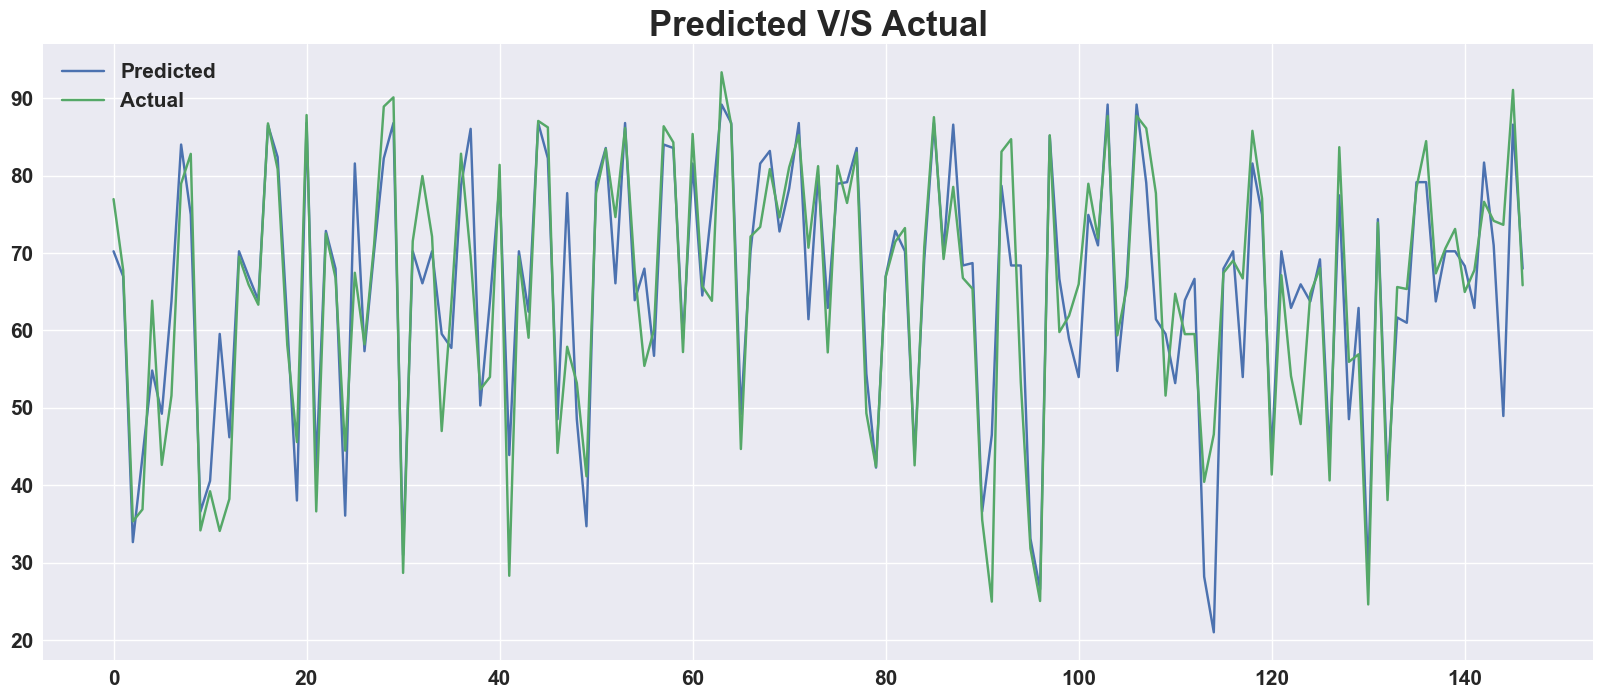

In [1340]:
plot_Pred_vs_actual(y_pred,y_test)

Text(0.5, 0, 'y_predicted')

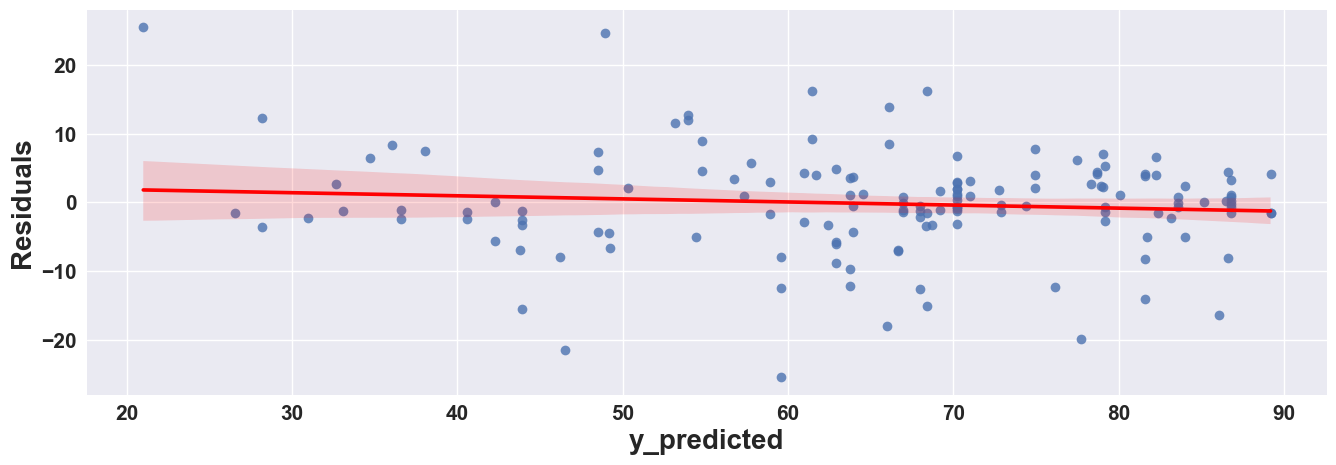

In [1341]:
plt.figure(figsize=(16,5))
sns.regplot(x=y_pred,y=y_test-y_pred,line_kws={'color':'red'})
plt.ylabel('Residuals')
plt.xlabel('y_predicted')

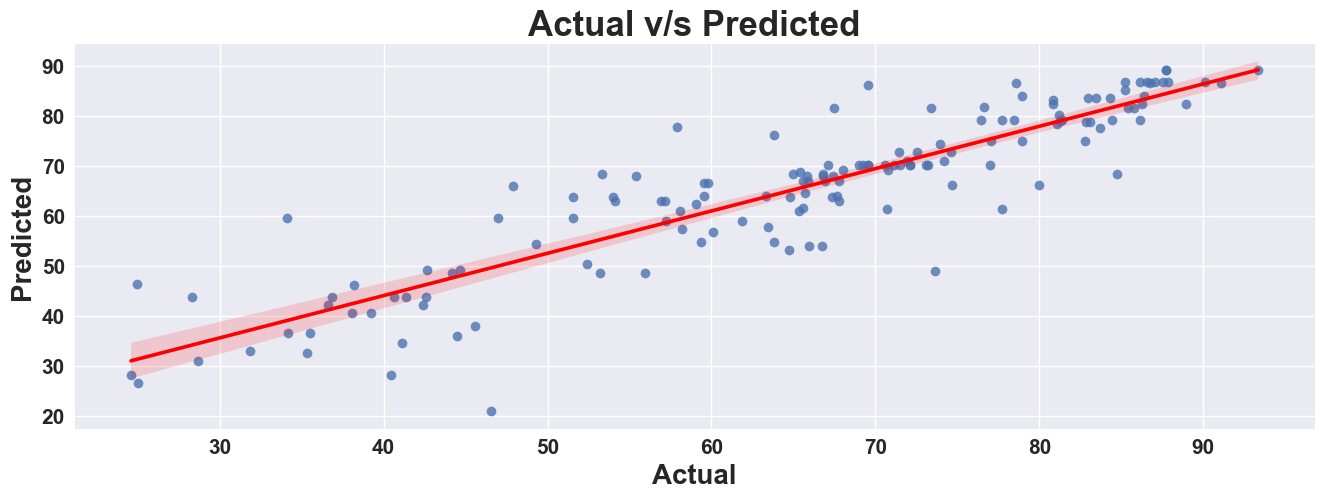

In [1342]:
plot_scatter(y_pred,y_test)

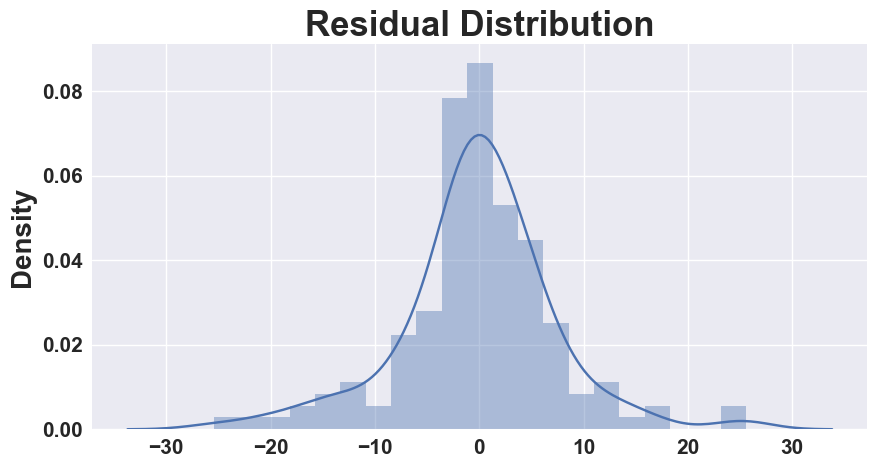

In [1343]:
Residual_distPlot(y_pred,y_test)

In [1347]:
# Hyper parameters range intialization for tuning 
tree = DecisionTreeRegressor()
parameters=parameters = parameters = {
    'criterion': ['squared_error', 'absolute_error'],  
    'max_depth': [5, 7, 9],
    'splitter': ['best', 'random'],
    'max_features': [None, 'sqrt', 'log2']
}


In [1348]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import GridSearchCV

tree = DecisionTreeRegressor(random_state=42)

tuning_model = GridSearchCV(
    estimator=tree,
    param_grid=parameters,
    scoring='neg_mean_squared_error',
    cv=3,
    verbose=1
)

tuning_model.fit(X_train, y_train)

Fitting 3 folds for each of 36 candidates, totalling 108 fits


GridSearchCV(cv=3, estimator=DecisionTreeRegressor(random_state=42),
             param_grid={'criterion': ['squared_error', 'absolute_error'],
                         'max_depth': [5, 7, 9],
                         'max_features': [None, 'sqrt', 'log2'],
                         'splitter': ['best', 'random']},
             scoring='neg_mean_squared_error', verbose=1)

In [1349]:
print(f'The best parameter is {tuning_model.best_params_}')
print(f'The best negative mean squred error value is {tuning_model.best_score_}')

The best parameter is {'criterion': 'squared_error', 'max_depth': 5, 'max_features': None, 'splitter': 'best'}
The best negative mean squred error value is -61.37685293087489


In [1350]:
from sklearn.tree import DecisionTreeRegressor

D_tree = DecisionTreeRegressor(max_depth=9, max_features=None, splitter='best', random_state=42)
D_tree.fit(X_train, y_train)

D_tree.fit(X_train,y_train)

DecisionTreeRegressor(max_depth=9, random_state=42)

Text(0.5, 0, 'Relative Importance')

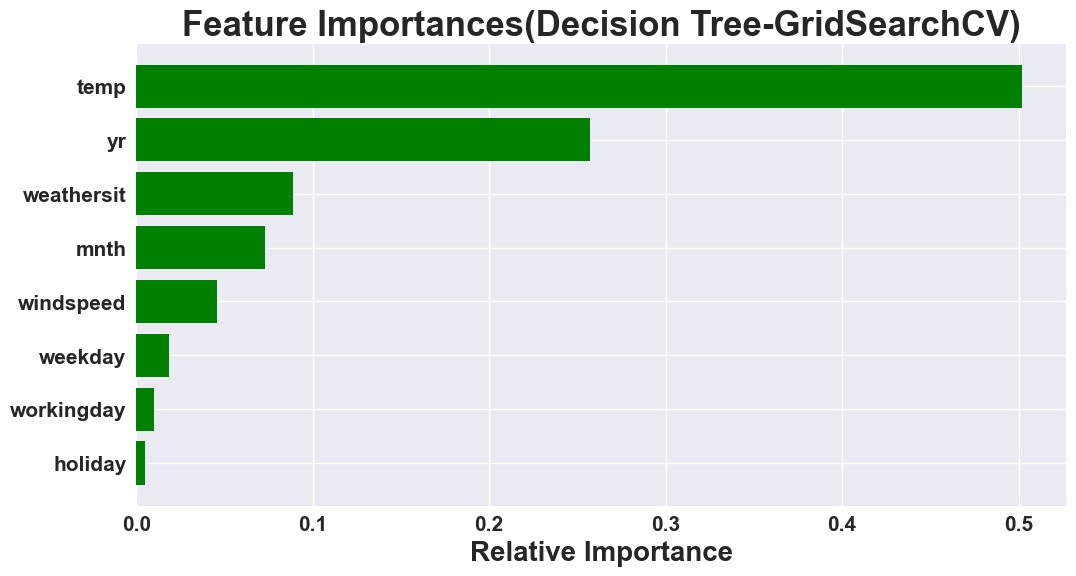

In [1351]:
imp_variables=X.columns
importances = D_tree.feature_importances_
indices = np.argsort(importances)
plt.figure(figsize=(12,6))
plt.title('Feature Importances(Decision Tree-GridSearchCV)')
plt.barh(range(len(indices)), importances[indices], color='g', align='center')
plt.yticks(range(len(indices)), imp_variables[indices])
plt.xlabel('Relative Importance')

### Random Forest Regressor

In [1352]:
rf = RandomForestRegressor()
rf.fit(X_train,y_train)

RandomForestRegressor()

In [1353]:
rf.score(X_test,y_test)

0.8469801078026857

In [1354]:
y_pred_train = rf.predict(X_train)
y_pred = rf.predict(X_test)

In [1355]:
MAE = mean_absolute_error(y_test,y_pred)
print(f"The Mean Absolute Error (MAE) is {MAE}.")

MSE = mean_squared_error(y_test,y_pred)
print(f"The Mean Squred Error(MSE) is {MSE}.")

RMSE = np.sqrt(MSE)
print(f"The Root Mean Squared Error(RMSE) is {RMSE}.")

R2 = r2_score(y_test,y_pred)
print(f"The R2 Score is {R2}.")

adj_r2 = 1-(1-r2_score(y_test,y_pred))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1))
print(f"Adjusted R2 is {adj_r2}.")

The Mean Absolute Error (MAE) is 4.551314344208623.
The Mean Squred Error(MSE) is 43.46623143123966.
The Root Mean Squared Error(RMSE) is 6.5928924935296545.
The R2 Score is 0.8469801078026857.
Adjusted R2 is 0.8381093894144356.


In [1356]:
test_dict = {'Model':"Random Forest Regressor",
              'MAE':round(MAE,4),
              'MSE':round(MSE,4),
              'RMSE':round(RMSE,4),
              'R2_score':round(R2,4),
              'Adjusted_R2':round(adj_r2,4)}

In [1357]:
import pandas as pd

test_results_df = pd.concat([test_results_df, pd.DataFrame([test_dict])], ignore_index=True)

test_results_df

Model     MAE      MSE    RMSE  R2_score  \
0                      Linear Regression  6.0361  65.0351  8.0644    0.7710   
1                                  Lasso  6.0571  65.3526  8.0841    0.7699   
2             Ridge(GridsearchCv Tunned)  6.0362  65.0394  8.0647    0.7710   
3        ElasticNet(GridSearchCV-Tunned)  6.0362  65.0370  8.0645    0.7710   
4  Decision Tree Regressor(GridsearchCV)  5.1413  55.3202  7.4378    0.8052   
5                Random Forest Regressor  4.5513  43.4662  6.5929    0.8470   

   Adjusted_R2  
0       0.7578  
1       0.7566  
2       0.7578  
3       0.7578  
4       0.7940  
5       0.8381

### GridSearchCV On Random Forest

In [1358]:
param = {'n_estimators':[25,50,40,80,100],'max_depth':[3,4,5,6,7,8,9]}

In [1359]:
rf_reg = RandomForestRegressor()
rf_tuning = GridSearchCV(rf_reg,param_grid=param,scoring='neg_mean_squared_error',cv=5)
rf_tuning.fit(X_train,y_train)

GridSearchCV(cv=5, estimator=RandomForestRegressor(),
             param_grid={'max_depth': [3, 4, 5, 6, 7, 8, 9],
                         'n_estimators': [25, 50, 40, 80, 100]},
             scoring='neg_mean_squared_error')

In [1360]:
print(f'The best parameter is {rf_tuning.best_params_}')
print(f'The best negative mean squred error value is {rf_tuning.best_score_}')

The best parameter is {'max_depth': 8, 'n_estimators': 100}
The best negative mean squred error value is -45.57476826531705


In [1361]:
rf_rg = RandomForestRegressor(max_depth= 9, n_estimators= 80)
rf_rg.fit(X_train,y_train)

RandomForestRegressor(max_depth=9, n_estimators=80)

In [1362]:
rf_rg.score(X_test,y_test)

0.8518664792420114

In [1363]:
y_pred_train = rf_rg.predict(X_train)
y_pred = rf_rg.predict(X_test)

In [1364]:
MAE = mean_absolute_error(y_test,y_pred)
print(f"The Mean Absolute Error (MAE) is {MAE}.")

MSE = mean_squared_error(y_test,y_pred)
print(f"The Mean Squred Error(MSE) is {MSE}.")

RMSE = np.sqrt(MSE)
print(f"The Root Mean Squared Error(RMSE) is {RMSE}.")

R2 = r2_score(y_test,y_pred)
print(f"The R2 Score is {R2}.")

adj_r2 = 1-(1-r2_score(y_test,y_pred))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1))
print(f"Adjusted R2 is {adj_r2}.")

The Mean Absolute Error (MAE) is 4.501931355915153.
The Mean Squred Error(MSE) is 42.0782278926745.
The Root Mean Squared Error(RMSE) is 6.486773303629047.
The R2 Score is 0.8518664792420114.
Adjusted R2 is 0.8432790287632874.


In [1365]:
test_dict = {'Model':"Random Forest Regressor(GridsearchCV)",
              'MAE':round(MAE,4),
              'MSE':round(MSE,4),
              'RMSE':round(RMSE,4),
              'R2_score':round(R2,4),
              'Adjusted_R2':round(adj_r2,4)}

In [1366]:
import pandas as pd

test_results_df = pd.concat([test_results_df, pd.DataFrame([test_dict])], ignore_index=True)

test_results_df

Model     MAE      MSE    RMSE  R2_score  \
0                      Linear Regression  6.0361  65.0351  8.0644    0.7710   
1                                  Lasso  6.0571  65.3526  8.0841    0.7699   
2             Ridge(GridsearchCv Tunned)  6.0362  65.0394  8.0647    0.7710   
3        ElasticNet(GridSearchCV-Tunned)  6.0362  65.0370  8.0645    0.7710   
4  Decision Tree Regressor(GridsearchCV)  5.1413  55.3202  7.4378    0.8052   
5                Random Forest Regressor  4.5513  43.4662  6.5929    0.8470   
6  Random Forest Regressor(GridsearchCV)  4.5019  42.0782  6.4868    0.8519   

   Adjusted_R2  
0       0.7578  
1       0.7566  
2       0.7578  
3       0.7578  
4       0.7940  
5       0.8381  
6       0.8433

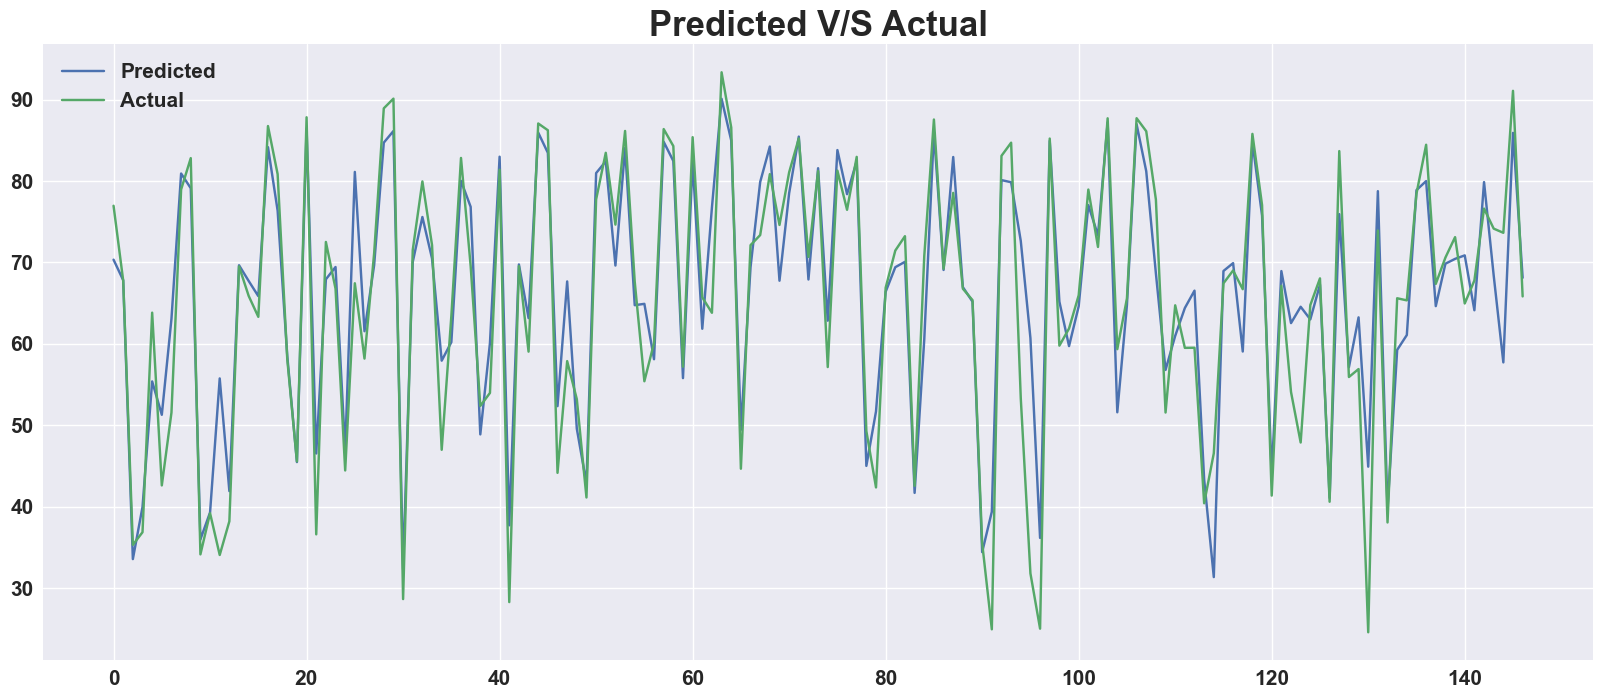

In [1367]:
plot_Pred_vs_actual(y_pred,y_test)

Text(0.5, 0, 'y_predicted')

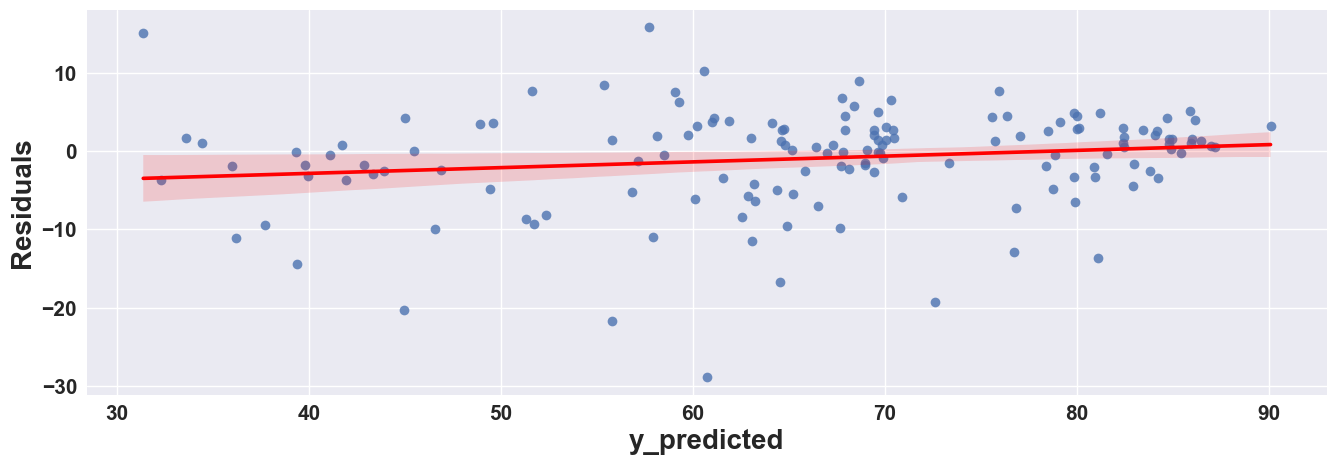

In [1368]:
plt.figure(figsize=(16,5))
sns.regplot(x=y_pred,y=y_test-y_pred,line_kws={'color':'red'})
plt.ylabel('Residuals')
plt.xlabel('y_predicted')

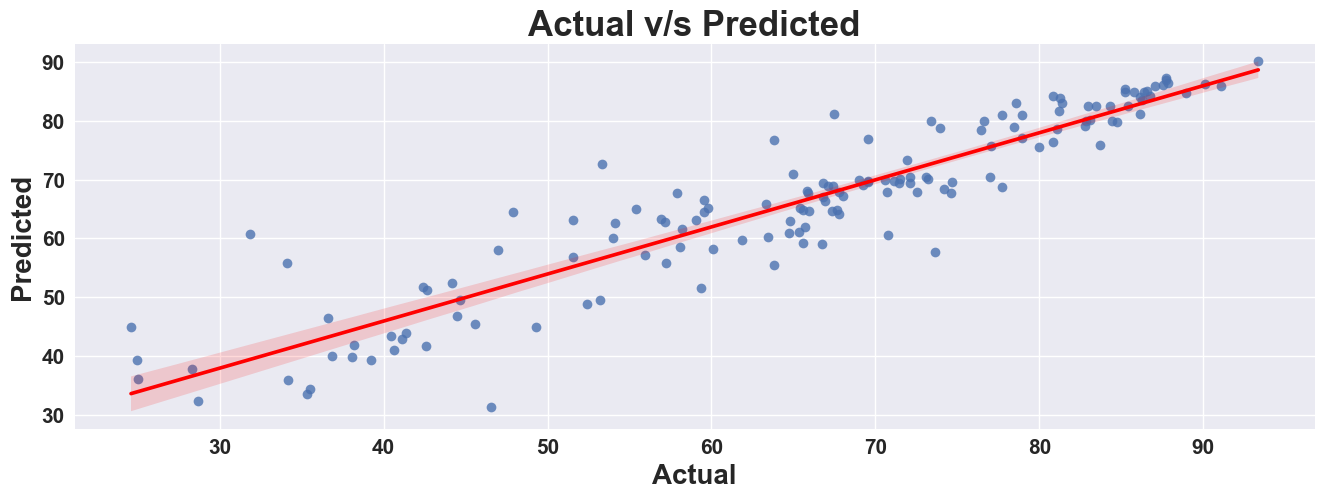

In [1369]:
plot_scatter(y_pred,y_test)

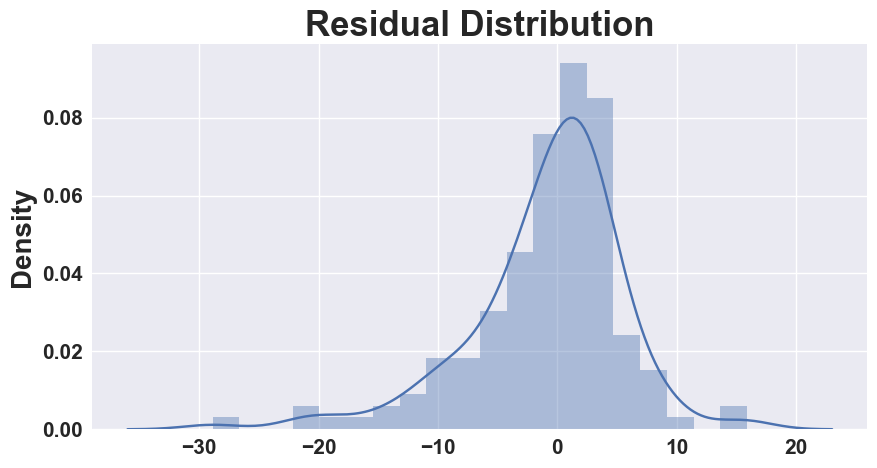

In [1370]:
Residual_distPlot(y_pred,y_test)

Text(0.5, 0, 'Relative Importance')

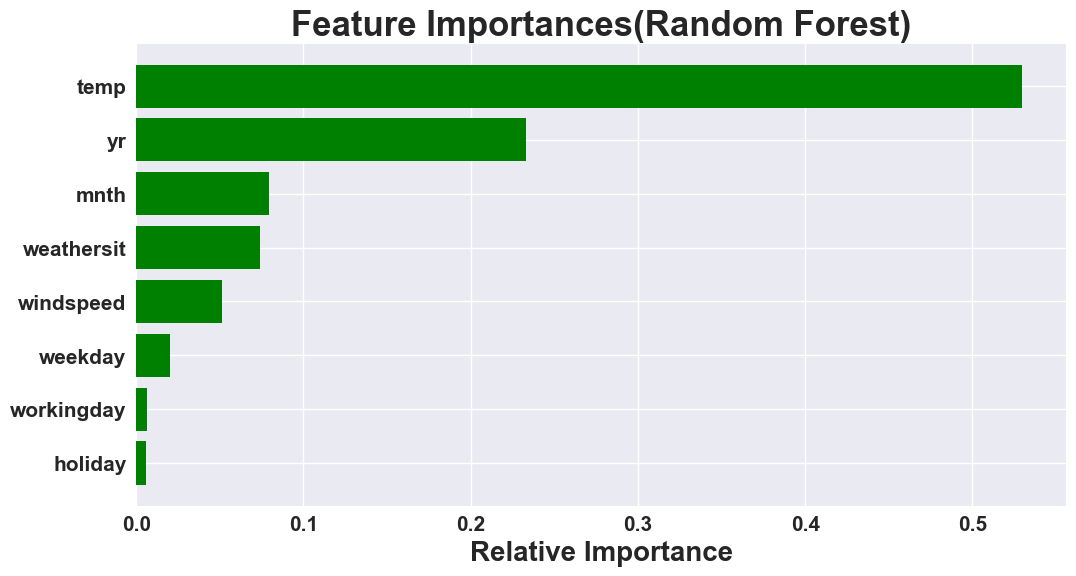

In [1371]:
imp_variables=X.columns
importances = rf.feature_importances_
indices = np.argsort(importances)
plt.figure(figsize=(12,6))
plt.title('Feature Importances(Random Forest)')
plt.barh(range(len(indices)), importances[indices], color='g', align='center')
plt.yticks(range(len(indices)), imp_variables[indices])
plt.xlabel('Relative Importance')

### Gradient Boosting

In [1372]:
gradboo_reg = GradientBoostingRegressor()
gradboo_reg.fit(X_train,y_train)

GradientBoostingRegressor()

In [1373]:
gradboo_reg.score(X_test,y_test)

0.8423828277416645

In [1374]:
y_pred_train = gradboo_reg.predict(X_train)
y_pred = gradboo_reg.predict(X_test)

In [1375]:
MAE = mean_absolute_error(y_test,y_pred)
print(f"The Mean Absolute Error (MAE) is {MAE}.")

MSE = mean_squared_error(y_test,y_pred)
print(f"The Mean Squred Error(MSE) is {MSE}.")

RMSE = np.sqrt(MSE)
print(f"The Root Mean Squared Error(RMSE) is {RMSE}.")

R2 = r2_score(y_test,y_pred)
print(f"The R2 Score is {R2}.")

adj_r2 = 1-(1-r2_score(y_test,y_pred))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1))
print(f"Adjusted R2 is {adj_r2}.")

The Mean Absolute Error (MAE) is 4.741443656969836.
The Mean Squred Error(MSE) is 44.77211680481514.
The Root Mean Squared Error(RMSE) is 6.691196963534637.
The R2 Score is 0.8423828277416645.
Adjusted R2 is 0.8332456003643697.


In [1376]:
test_dict = {'Model':"Gardient boosting Regression",
              'MAE':round(MAE,4),
              'MSE':round(MSE,4),
              'RMSE':round(RMSE,4),
              'R2_score':round(R2,4),
              'Adjusted_R2':round(adj_r2,4)}

In [1377]:
import pandas as pd

test_results_df = pd.concat([test_results_df, pd.DataFrame([test_dict])], ignore_index=True)

test_results_df


Model     MAE      MSE    RMSE  R2_score  \
0                      Linear Regression  6.0361  65.0351  8.0644    0.7710   
1                                  Lasso  6.0571  65.3526  8.0841    0.7699   
2             Ridge(GridsearchCv Tunned)  6.0362  65.0394  8.0647    0.7710   
3        ElasticNet(GridSearchCV-Tunned)  6.0362  65.0370  8.0645    0.7710   
4  Decision Tree Regressor(GridsearchCV)  5.1413  55.3202  7.4378    0.8052   
5                Random Forest Regressor  4.5513  43.4662  6.5929    0.8470   
6  Random Forest Regressor(GridsearchCV)  4.5019  42.0782  6.4868    0.8519   
7           Gardient boosting Regression  4.7414  44.7721  6.6912    0.8424   

   Adjusted_R2  
0       0.7578  
1       0.7566  
2       0.7578  
3       0.7578  
4       0.7940  
5       0.8381  
6       0.8433  
7       0.8332

### GridSearchCV on Gradient Boosting Regressor

In [1378]:
gbr = GradientBoostingRegressor()

In [1379]:
parameters = {'learning_rate': [0.01,0.02,0.03,0.04],
              'subsample'    : [0.9, 0.5, 0.2, 0.1],
              'n_estimators' : [50,80,100,150],
               'max_depth'    : [4,6,8,10]}

In [1380]:
grad_boo_tuning = GridSearchCV(gbr,param_grid=parameters,cv=4,n_jobs=1)
grad_boo_tuning.fit(X_train,y_train)

GridSearchCV(cv=4, estimator=GradientBoostingRegressor(), n_jobs=1,
             param_grid={'learning_rate': [0.01, 0.02, 0.03, 0.04],
                         'max_depth': [4, 6, 8, 10],
                         'n_estimators': [50, 80, 100, 150],
                         'subsample': [0.9, 0.5, 0.2, 0.1]})

In [1381]:
print(f'The best parameter is {grad_boo_tuning.best_params_}')
print(f'The best negative mean squred error value is {grad_boo_tuning.best_score_}')

The best parameter is {'learning_rate': 0.03, 'max_depth': 8, 'n_estimators': 150, 'subsample': 0.2}
The best negative mean squred error value is 0.8383734254100723


In [1382]:
grad_tuned = GradientBoostingRegressor(learning_rate=0.04,max_depth=10,n_estimators=150,subsample=0.5)
grad_tuned.fit(X_train,y_train)

GradientBoostingRegressor(learning_rate=0.04, max_depth=10, n_estimators=150,
                          subsample=0.5)

In [1383]:
grad_tuned.score(X_test,y_test)

0.8496004141354127

In [1384]:
y_pred_train = grad_tuned.predict(X_train)
y_pred = grad_tuned.predict(X_test)

In [1385]:
MAE = mean_absolute_error(y_test,y_pred)
print(f"The Mean Absolute Error (MAE) is {MAE}.")

MSE = mean_squared_error(y_test,y_pred)
print(f"The Mean Squred Error(MSE) is {MSE}.")

RMSE = np.sqrt(MSE)
print(f"The Root Mean Squared Error(RMSE) is {RMSE}.")

R2 = r2_score(y_test,y_pred)
print(f"The R2 Score is {R2}.")

adj_r2 = 1-(1-r2_score(y_test,y_pred))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1))
print(f"Adjusted R2 is {adj_r2}.")

The Mean Absolute Error (MAE) is 4.566225271614191.
The Mean Squred Error(MSE) is 42.7219174741223.
The Root Mean Squared Error(RMSE) is 6.536200538089563.
The R2 Score is 0.8496004141354127.
Adjusted R2 is 0.8408815975635525.


In [1386]:
test_dict = {'Model':"Gradient Boosting Regression(GridSearchCV)",
              'MAE':round(MAE,4),
              'MSE':round(MSE,4),
              'RMSE':round(RMSE,4),
              'R2_score':round(R2,4),
              'Adjusted_R2':round(adj_r2,4)}

In [1387]:
import pandas as pd

test_results_df = pd.concat([test_results_df, pd.DataFrame([test_dict])], ignore_index=True)

test_results_df


Model     MAE      MSE    RMSE  \
0                           Linear Regression  6.0361  65.0351  8.0644   
1                                       Lasso  6.0571  65.3526  8.0841   
2                  Ridge(GridsearchCv Tunned)  6.0362  65.0394  8.0647   
3             ElasticNet(GridSearchCV-Tunned)  6.0362  65.0370  8.0645   
4       Decision Tree Regressor(GridsearchCV)  5.1413  55.3202  7.4378   
5                     Random Forest Regressor  4.5513  43.4662  6.5929   
6       Random Forest Regressor(GridsearchCV)  4.5019  42.0782  6.4868   
7                Gardient boosting Regression  4.7414  44.7721  6.6912   
8  Gradient Boosting Regression(GridSearchCV)  4.5662  42.7219  6.5362   

   R2_score  Adjusted_R2  
0    0.7710       0.7578  
1    0.7699       0.7566  
2    0.7710       0.7578  
3    0.7710       0.7578  
4    0.8052       0.7940  
5    0.8470       0.8381  
6    0.8519       0.8433  
7    0.8424       0.8332  
8    0.8496       0.8409

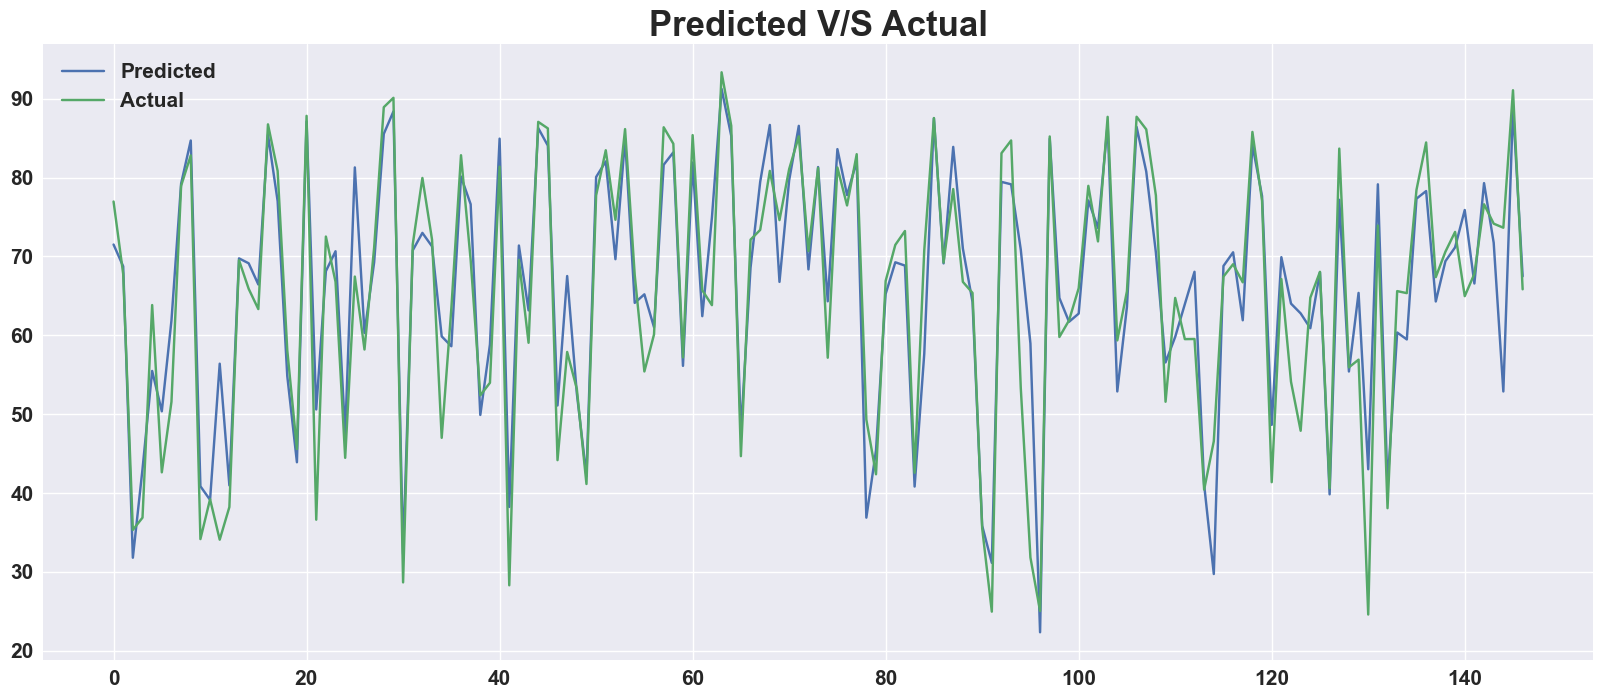

In [1388]:
plot_Pred_vs_actual(y_pred,y_test)

Text(0.5, 0, 'y_predicted')

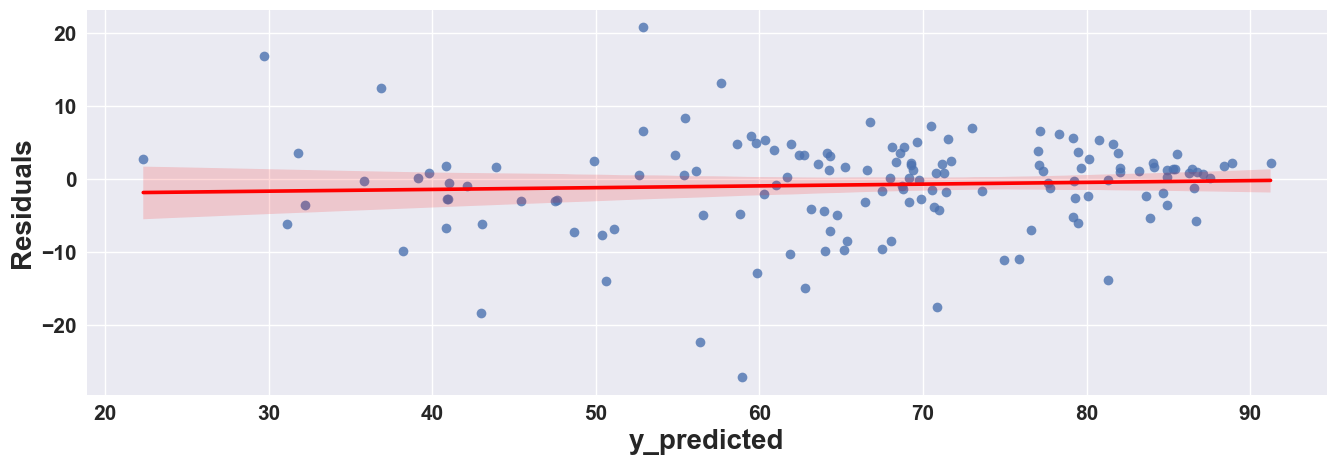

In [1389]:
plt.figure(figsize=(16,5))
sns.regplot(x=y_pred,y=y_test-y_pred,line_kws={'color':'red'})
plt.ylabel('Residuals')
plt.xlabel('y_predicted')

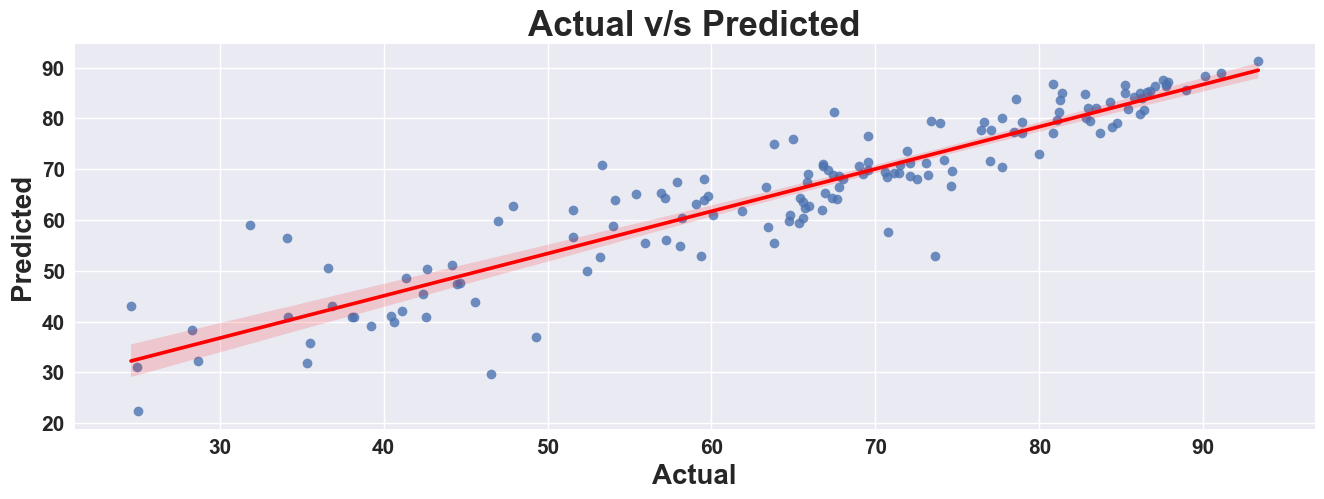

In [1390]:
plot_scatter(y_pred,y_test)

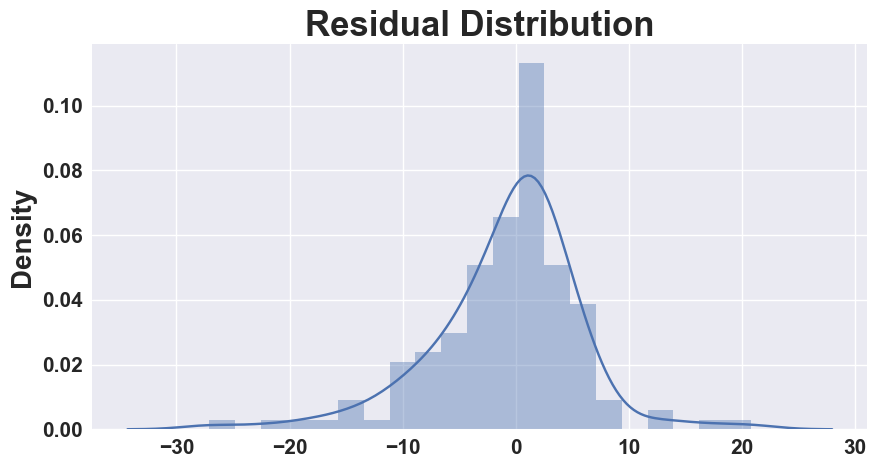

In [1391]:
Residual_distPlot(y_pred,y_test)

Text(0.5, 0, 'Relative Importance')

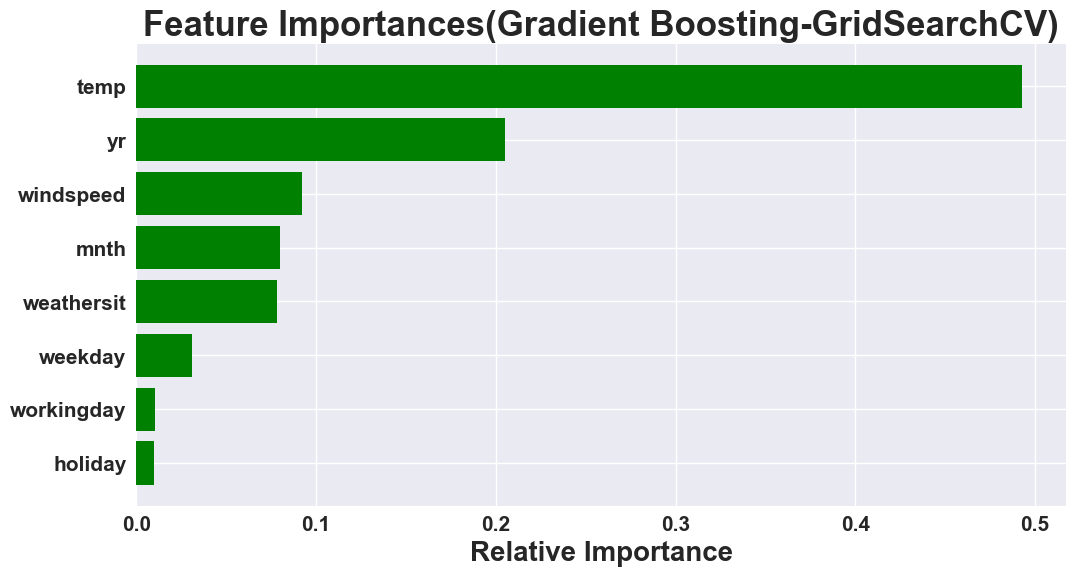

In [1392]:
imp_variables=X.columns
importances = grad_tuned.feature_importances_
indices = np.argsort(importances)
plt.figure(figsize=(12,6))
plt.title('Feature Importances(Gradient Boosting-GridSearchCV)')
plt.barh(range(len(indices)), importances[indices], color='g', align='center')
plt.yticks(range(len(indices)), imp_variables[indices])
plt.xlabel('Relative Importance')

# Conclusion
* As we have calculated MAE, MSE, RMS, R2_Score and  Adjusted_R2 score for each model. Based on Adjusted_R2 score will decide our model performance. 

## Linear,Lasso,Ridge and ElasticNet :-

* From The above data frame, we can see that linear, Lasso, Ridge  and Elasticnet regression models have almost similar Adjusted_R2 scores 75% (approx) on test data.(Even after using GridserachCV we have got similar results as of base models).
 
 ## Decision Tree Regressor :-

* After hyperparameter tuning we got Adjusted_R2 score as 79% (approx) on test data .

## Random Forest :-

* On Random Forest regressor model, without hyperparameter tuning we got Adjusted_R2 as 83% (approx) on test data .
* After hyperparameter tuning we got Adjusted_R2 score as 84% (approx) on test data .

## Gradient Boosting Regression(Gradient Boosting Machine):

* On Gradient boosting regressor model, without hyperparameter tuning we got Adjusted_R2 as 83% (approx) on test data . 
* After hyperparameter tuning we got Adjusted_R2 score as 84% (approx) on test data,thus we improved the model performance by hyperparameter tuning.

### Thus Gradient Boosting Regression(GridSearchCV) and Random forest(gridSearchCv) gives good Adjusted_R2 scores. We can deploy this models.


## In terms of features, Temperature and Year plays very important role in following 3 models. Other features importances are different in 3 models.

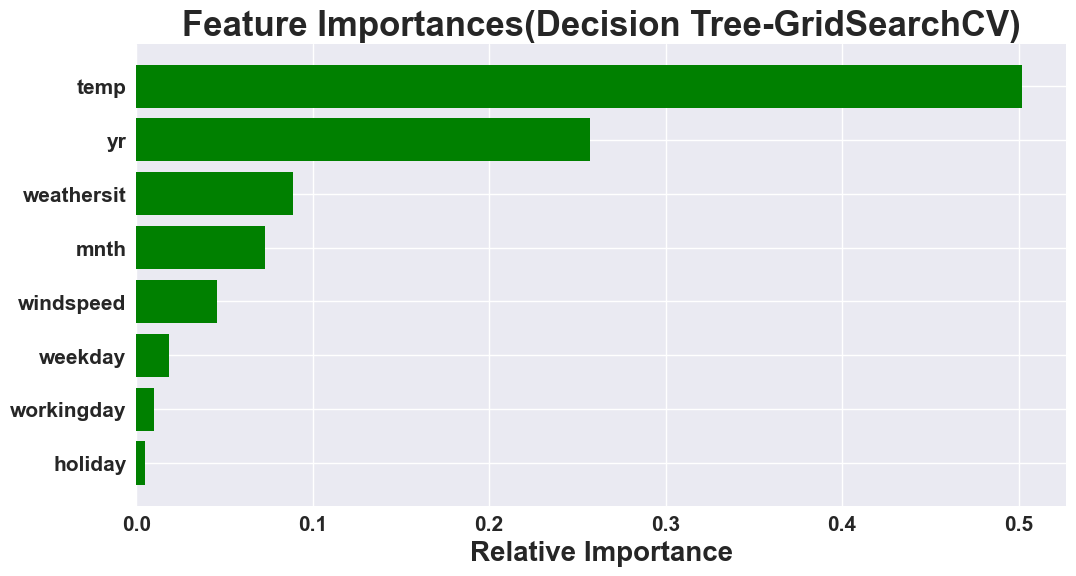

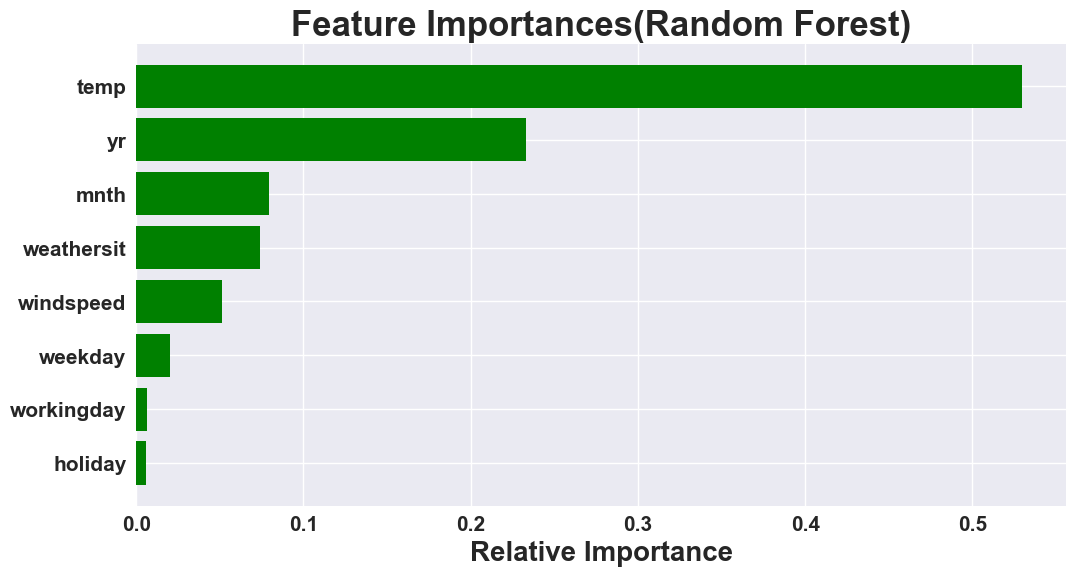

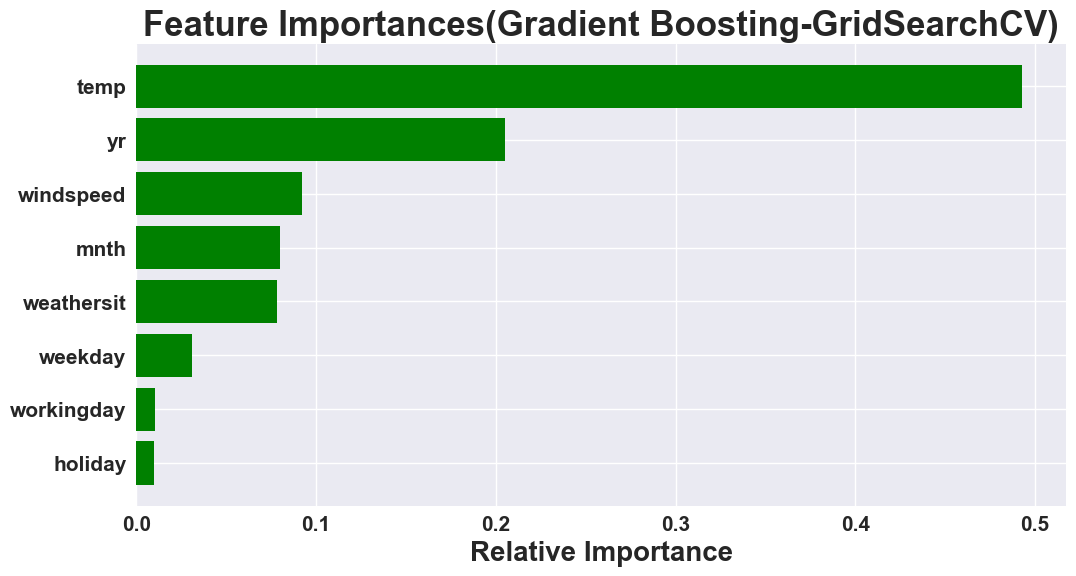

### Final Comaparison : -

In [1393]:
import pandas as pd

test_results_df = pd.concat([test_results_df, pd.DataFrame([test_dict])], ignore_index=True)

test_results_df

Model     MAE      MSE    RMSE  \
0                           Linear Regression  6.0361  65.0351  8.0644   
1                                       Lasso  6.0571  65.3526  8.0841   
2                  Ridge(GridsearchCv Tunned)  6.0362  65.0394  8.0647   
3             ElasticNet(GridSearchCV-Tunned)  6.0362  65.0370  8.0645   
4       Decision Tree Regressor(GridsearchCV)  5.1413  55.3202  7.4378   
5                     Random Forest Regressor  4.5513  43.4662  6.5929   
6       Random Forest Regressor(GridsearchCV)  4.5019  42.0782  6.4868   
7                Gardient boosting Regression  4.7414  44.7721  6.6912   
8  Gradient Boosting Regression(GridSearchCV)  4.5662  42.7219  6.5362   
9  Gradient Boosting Regression(GridSearchCV)  4.5662  42.7219  6.5362   

   R2_score  Adjusted_R2  
0    0.7710       0.7578  
1    0.7699       0.7566  
2    0.7710       0.7578  
3    0.7710       0.7578  
4    0.8052       0.7940  
5    0.8470       0.8381  
6    0.8519       0.8433  
7    0.8424       0.8332  
8    0.8496       0.8409  
9    0.8496       0.8409